# Military Power Clustering Project
-World military power
Source : globalfirepower.com on 1st may 2020

- https://data.world/vizzup/world-military-power/workspace/file?filename=World+military+power.xlsx


# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
plt.rcParams["figure.figsize"] = (10,6)
import warnings
warnings.filterwarnings('ignore')
#pd.set_option('display.max_rows', 500)

pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)

# Ingest Data  

In [3]:
df0 = pd.read_excel("World military power.xlsx",  header=[0,1], index_col=[0])

df0.T

Afghanistan         Albania          Algeria           Angola          Argentina          Armenia           Australia            Austria       Azerbaijan          Bahrain       Bangladesh          Belarus             Belgium          Bhutan          Bolivia  Bosnia and Herzegovina        Botswana             Brazil         Bulgaria    Burkina Faso         Cambodia        Cameroon              Canada  Central African Republic            Chad              Chile               China           Colombia          Croatia             Cuba            Czechia  Democratic Republic of the Congo            Denmark  Dominican Republic          Ecuador            Egypt      El Salvador          Estonia         Ethiopia            Finland              France           Gabon          Georgia             Germany            Ghana             Greece        Guatemala        Honduras            Hungary              India          Indonesia  \
2020 ranking      Military Strength                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  
2020 ranking      Military Strength Power Index                     1.3444          2.3137           0.4659           0.8379             0.6521           2.1251              0.3225             0.9568           0.9463           1.8547           0.7066           0.8179              1.0499         10.1681           0.9942                  3.8586          2.0582             0.1988           0.8916          1.9009           2.0557          1.9902              0.3712                    3.2889          1.6383             0.7668              0.0691             0.6045           1.0183           1.2208             0.5531                            1.1389             0.7878              2.7504           1.0062           0.1872           3.1291           2.5893           0.8581             0.8498              0.1702          3.3736           1.6679              0.2186           2.0554             0.5311           1.8302          2.0943             0.8215             0.0953             0.2544   
Airforce Strength Aircraft Strength                            Afghanistan         Albania          Algeria           Angola          Argentina          Armenia           Australia            Austria       Azerbaijan          Bahrain       Bangladesh          Belarus             Belgium          Bhutan          Bolivia  Bosnia and Herzegovina        Botswana             Brazil         Bulgaria    Burkina Faso         Cambodia        Cameroon              Canada  Central African Republic            Chad              Chile               China           Colombia          Croatia             Cuba            Czechia  Democratic Republic of the Congo            Denmark  Dominican Republic          Ecuador            Egypt      El Salvador          Estonia         Ethiopia            Finland              France           Gabon          Georgia             Germany            Ghana             Greece        Guatemala        Honduras            Hungary              India          Indonesia   
                  Aircraft Strength value                            26

# EDA

## Implement basic steps to see how is your data looks like

In [4]:
df0.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Index: 138 entries, Afghanistan to Zimbabwe
Data columns (total 59 columns):
 #   Column                                                        Non-Null Count  Dtype  
---  ------                                                        --------------  -----  
 0   (2020 ranking, Military Strength Power Index)                 138 non-null    float64
 1   (Airforce Strength, Aircraft Strength)                        138 non-null    object 
 2   (Airforce Strength, Aircraft Strength value)                  138 non-null    float64
 3   (Airforce Strength, Fighter/Interceptor Strength)             138 non-null    object 
 4   (Airforce Strength, Fighter/Interceptor Strength value)       138 non-null    float64
 5   (Airforce Strength, Attack Aircraft Strength)                 138 non-null    object 
 6   (Airforce Strength, Attack Aircraft Strength value)           138 non-null    float64
 7   (Airforce Strength, Transport Aircraft Fleet Strength)       

In [5]:
df0.shape

(138, 59)

## Convert multi index columns to one level

In [6]:
df0 = pd.read_excel("World military power.xlsx",  header=[1])
df0.head()

Military Strength  Military Strength Power Index Aircraft Strength  Aircraft Strength value Fighter/Interceptor Strength  Fighter/Interceptor Strength value Attack Aircraft Strength  Attack Aircraft Strength value Transport Aircraft Fleet Strength  Transport Aircraft Fleet Strength value Trainer Aircraft Fleet  Trainer Aircraft Fleet value Helicopter Fleet Strength  Helicopter Fleet Strength value Attack Helicopter Fleet Strength  Attack Helicopter Fleet Strength value Tank Strength  Tank Strength value AFV/APC Strength  AFV/APC Strength value Self-Propelled Artillery Strength  Self-Propelled Artillery Strength value Towed Artillery Strength  Towed Artillery Strength value Rocket Projector Strength  Rocket Projector Strength value Navy Fleet Strengths  Navy Fleet Strengths value Aircraft Carrier Fleet Strength  Aircraft Carrier Fleet Strength value Submarine Fleet Strength  Submarine Fleet Strength value Destroyer Fleet Strength  Destroyer Fleet Strength value  \
0       Afghanistan                         1.3444       Afghanistan                    260.0                  Afghanistan                                 0.0              Afghanistan                            25.0                       Afghanistan                                     30.0            Afghanistan                           0.0               Afghanistan                            187.0                      Afghanistan                                     0.0   Afghanistan                  0.0      Afghanistan                  1062.0                       Afghanistan                                      0.0              Afghanistan                           176.0               Afghanistan                             50.0          Afghanistan                         0.0                     Afghanistan                                    0.0              Afghanistan                             0.0              Afghanistan                             0.0   
1           Albania                         2.3137           Albania                     19.0                      Albania                                 0.0                  Albania                             0.0                           Albania                                      0.0                Albania                           0.0                   Albania                             19.0                          Albania                                     0.0       Albania                  0.0          Albania                   467.0                           Albania                                      0.0                  Albania                             0.0                   Albania                              0.0              Albania                        38.0                         Albania                                    0.0                  Albania                             0.0                  Albania                             0.0   
2           Algeria                         0.4659           Algeria                    551.0                      Algeria                               103.0                  Algeria                            22.0                           Algeria                                     59.0                Algeria                          87.0                   Algeria                            257.0                          Algeria                                    45.0       Algeria                880.0          Algeria                  7361.0                           Algeria                                    320.0                  Algeria                           240.0                   Algeria                            316.0              Algeria                       201.0                         Algeria                                    0.0                  Algeria                             6.0                  Algeria                             0.0   
3            Angola                         0.8379            Angola              

In [7]:
df=df0.copy()

## Detect and drop duplicated columns

In [8]:
k = []
k.append([df.columns[i] for i in range(1,60) if i%2!=0])  

In [9]:
k

[['Military Strength Power Index',
  'Aircraft Strength value',
  'Fighter/Interceptor Strength value',
  'Attack Aircraft Strength value',
  'Transport Aircraft Fleet Strength value',
  'Trainer Aircraft Fleet value',
  'Helicopter Fleet Strength value',
  'Attack Helicopter Fleet Strength value',
  'Tank Strength value',
  'AFV/APC Strength value',
  'Self-Propelled Artillery Strength value',
  'Towed Artillery Strength value',
  'Rocket Projector Strength value',
  'Navy Fleet Strengths value',
  'Aircraft Carrier Fleet Strength value',
  'Submarine Fleet Strength value',
  'Destroyer Fleet Strength value',
  'Frigate Fleet Strength value',
  'defense spending budget value',
  'External Debt value',
  'Airport Totals value',
  'Oil Production value',
  'Oil Consumption value',
  'Proven Oil Reserves value',
  'Available Manpower value',
  'Total Population value',
  'Total Square Land Area value',
  'Total Coastline Coverage value',
  'Total Waterway Coverage value',
  'Total Border

In [10]:
for i in k:
    df1=pd.DataFrame(df[i]) 

In [11]:
df = pd.concat([df["Military Strength"], df1], axis=1)
df

Military Strength  Military Strength Power Index  Aircraft Strength value  Fighter/Interceptor Strength value  Attack Aircraft Strength value  Transport Aircraft Fleet Strength value  Trainer Aircraft Fleet value  Helicopter Fleet Strength value  Attack Helicopter Fleet Strength value  Tank Strength value  AFV/APC Strength value  Self-Propelled Artillery Strength value  Towed Artillery Strength value  Rocket Projector Strength value  Navy Fleet Strengths value  Aircraft Carrier Fleet Strength value  Submarine Fleet Strength value  Destroyer Fleet Strength value  Frigate Fleet Strength value defense spending budget value   External Debt value  Airport Totals value Oil Production value Oil Consumption value Proven Oil Reserves value Available Manpower value Total Population value Total Square Land Area value Total Coastline Coverage value Total Waterway Coverage value  Total Border Coverage value
0                         Afghanistan                         1.3444                    260.0                                 0.0                            25.0                                     30.0                           0.0                            187.0                                     0.0                  0.0                  1062.0                                      0.0                           176.0                             50.0                         0.0                                    0.0                             0.0                             0.0                           0.0               12,00,00,00,000        2,84,00,00,000                  43.0                  0.0                5500.0                       0.0              1,43,25,743            3,49,40,837                     6,52,230                            0.0                        1200.0                       5987.0
1                             Albania                         2.3137                     19.0                                 0.0                             0.0                                      0.0                           0.0                             19.0                                     0.0                  0.0                   467.0                                      0.0                             0.0                              0.0                        38.0                                    0.0                             0.0                             0.0                           0.0                  25,00,00,000        9,50,50,00,000                   4.0              16000.0               42500.0              16,83,00,000                15,19,438              30,57,220                      28748.0                          362.0                          41.0                        691.0
2                             Algeria                         0.4659                    551.0                               103.0                            22.0                                     59.0                          87.0                            257.0                                    45.0                880.0                  7361.0                                    320.0                           240.0                            316.0                       201.0                                    0.0                             6.0                             0.0                           5.0               13,00,00,00,000        6,26,00,00,000                 157.0            13,06,000              3,25,000           12,20,00,00,000              2,07,41,263            4,16,57,488                    23,81,741                          998.0                           0.0                       6734.0
3                              Angola                         0.8379                    295.0                                72.0                            18.0                                     30.0                          47.0                            126.0                                    15.0   

In [12]:
df = df.replace(",", "", regex=True)
df

Military Strength  Military Strength Power Index  Aircraft Strength value  Fighter/Interceptor Strength value  Attack Aircraft Strength value  Transport Aircraft Fleet Strength value  Trainer Aircraft Fleet value  Helicopter Fleet Strength value  Attack Helicopter Fleet Strength value  Tank Strength value  AFV/APC Strength value  Self-Propelled Artillery Strength value  Towed Artillery Strength value  Rocket Projector Strength value  Navy Fleet Strengths value  Aircraft Carrier Fleet Strength value  Submarine Fleet Strength value  Destroyer Fleet Strength value  Frigate Fleet Strength value defense spending budget value External Debt value  Airport Totals value Oil Production value Oil Consumption value Proven Oil Reserves value Available Manpower value Total Population value Total Square Land Area value Total Coastline Coverage value Total Waterway Coverage value  Total Border Coverage value
0                         Afghanistan                         1.3444                    260.0                                 0.0                            25.0                                     30.0                           0.0                            187.0                                     0.0                  0.0                  1062.0                                      0.0                           176.0                             50.0                         0.0                                    0.0                             0.0                             0.0                           0.0                   12000000000          2840000000                  43.0                  0.0                5500.0                       0.0                 14325743               34940837                       652230                            0.0                        1200.0                       5987.0
1                             Albania                         2.3137                     19.0                                 0.0                             0.0                                      0.0                           0.0                             19.0                                     0.0                  0.0                   467.0                                      0.0                             0.0                              0.0                        38.0                                    0.0                             0.0                             0.0                           0.0                     250000000          9505000000                   4.0              16000.0               42500.0                 168300000                  1519438                3057220                      28748.0                          362.0                          41.0                        691.0
2                             Algeria                         0.4659                    551.0                               103.0                            22.0                                     59.0                          87.0                            257.0                                    45.0                880.0                  7361.0                                    320.0                           240.0                            316.0                       201.0                                    0.0                             6.0                             0.0                           5.0                   13000000000          6260000000                 157.0              1306000                325000               12200000000                 20741263               41657488                      2381741                          998.0                           0.0                       6734.0
3                              Angola                         0.8379                    295.0                                72.0                            18.0                                     30.0                          47.0                            126.0                                    15.0           

In [13]:
df.rename(columns={"Military Strength": 'country'}, inplace=True)

In [14]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138 entries, 0 to 137
Data columns (total 31 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   country                                  138 non-null    object 
 1   Military Strength Power Index            138 non-null    float64
 2   Aircraft Strength value                  138 non-null    float64
 3   Fighter/Interceptor Strength value       138 non-null    float64
 4   Attack Aircraft Strength value           138 non-null    float64
 5   Transport Aircraft Fleet Strength value  138 non-null    float64
 6   Trainer Aircraft Fleet value             138 non-null    float64
 7   Helicopter Fleet Strength value          138 non-null    float64
 8   Attack Helicopter Fleet Strength value   138 non-null    float64
 9   Tank Strength value                      138 non-null    float64
 10  AFV/APC Strength value                   138 non-n

In [15]:
df.columns

Index(['country', 'Military Strength Power Index', 'Aircraft Strength value', 'Fighter/Interceptor Strength value', 'Attack Aircraft Strength value', 'Transport Aircraft Fleet Strength value', 'Trainer Aircraft Fleet value', 'Helicopter Fleet Strength value', 'Attack Helicopter Fleet Strength value', 'Tank Strength value', 'AFV/APC Strength value', 'Self-Propelled Artillery Strength value', 'Towed Artillery Strength value', 'Rocket Projector Strength value', 'Navy Fleet Strengths value', 'Aircraft Carrier Fleet Strength value', 'Submarine Fleet Strength value', 'Destroyer Fleet Strength value', 'Frigate Fleet Strength value', 'defense spending budget value', 'External Debt value', 'Airport Totals value', 'Oil Production value', 'Oil Consumption value', 'Proven Oil Reserves value', 'Available Manpower value', 'Total Population value', 'Total Square Land Area value', 'Total Coastline Coverage value', 'Total Waterway Coverage value', 'Total Border Coverage value'], dtype='object')

In [16]:
df.columns = df.columns.str.lower().str.replace(' ', '_').str.replace(" ","").str.replace("_value","")

In [17]:
df.drop("country", axis=1).columns

Index(['military_strength_power_index', 'aircraft_strength', 'fighter/interceptor_strength', 'attack_aircraft_strength', 'transport_aircraft_fleet_strength', 'trainer_aircraft_fleet', 'helicopter_fleet_strength', 'attack_helicopter_fleet_strength', 'tank_strength', 'afv/apc_strength', 'self-propelled_artillery_strength', 'towed_artillery_strength', 'rocket_projector_strength', 'navy_fleet_strengths', 'aircraft_carrier_fleet_strength', 'submarine_fleet_strength', 'destroyer_fleet_strength', 'frigate_fleet_strength', 'defense_spending_budget', 'external_debt', 'airport_totals', 'oil_production', 'oil_consumption', 'proven_oil_reserves', 'available_manpower', 'total_population', 'total_square_land_area', 'total_coastline_coverage', 'total_waterway_coverage', 'total_border_coverage'], dtype='object')

In [19]:
df = df.reset_index(drop = True)

In [20]:
df.set_index('country', inplace=True)

In [21]:
df

military_strength_power_index  aircraft_strength  fighter/interceptor_strength  attack_aircraft_strength  transport_aircraft_fleet_strength  trainer_aircraft_fleet  helicopter_fleet_strength  attack_helicopter_fleet_strength  tank_strength  afv/apc_strength  self-propelled_artillery_strength  towed_artillery_strength  rocket_projector_strength  navy_fleet_strengths  aircraft_carrier_fleet_strength  submarine_fleet_strength  destroyer_fleet_strength  frigate_fleet_strength defense_spending_budget   external_debt  airport_totals oil_production oil_consumption proven_oil_reserves available_manpower total_population total_square_land_area total_coastline_coverage total_waterway_coverage  total_border_coverage
country                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     
Afghanistan                                              1.3444              260.0                           0.0                      25.0                               30.0                     0.0                      187.0                               0.0            0.0            1062.0                                0.0                     176.0                       50.0                   0.0                              0.0                       0.0                       0.0                     0.0             12000000000      2840000000            43.0            0.0          5500.0                 0.0           14325743         34940837                 652230                      0.0                  1200.0                 5987.0
Albania                                                  2.3137               19.0                           0.0                       0.0                                0.0                     0.0                       19.0                               0.0            0.0             467.0                                0.0                       0.0                        0.0                  38.0                              0.0                       0.0                       0.0                     0.0               250000000      9505000000             4.0        16000.0         42500.0           168300000            1519438          3057220                28748.0                    362.0                    41.0                  691.0
Algeria                                                  0.4659              551.0                         103.0                      22.0                               59.0                    87.0                      257.0                              45.0          880.0            7361.0                              320.0                     240.0                      316.0                 201.0                              0.0                       6.0                       0.0                     5.0             13000000000      6260000000           157.0        1306000          325000         12200000000           20741263         41657488                2381741                    998.0                     0.0                 6734.0
Angola                                                   0.8379              295.0                          72.0                      18.0                               30.0                    47.0                      126.0                              15.0          379.0             595

In [22]:
for col in df.columns:
    if df.dtypes[col] == np.object:
        df[col] = df[col].apply(lambda x : str(x) if type(x) != np.int else x).astype("float")

In [23]:
df = df.reset_index(drop = False)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138 entries, 0 to 137
Data columns (total 31 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   country                            138 non-null    object 
 1   military_strength_power_index      138 non-null    float64
 2   aircraft_strength                  138 non-null    float64
 3   fighter/interceptor_strength       138 non-null    float64
 4   attack_aircraft_strength           138 non-null    float64
 5   transport_aircraft_fleet_strength  138 non-null    float64
 6   trainer_aircraft_fleet             138 non-null    float64
 7   helicopter_fleet_strength          138 non-null    float64
 8   attack_helicopter_fleet_strength   138 non-null    float64
 9   tank_strength                      138 non-null    float64
 10  afv/apc_strength                   138 non-null    float64
 11  self-propelled_artillery_strength  138 non-null    float64

## Check for missing values 

In [25]:
df.isnull().any()

country                              False
military_strength_power_index        False
aircraft_strength                    False
fighter/interceptor_strength         False
attack_aircraft_strength             False
transport_aircraft_fleet_strength    False
trainer_aircraft_fleet               False
helicopter_fleet_strength            False
attack_helicopter_fleet_strength     False
tank_strength                        False
afv/apc_strength                     False
self-propelled_artillery_strength    False
towed_artillery_strength             False
rocket_projector_strength            False
navy_fleet_strengths                  True
aircraft_carrier_fleet_strength       True
submarine_fleet_strength              True
destroyer_fleet_strength              True
frigate_fleet_strength                True
defense_spending_budget              False
external_debt                        False
airport_totals                       False
oil_production                       False
oil_consump

In [26]:
df.isnull().sum()

country                               0
military_strength_power_index         0
aircraft_strength                     0
fighter/interceptor_strength          0
attack_aircraft_strength              0
transport_aircraft_fleet_strength     0
trainer_aircraft_fleet                0
helicopter_fleet_strength             0
attack_helicopter_fleet_strength      0
tank_strength                         0
afv/apc_strength                      0
self-propelled_artillery_strength     0
towed_artillery_strength              0
rocket_projector_strength             0
navy_fleet_strengths                 14
aircraft_carrier_fleet_strength      23
submarine_fleet_strength             23
destroyer_fleet_strength             23
frigate_fleet_strength               23
defense_spending_budget               0
external_debt                         0
airport_totals                        0
oil_production                        0
oil_consumption                       0
proven_oil_reserves                   0


## Deal with missing values 
* Hint-1, use wikipedia to fill in missing values ​​comparing with similar countries
* Hint-2, Georeferences of countries can help you

missing value ları doldurmak için https://www.globalfirepower.com sitesindeki verileri kullandım.

<Figure size 288x432 with 0 Axes>

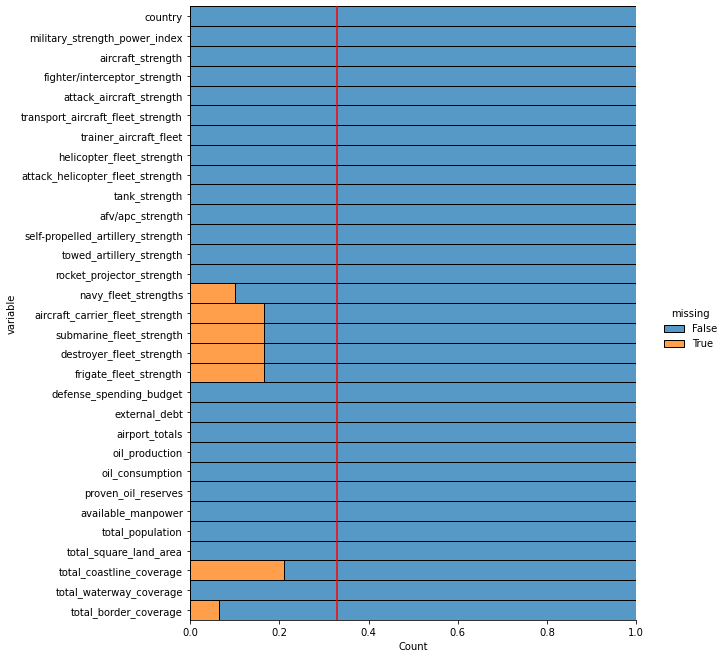

In [27]:
plt.figure(figsize=(4,6))

sns.displot(
    data=df.isnull().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    height=9.25
)

plt.axvline(0.33, color="r");

In [29]:
df[~df["total_coastline_coverage"].notna()]

country  military_strength_power_index  aircraft_strength  fighter/interceptor_strength  attack_aircraft_strength  transport_aircraft_fleet_strength  trainer_aircraft_fleet  helicopter_fleet_strength  attack_helicopter_fleet_strength  tank_strength  afv/apc_strength  self-propelled_artillery_strength  towed_artillery_strength  rocket_projector_strength  navy_fleet_strengths  aircraft_carrier_fleet_strength  submarine_fleet_strength  destroyer_fleet_strength  frigate_fleet_strength  defense_spending_budget  external_debt  airport_totals  oil_production  oil_consumption  proven_oil_reserves  available_manpower  total_population  total_square_land_area  total_coastline_coverage  total_waterway_coverage  total_border_coverage
5                     Armenia                         2.1251               64.0                           0.0                       9.0                                3.0                    13.0                       37.0                              20.0          110.0             748.0                               38.0                     150.0                       68.0                   0.0                              NaN                       NaN                       NaN                     NaN             1.385000e+09   1.041000e+10            11.0             0.0          47500.0         0.000000e+00           1696085.0         3038217.0                 29743.0                       NaN                      0.0                 1570.0
7                     Austria                         0.9568              120.0                          15.0                       0.0                               11.0                    32.0                       62.0                               0.0           56.0             467.0                               33.0                       0.0                        0.0                   0.0                              NaN                       NaN                       NaN                     NaN             3.380000e+09   6.308000e+11            52.0         14260.0         215000.0         4.300000e+07           4017691.0         8793370.0                 83871.0                       NaN                      0.0                 2524.0
11                    Belarus                         0.8179              202.0                          39.0                      68.0                                4.0                    28.0                       63.0                              21.0          532.0            1560.0                              482.0                     228.0                      238.0                   0.0                              NaN                       NaN                       NaN                     NaN             6.237028e+08   3.992000e+10            65.0         32000.0         190000.0         1.980000e+08           4982905.0         9527543.0                207600.0                       NaN                   2500.0                 3599.0
13                     Bhutan                        10.1681                2.0                           0.0                       0.0                                0.0                     0.0                        2.0                               0.0            0.0              27.0                                0.0                       0.0                        0.0                   0.0                              NaN                       NaN                       NaN                     NaN             2.512000e+07   2.671000e+09             2.0             0.0           2000.0         0.000000e+00            176808.0          766397.0                 38394.0                       NaN                      0.0                 1136.0
14                    Bolivia                         0.9942               69.0                           0.0                       0.0                               14.0                    23.0                       38.0                               

In [30]:
df.loc[~df["total_coastline_coverage"].notna(),["country","navy_fleet_strengths","aircraft_carrier_fleet_strength","submarine_fleet_strength","destroyer_fleet_strength","frigate_fleet_strength"]]

country  navy_fleet_strengths  aircraft_carrier_fleet_strength  submarine_fleet_strength  destroyer_fleet_strength  frigate_fleet_strength
5                     Armenia                   0.0                              NaN                       NaN                       NaN                     NaN
7                     Austria                   0.0                              NaN                       NaN                       NaN                     NaN
11                    Belarus                   0.0                              NaN                       NaN                       NaN                     NaN
13                     Bhutan                   0.0                              NaN                       NaN                       NaN                     NaN
14                    Bolivia                 173.0                              0.0                       0.0                       0.0                     0.0
16                   Botswana                   NaN                              NaN                       NaN                       NaN                     NaN
19               Burkina Faso                   NaN                              NaN                       NaN                       NaN                     NaN
23   Central African Republic                   NaN                              NaN                       NaN                       NaN                     NaN
24                       Chad                   NaN                              NaN                       NaN                       NaN                     NaN
30                    Czechia                   NaN                              NaN                       NaN                       NaN                     NaN
38                   Ethiopia                   NaN                              NaN                       NaN                       NaN                     NaN
48                    Hungary                   NaN                              NaN                       NaN                       NaN                     NaN
62                 Kyrgyzstan                   NaN                              NaN                       NaN                       NaN                     NaN
63                       Laos                  36.0                              0.0                       0.0                       0.0                     0.0
71                       Mali                   NaN                              NaN                       NaN                       NaN                     NaN
74                    Moldova                   NaN                              NaN                       NaN                       NaN                     NaN
75                   Mongolia                   NaN                              NaN                       NaN                       NaN                     NaN
81                      Nepal                   NaN                              NaN                       NaN                       NaN                     NaN
85                      Niger                   NaN                              NaN                       NaN                       NaN                     NaN
88            North Macedonia                   NaN                              NaN                       NaN                       NaN                     NaN
93                   Paraguay                  40.0                              0.0                       0.0                       0.0                     0.0
103                    Serbia                  19.0                              0.0                       0.0                       0.0                     0.0
106                  Slovakia                   0.0                              NaN                       NaN                       NaN                     NaN
111               South Sudan                   0.0                              2.0                      22.0                      12.0                    18

https://www.globalfirepower.com/navy-ships.php

total_coastline_coverage değeri null olan ülkelerin aircraft_carrier, submarine, destroyer, frigate sahip olmadıklarını gördüm ve bunlara 0 atadım.

In [31]:
df.loc[~df["total_coastline_coverage"].notna(), ["aircraft_carrier_fleet_strength","submarine_fleet_strength","destroyer_fleet_strength","frigate_fleet_strength"]] = 0

In [32]:
df.loc[~df["total_coastline_coverage"].notna(), ["country","navy_fleet_strengths"]]

country  navy_fleet_strengths
5                     Armenia                   0.0
7                     Austria                   0.0
11                    Belarus                   0.0
13                     Bhutan                   0.0
14                    Bolivia                 173.0
16                   Botswana                   NaN
19               Burkina Faso                   NaN
23   Central African Republic                   NaN
24                       Chad                   NaN
30                    Czechia                   NaN
38                   Ethiopia                   NaN
48                    Hungary                   NaN
62                 Kyrgyzstan                   NaN
63                       Laos                  36.0
71                       Mali                   NaN
74                    Moldova                   NaN
75                   Mongolia                   NaN
81                      Nepal                   NaN
85                      Niger                   NaN
88            North Macedonia                   NaN
93                   Paraguay                  40.0
103                    Serbia                  19.0
106                  Slovakia                   0.0
111               South Sudan                   0.0
117               Switzerland                   0.0
120                Tajikistan                   0.0
126                    Uganda                   8.0
136                    Zambia                   0.0
137                  Zimbabwe                   0.0

In [33]:
df.loc[~df["total_coastline_coverage"].notna(), ["navy_fleet_strengths"]] = 0

In [34]:
df.loc[~df["aircraft_carrier_fleet_strength"].notna(), ["country", "submarine_fleet_strength","destroyer_fleet_strength","frigate_fleet_strength"]]

country  submarine_fleet_strength  destroyer_fleet_strength  frigate_fleet_strength
110  South Korea                       NaN                       NaN                     NaN
132   Uzbekistan                       NaN                       NaN                     NaN

In [35]:
df.loc[df["country"] == "Uzbekistan","aircraft_carrier_fleet_strength"] = 0
df.loc[df["country"] == "Uzbekistan","submarine_fleet_strength"] = 0
df.loc[df["country"] == "Uzbekistan","destroyer_fleet_strength"] = 0
df.loc[df["country"] == "Uzbekistan","frigate_fleet_strength"] = 0

South Koreanın aircraft yok ancak helicopter carrier olduğundan dolayı 2 yazdım.

In [36]:
df.loc[df["country"] == "South Korea","aircraft_carrier_fleet_strength"] = 2
df.loc[df["country"] == "South Korea","submarine_fleet_strength"] = 22
df.loc[df["country"] == "South Korea","destroyer_fleet_strength"] = 12
df.loc[df["country"] == "South Korea","frigate_fleet_strength"] = 18

In [37]:
df[["country","total_coastline_coverage"]]

country  total_coastline_coverage
0                         Afghanistan                       0.0
1                             Albania                     362.0
2                             Algeria                     998.0
3                              Angola                    1600.0
4                           Argentina                    4989.0
5                             Armenia                       NaN
6                           Australia                   25760.0
7                             Austria                       NaN
8                          Azerbaijan                     713.0
9                             Bahrain                     161.0
10                         Bangladesh                     580.0
11                            Belarus                       NaN
12                            Belgium                      67.0
13                             Bhutan                       NaN
14                            Bolivia                       NaN
15             Bosnia and Herzegovina                      20.0
16                           Botswana                       NaN
17                             Brazil                    7491.0
18                           Bulgaria                     354.0
19                       Burkina Faso                       NaN
20                           Cambodia                     443.0
21                           Cameroon                     400.0
22                             Canada                  202080.0
23           Central African Republic                       NaN
24                               Chad                       NaN
25                              Chile                    6435.0
26                              China                   14500.0
27                           Colombia                    3208.0
28                            Croatia                    5835.0
29                               Cuba                    3735.0
30                            Czechia                       NaN
31   Democratic Republic of the Congo                      37.0
32                            Denmark                    7314.0
33                 Dominican Republic                    1288.0
34                            Ecuador                    2237.0
35                              Egypt                    2450.0
36                        El Salvador                     307.0
37                            Estonia                    3794.0
38                           Ethiopia                       NaN
39                            Finland                    1250.0
40                             France                    4853.0
41                              Gabon                     885.0
42                            Georgia                     310.0
43                            Germany                    2389.0
44                              Ghana                     539.0
45                             Greece                   13676.0
46                          Guatemala                     400.0
47                           Honduras                     832.0
48                            Hungary                       NaN
49                              India                    7000.0
50                          Indonesia                   54716.0
51                               Iran                    2440.0
52                               Iraq                      58.0
53                            Ireland                    1448.0
54                             Israel                     273.0
55                              Italy                    7600.0
56                        Ivory Coast                     515.0
57                              Japan                   29751.0
58                             Jordan                      26.0
59                         Kazakhstan                      26.0
60                              Kenya                     536.0
61                             Kuwait                     499.

In [38]:
df.loc[~df["total_coastline_coverage"].notna(), ["country"]]

# ülkelerin sahil sınırlarının olmadığını https://www.globalfirepower.com/coastline-coverage.php teyit etim ve bunlara 0 atadım.

country
5                     Armenia
7                     Austria
11                    Belarus
13                     Bhutan
14                    Bolivia
16                   Botswana
19               Burkina Faso
23   Central African Republic
24                       Chad
30                    Czechia
38                   Ethiopia
48                    Hungary
62                 Kyrgyzstan
63                       Laos
71                       Mali
74                    Moldova
75                   Mongolia
81                      Nepal
85                      Niger
88            North Macedonia
93                   Paraguay
103                    Serbia
106                  Slovakia
111               South Sudan
117               Switzerland
120                Tajikistan
126                    Uganda
136                    Zambia
137                  Zimbabwe

In [39]:
df.loc[~df["total_coastline_coverage"].notna(), ["total_coastline_coverage"]] = 0

In [40]:
df.loc[~df["total_border_coverage"].notna(), ["country", "total_border_coverage" ]]

country  total_border_coverage
6      Australia                    NaN
9        Bahrain                    NaN
57         Japan                    NaN
69    Madagascar                    NaN
83   New Zealand                    NaN
95   Philippines                    NaN
105    Singapore                    NaN
113    Sri Lanka                    NaN
119       Taiwan                    NaN

total_border_coverage feature aşağıda drop yapacağımdan dolayı burada 0 ile doldurarak geçtim.

In [41]:
df.loc[~df["total_border_coverage"].notna(), ["total_border_coverage"]] = 0

In [42]:
df.isnull().sum()

country                              0
military_strength_power_index        0
aircraft_strength                    0
fighter/interceptor_strength         0
attack_aircraft_strength             0
transport_aircraft_fleet_strength    0
trainer_aircraft_fleet               0
helicopter_fleet_strength            0
attack_helicopter_fleet_strength     0
tank_strength                        0
afv/apc_strength                     0
self-propelled_artillery_strength    0
towed_artillery_strength             0
rocket_projector_strength            0
navy_fleet_strengths                 0
aircraft_carrier_fleet_strength      0
submarine_fleet_strength             0
destroyer_fleet_strength             0
frigate_fleet_strength               0
defense_spending_budget              0
external_debt                        0
airport_totals                       0
oil_production                       0
oil_consumption                      0
proven_oil_reserves                  0
available_manpower       

In [49]:
df1 = df.copy()

## Fix the dtypes

## Drop the features that not affect military power
* Hint-1,  Georeferences not proper features

georeferences featureların etkisi olmayacağından dolayı drop yaptım.

In [50]:
df1.drop(['total_square_land_area','total_coastline_coverage','total_waterway_coverage','total_border_coverage'], axis=1, inplace=True)

In [51]:
df1.head()

country  military_strength_power_index  aircraft_strength  fighter/interceptor_strength  attack_aircraft_strength  transport_aircraft_fleet_strength  trainer_aircraft_fleet  helicopter_fleet_strength  attack_helicopter_fleet_strength  tank_strength  afv/apc_strength  self-propelled_artillery_strength  towed_artillery_strength  rocket_projector_strength  navy_fleet_strengths  aircraft_carrier_fleet_strength  submarine_fleet_strength  destroyer_fleet_strength  frigate_fleet_strength  defense_spending_budget  external_debt  airport_totals  oil_production  oil_consumption  proven_oil_reserves  available_manpower  total_population
0  Afghanistan                         1.3444              260.0                           0.0                      25.0                               30.0                     0.0                      187.0                               0.0            0.0            1062.0                                0.0                     176.0                       50.0                   0.0                              0.0                       0.0                       0.0                     0.0             1.200000e+10   2.840000e+09            43.0             0.0           5500.0         0.000000e+00          14325743.0        34940837.0
1      Albania                         2.3137               19.0                           0.0                       0.0                                0.0                     0.0                       19.0                               0.0            0.0             467.0                                0.0                       0.0                        0.0                  38.0                              0.0                       0.0                       0.0                     0.0             2.500000e+08   9.505000e+09             4.0         16000.0          42500.0         1.683000e+08           1519438.0         3057220.0
2      Algeria                         0.4659              551.0                         103.0                      22.0                               59.0                    87.0                      257.0                              45.0          880.0            7361.0                              320.0                     240.0                      316.0                 201.0                              0.0                       6.0                       0.0                     5.0             1.300000e+10   6.260000e+09           157.0       1306000.0         325000.0         1.220000e+10          20741263.0        41657488.0
3       Angola                         0.8379              295.0                          72.0                      18.0                               30.0                    47.0                      126.0                              15.0          379.0             595.0                               28.0                     357.0                      115.0                  57.0                              0.0                       0.0                       0.0                     0.0             7.000000e+09   4.208000e+10           176.0       1666000.0          82300.0         8.273000e+09           6244205.0        30355880.0
4    Argentina                         0.6521              227.0                          24.0                       7.0                                9.0                    64.0                      100.0                               0.0          370.0             739.0                               83.0                     172.0                       26.0                  49.0                              0.0                       2.0                       4.0                     0.0             4.200000e+09   2.149000e+11          1138.0        479400.0         685000.0         2.185000e+09          20179430.0        44694198.0

## Visualy inspect the some features

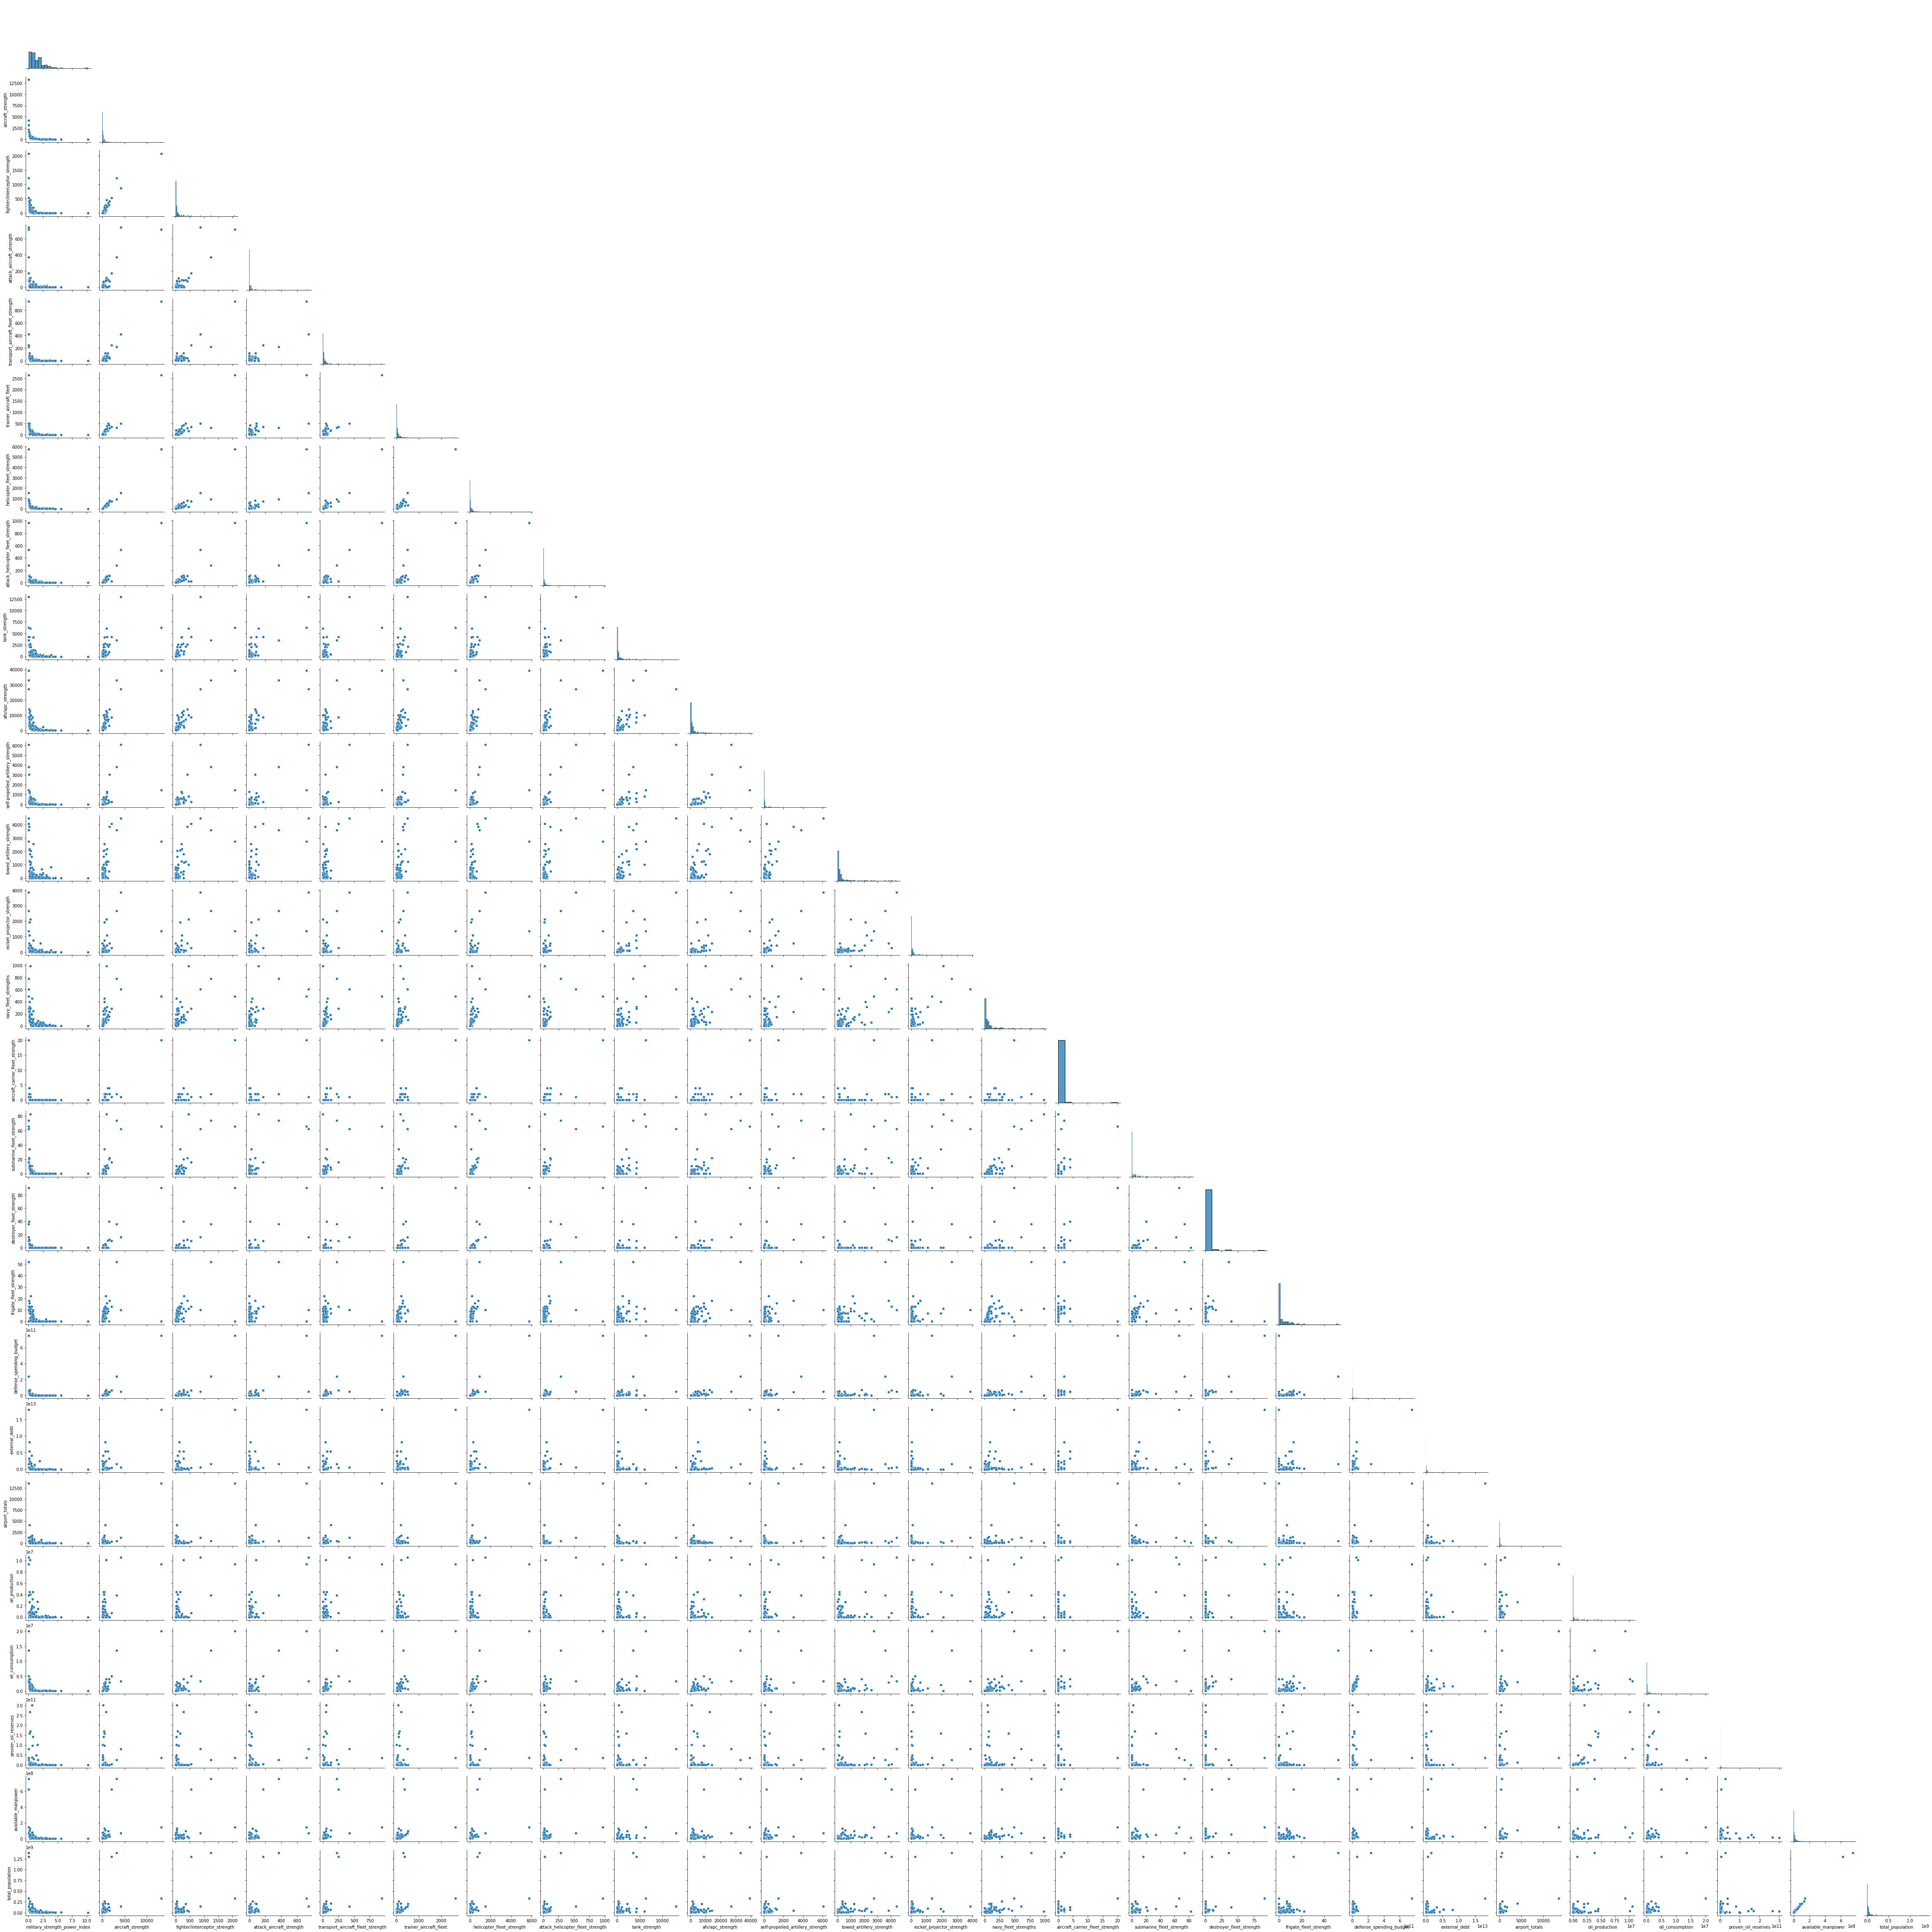

In [46]:
sns.pairplot(df1, corner=True);

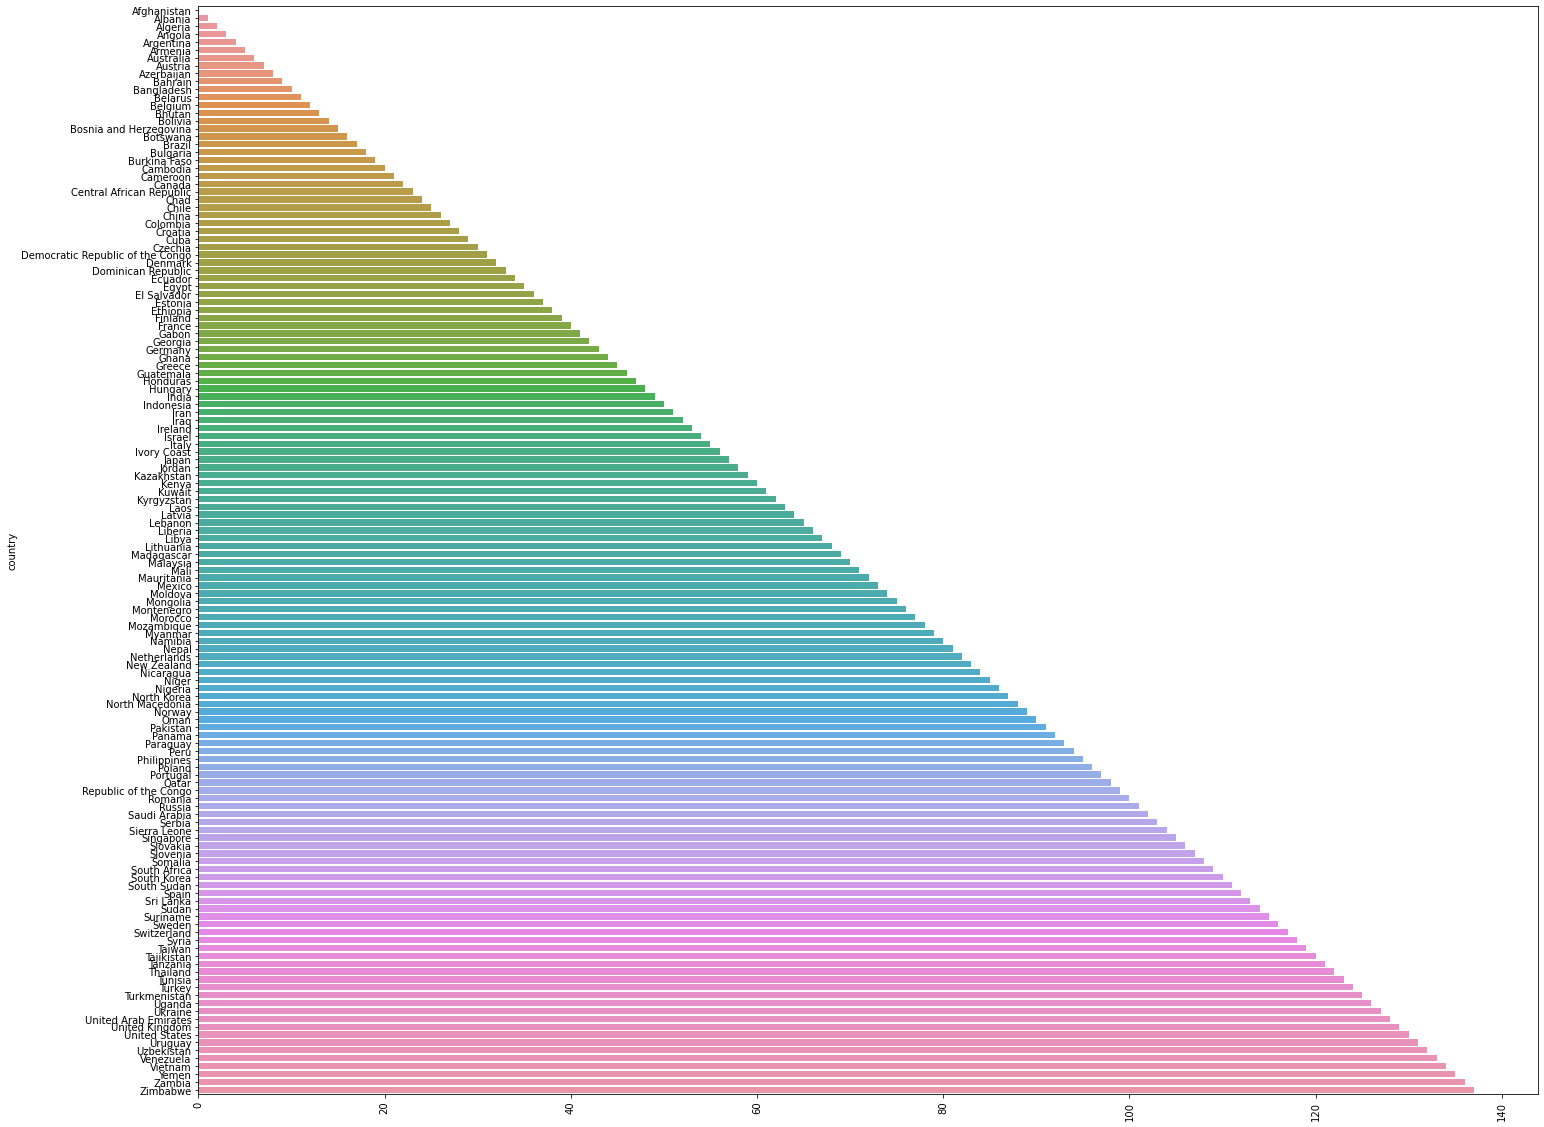

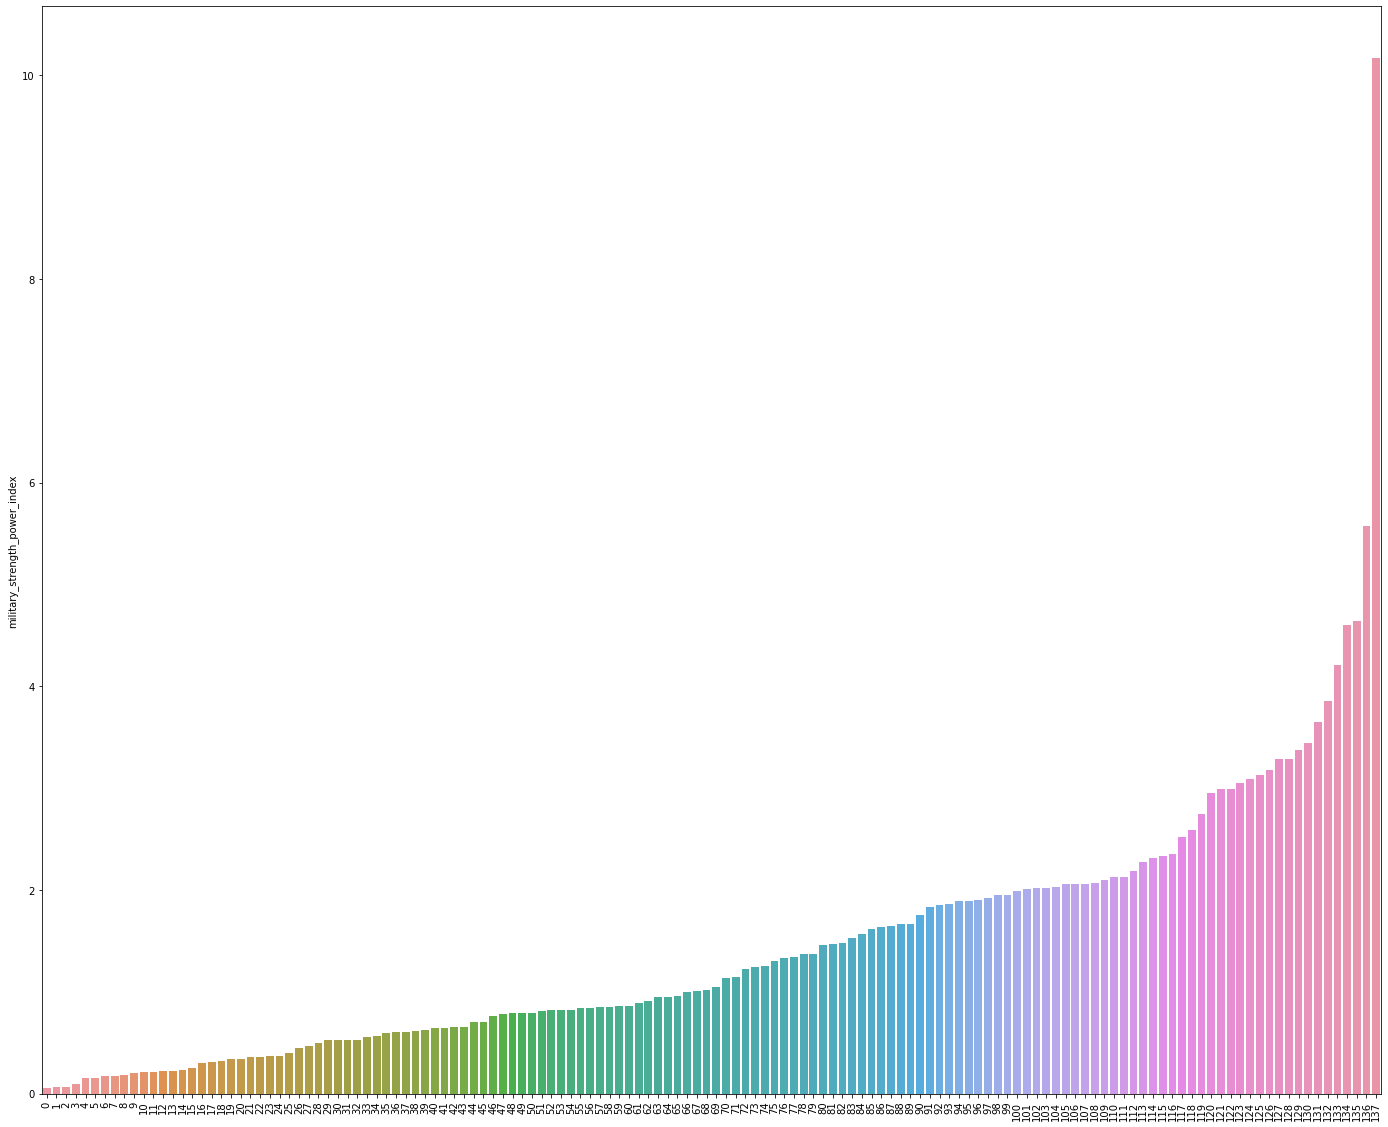

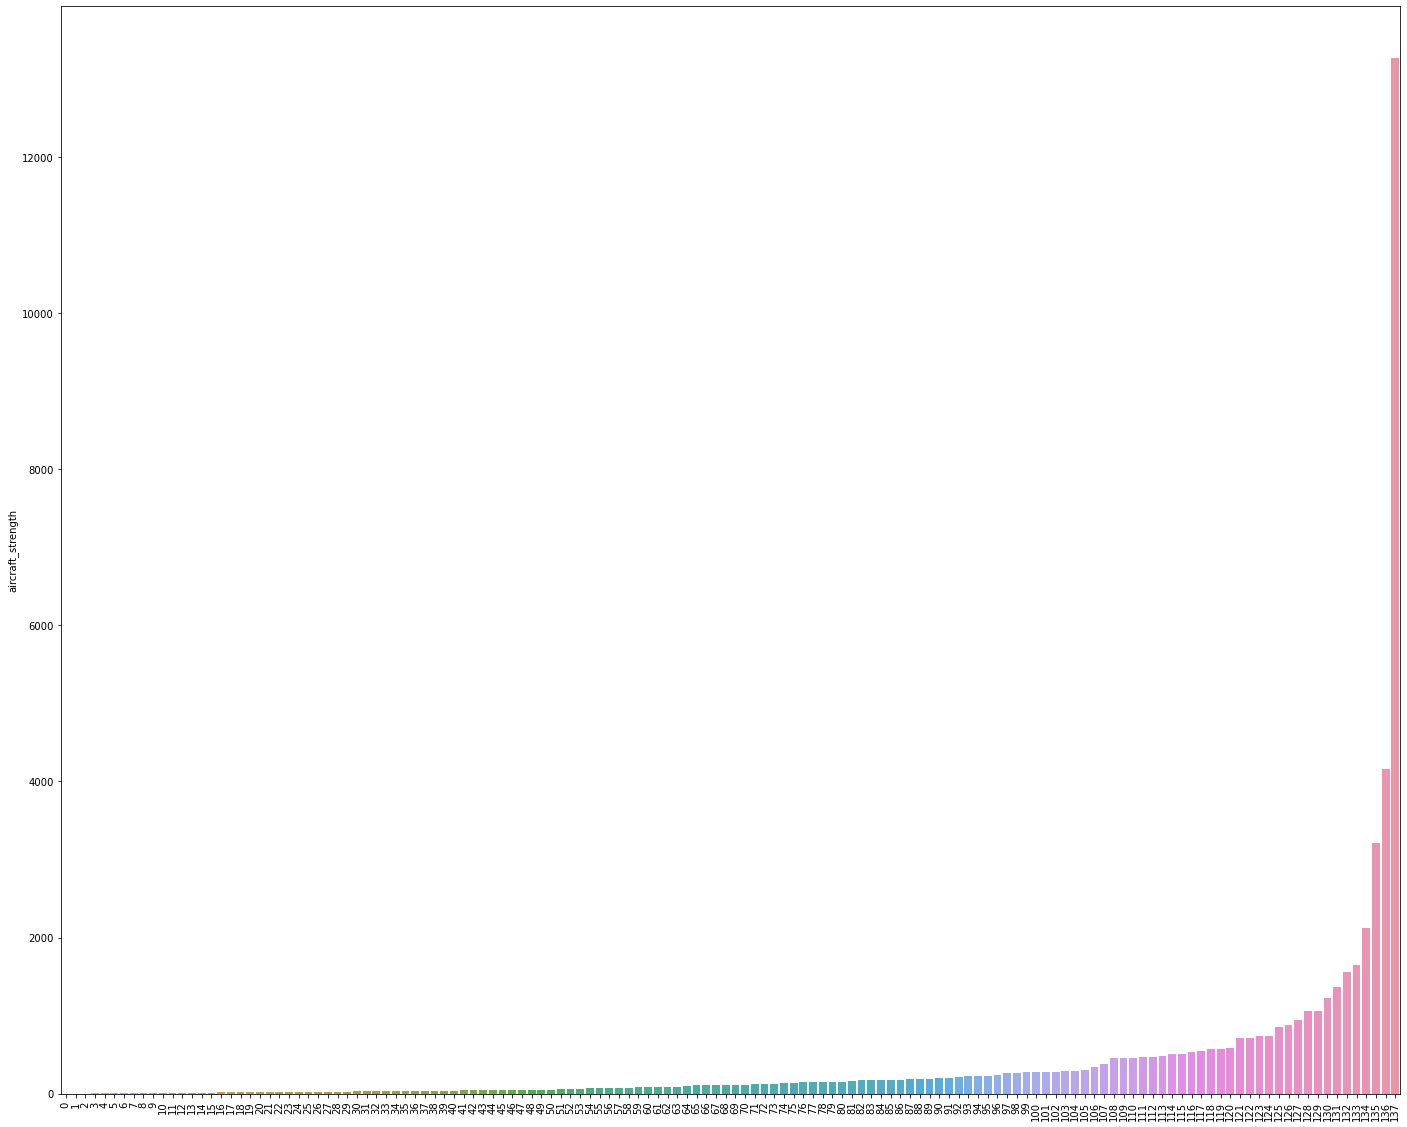

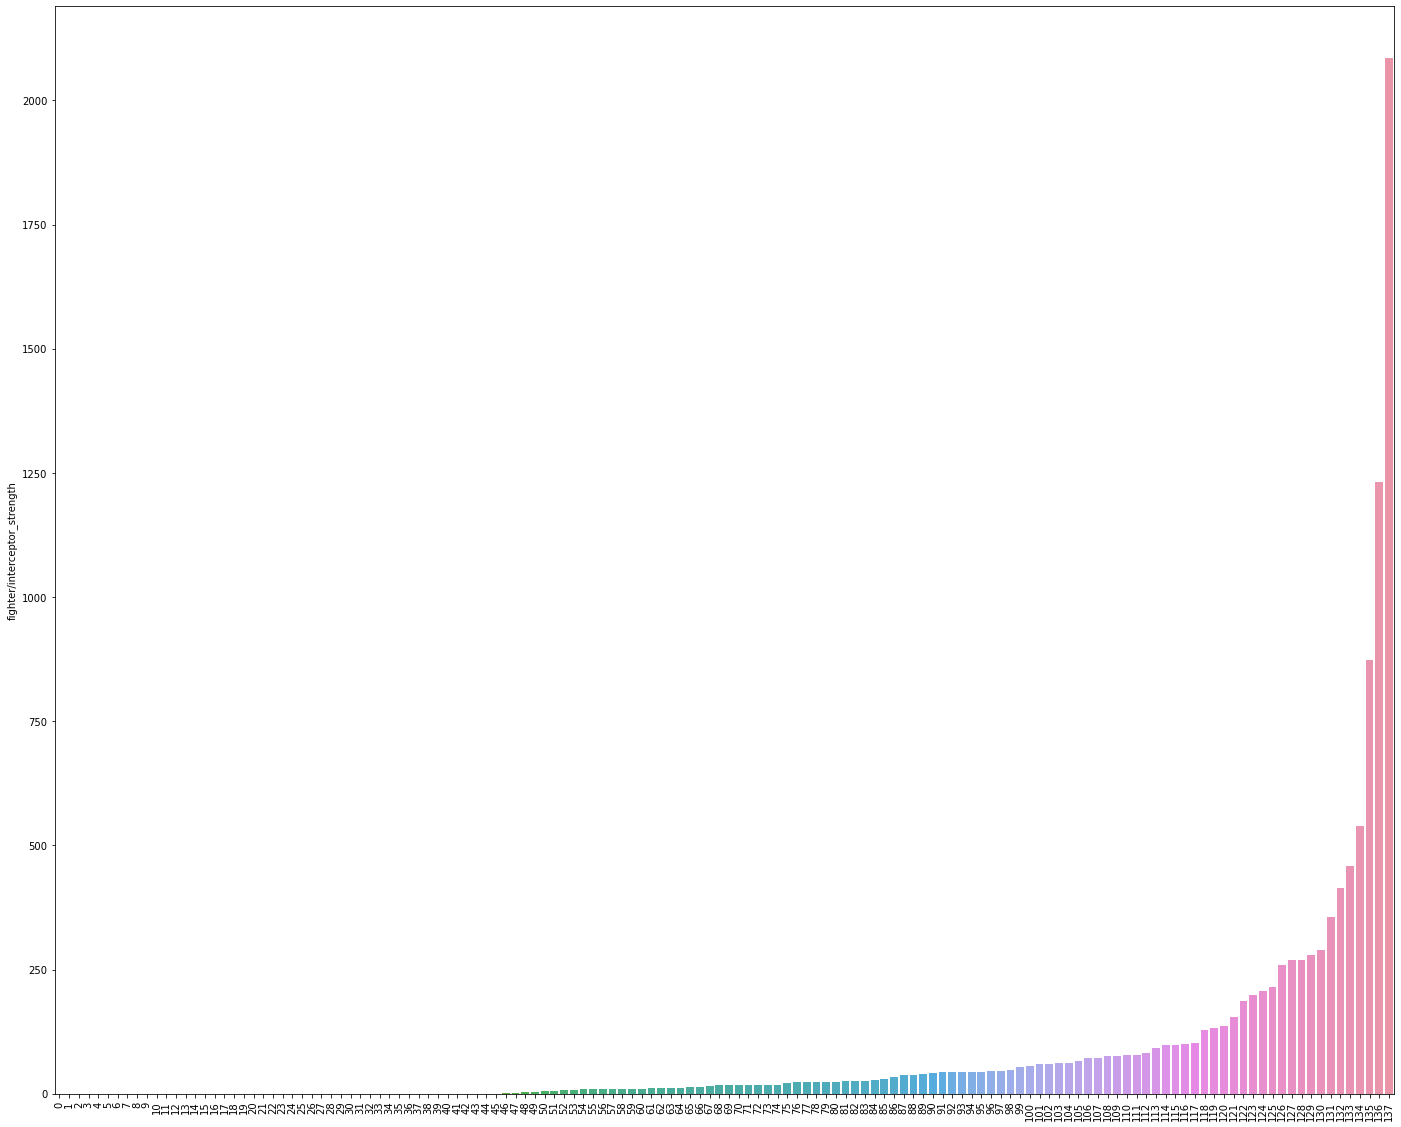

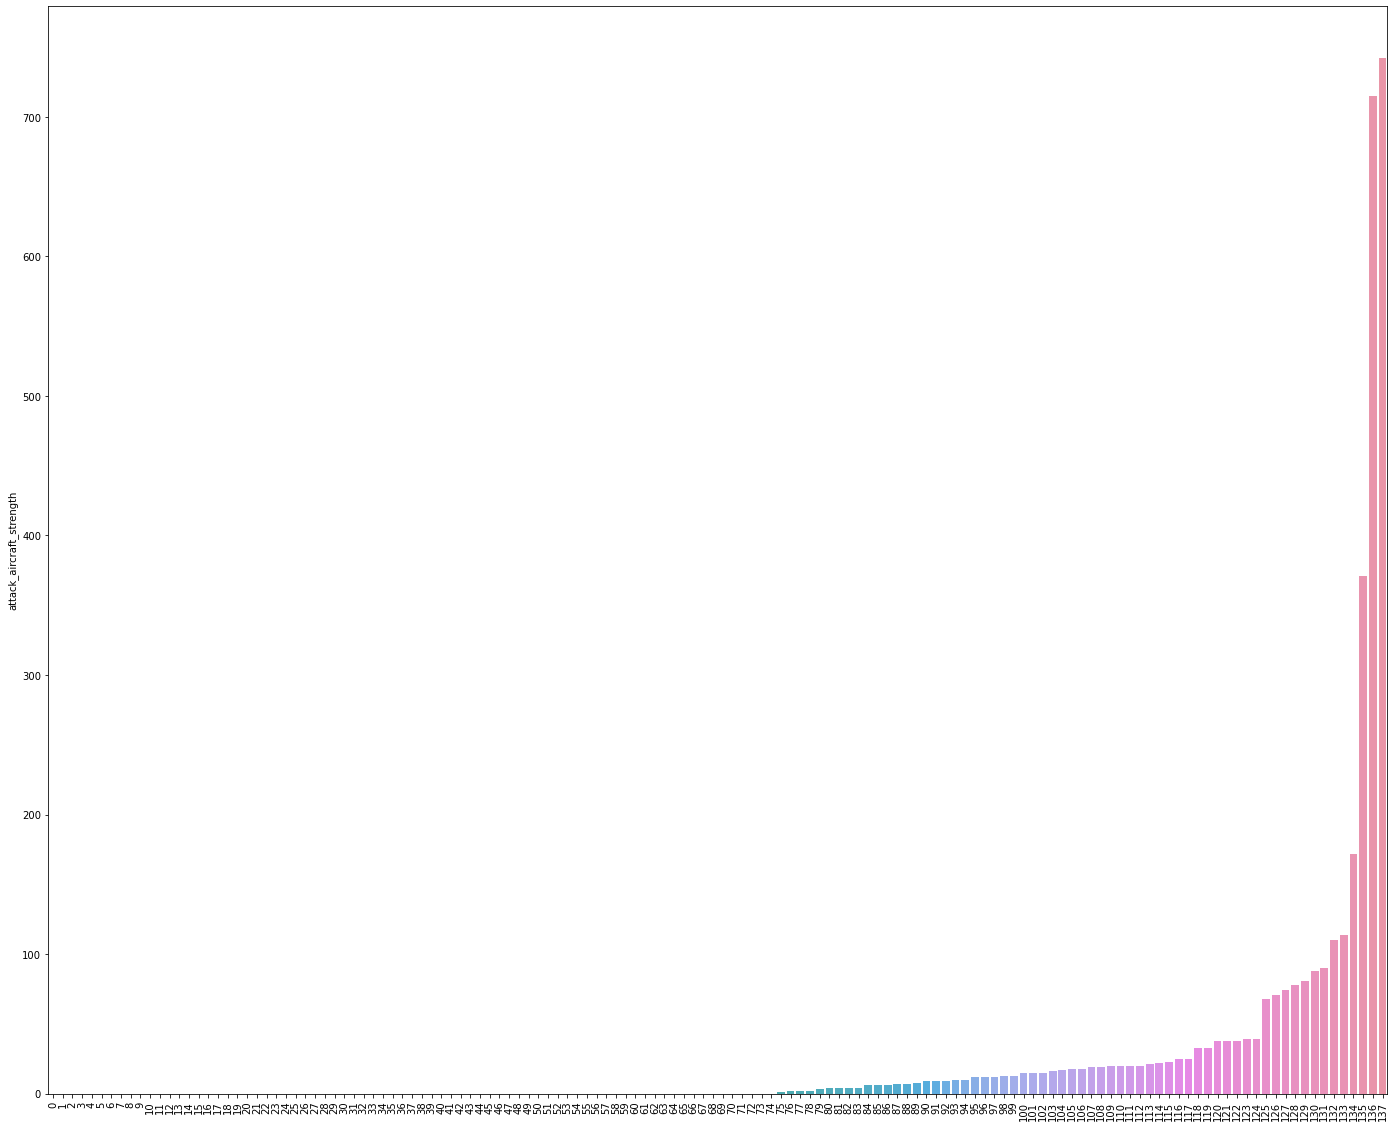

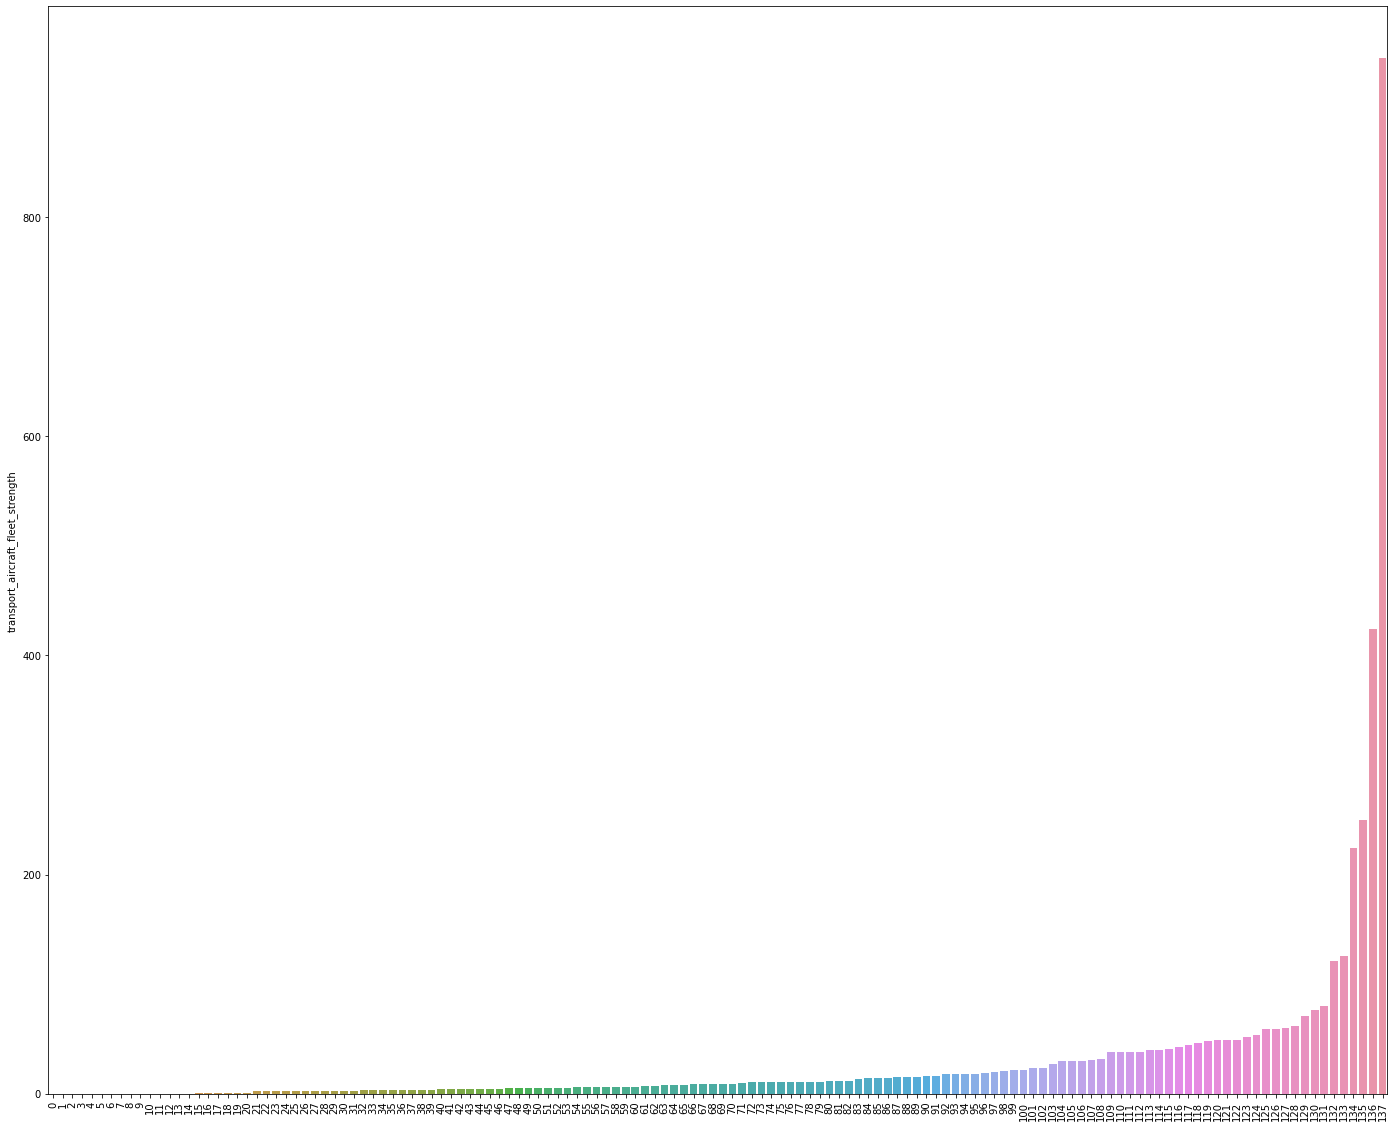

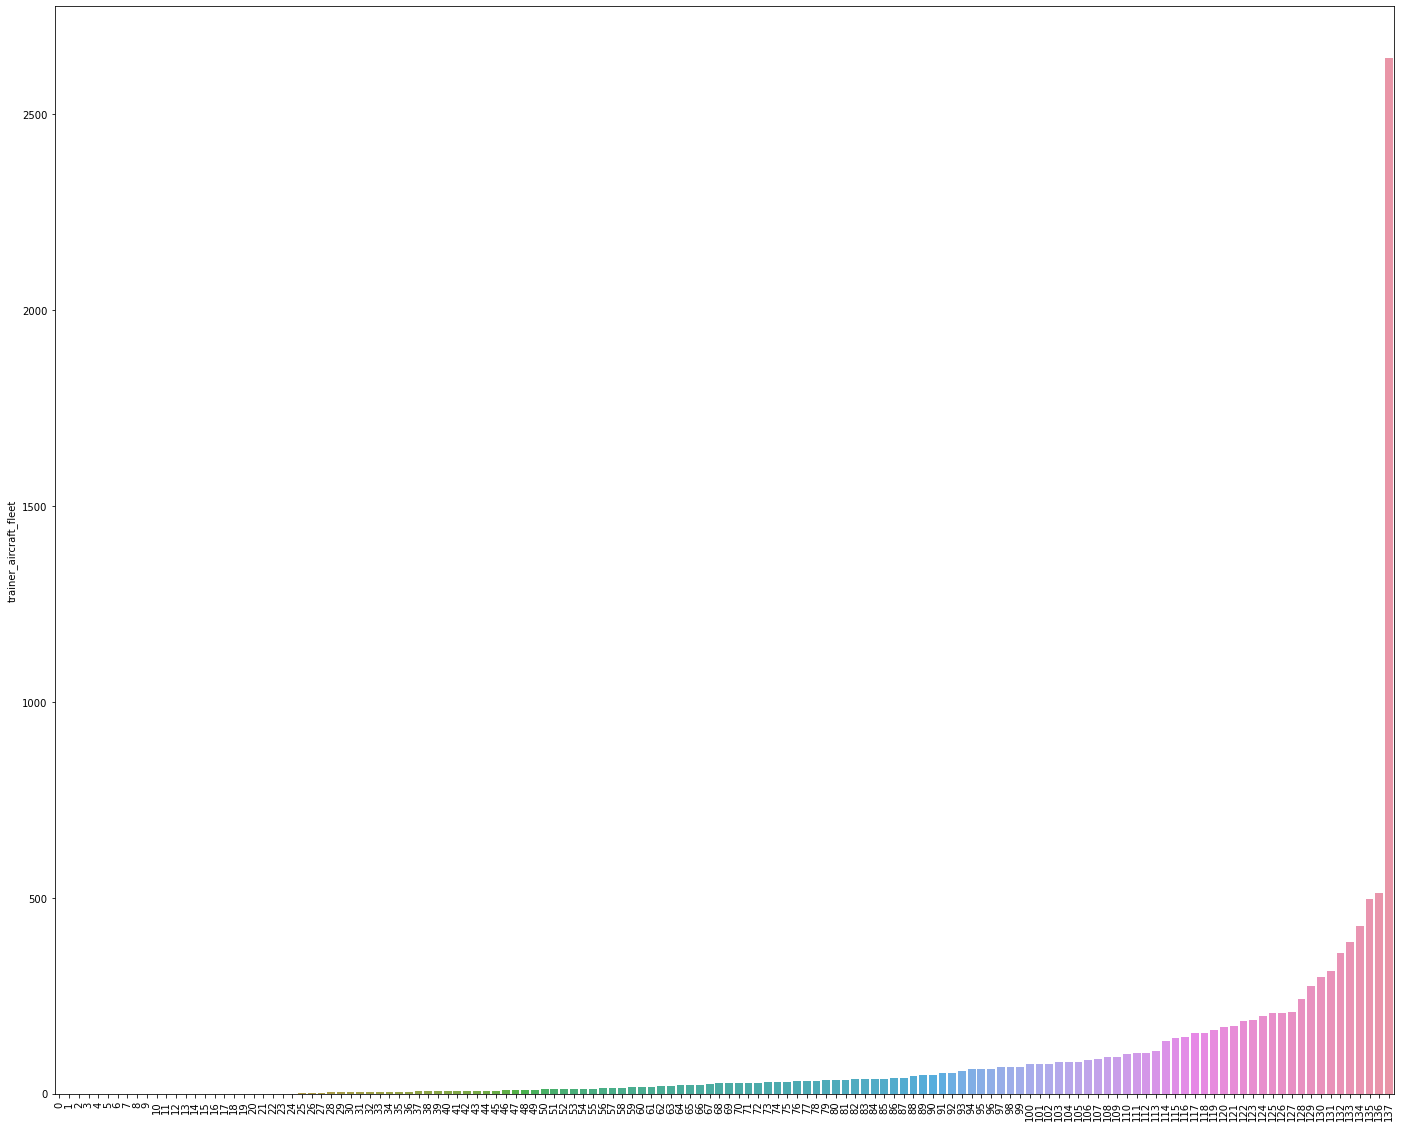

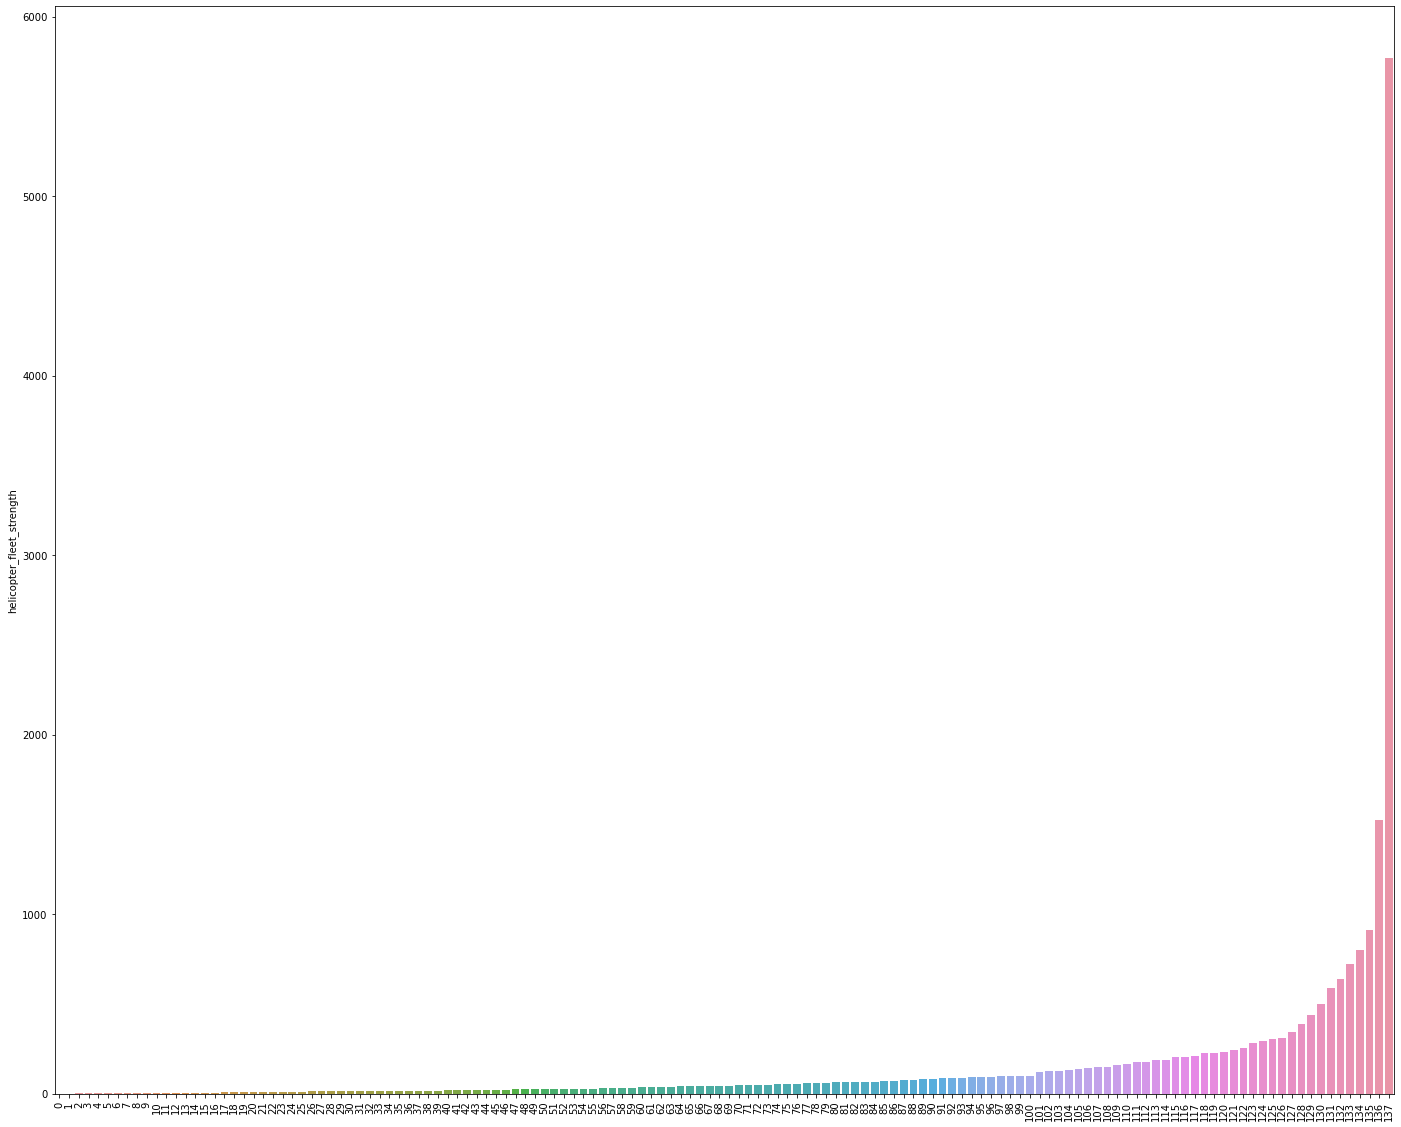

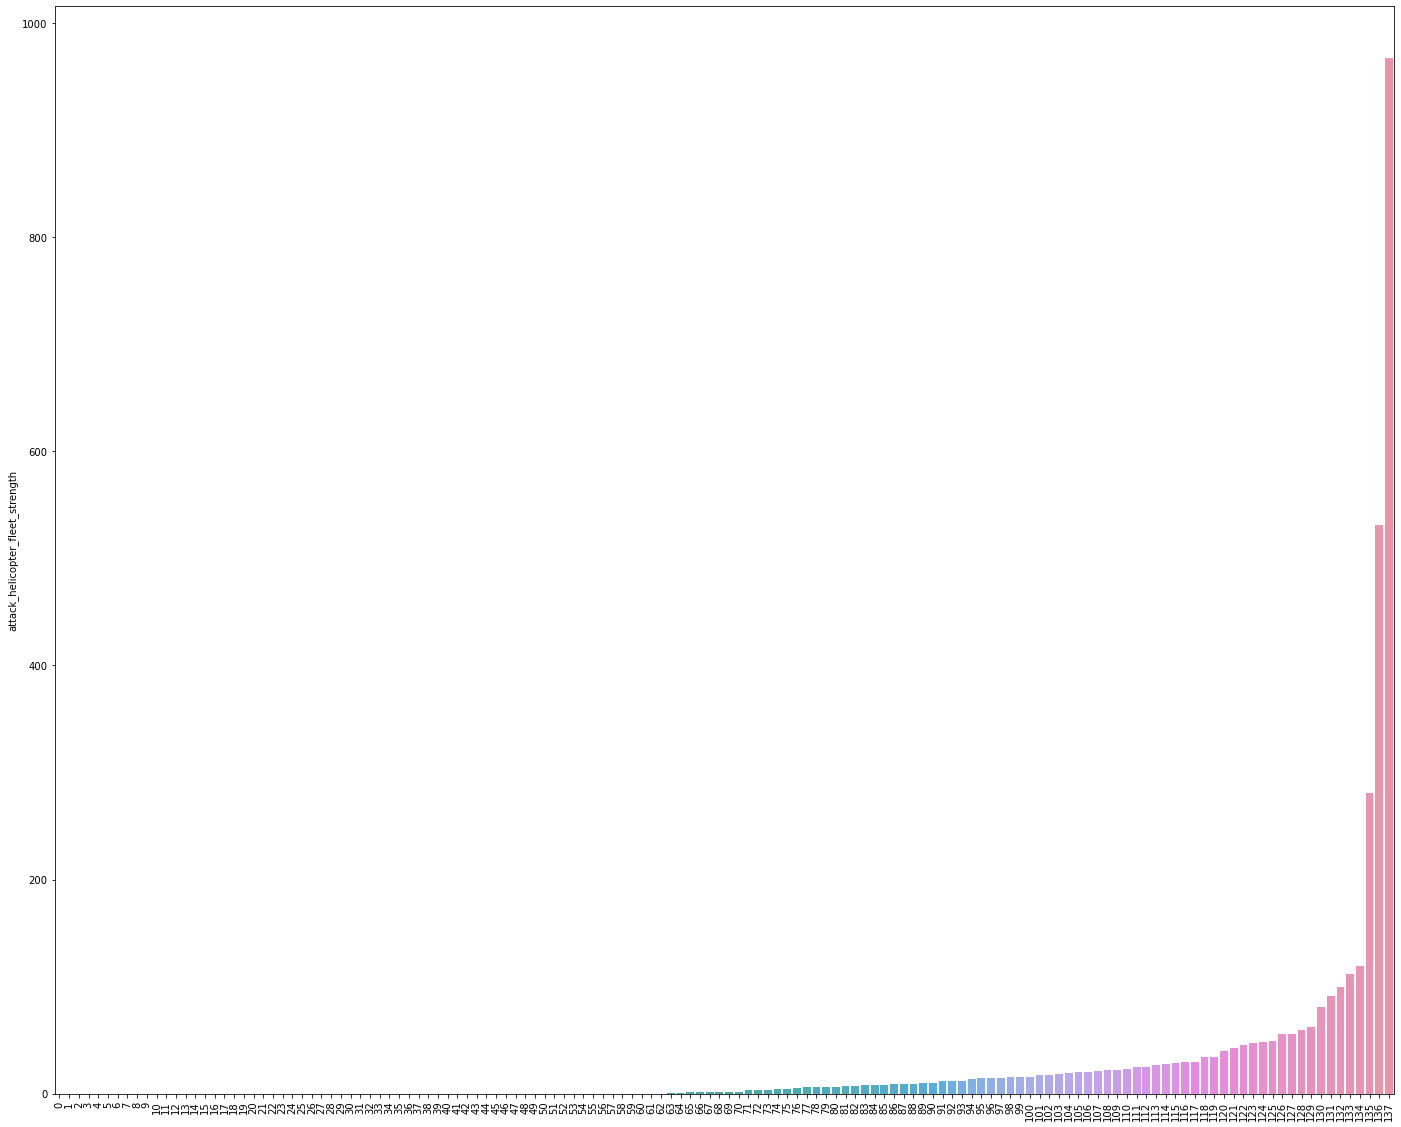

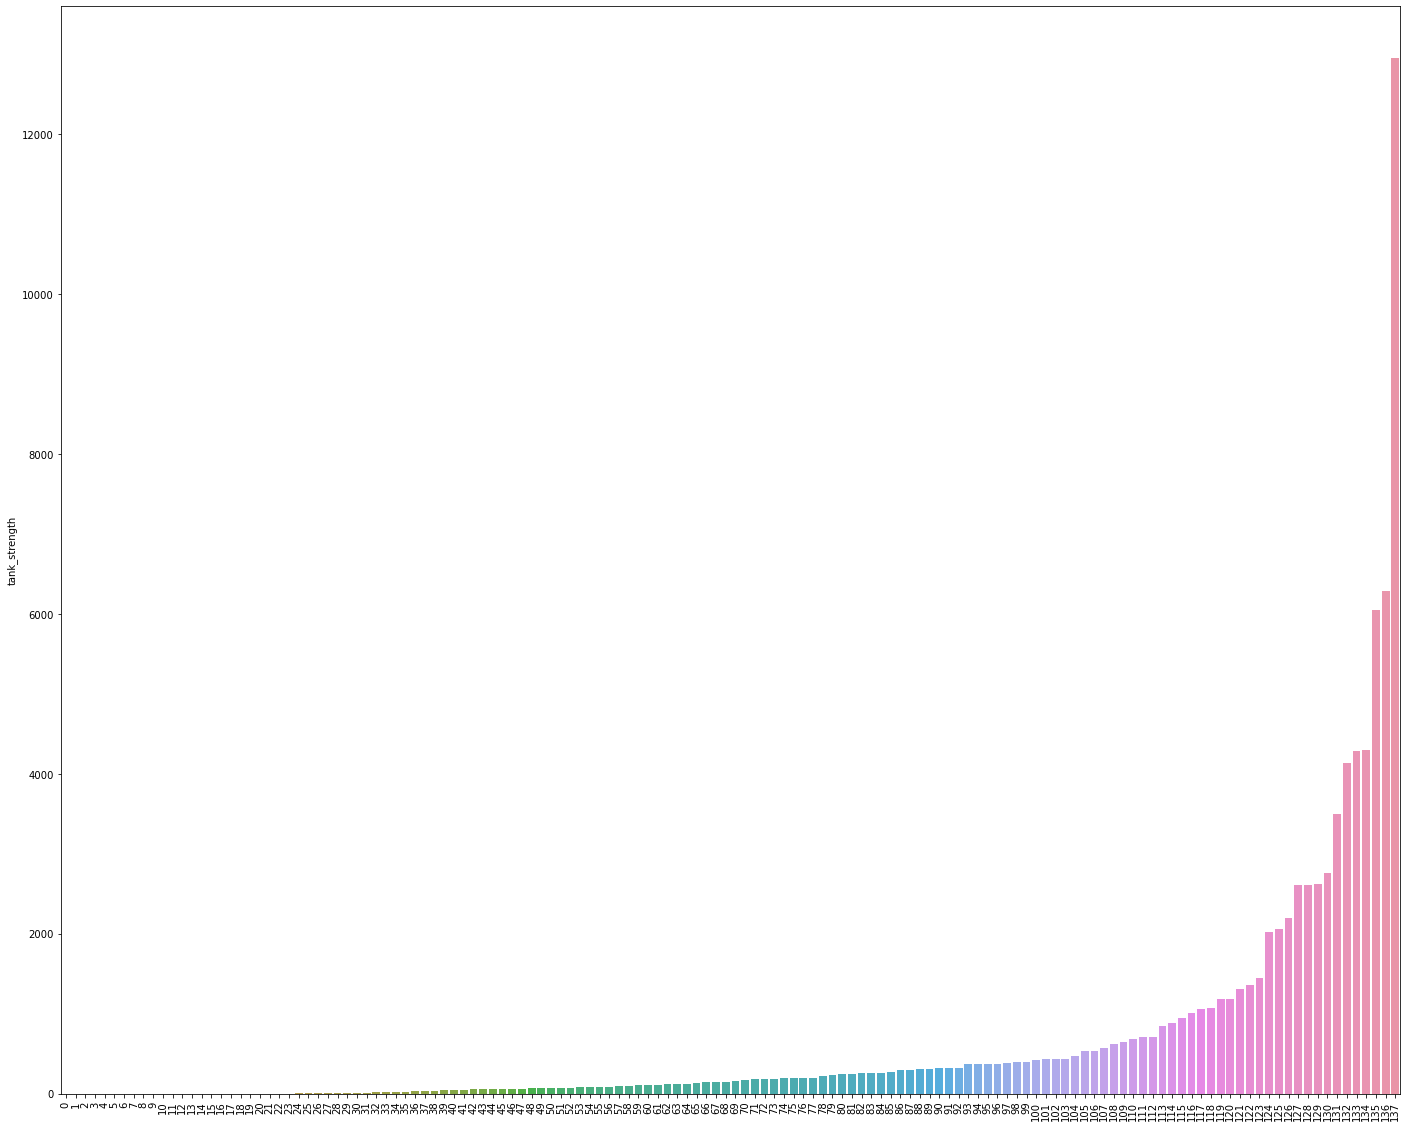

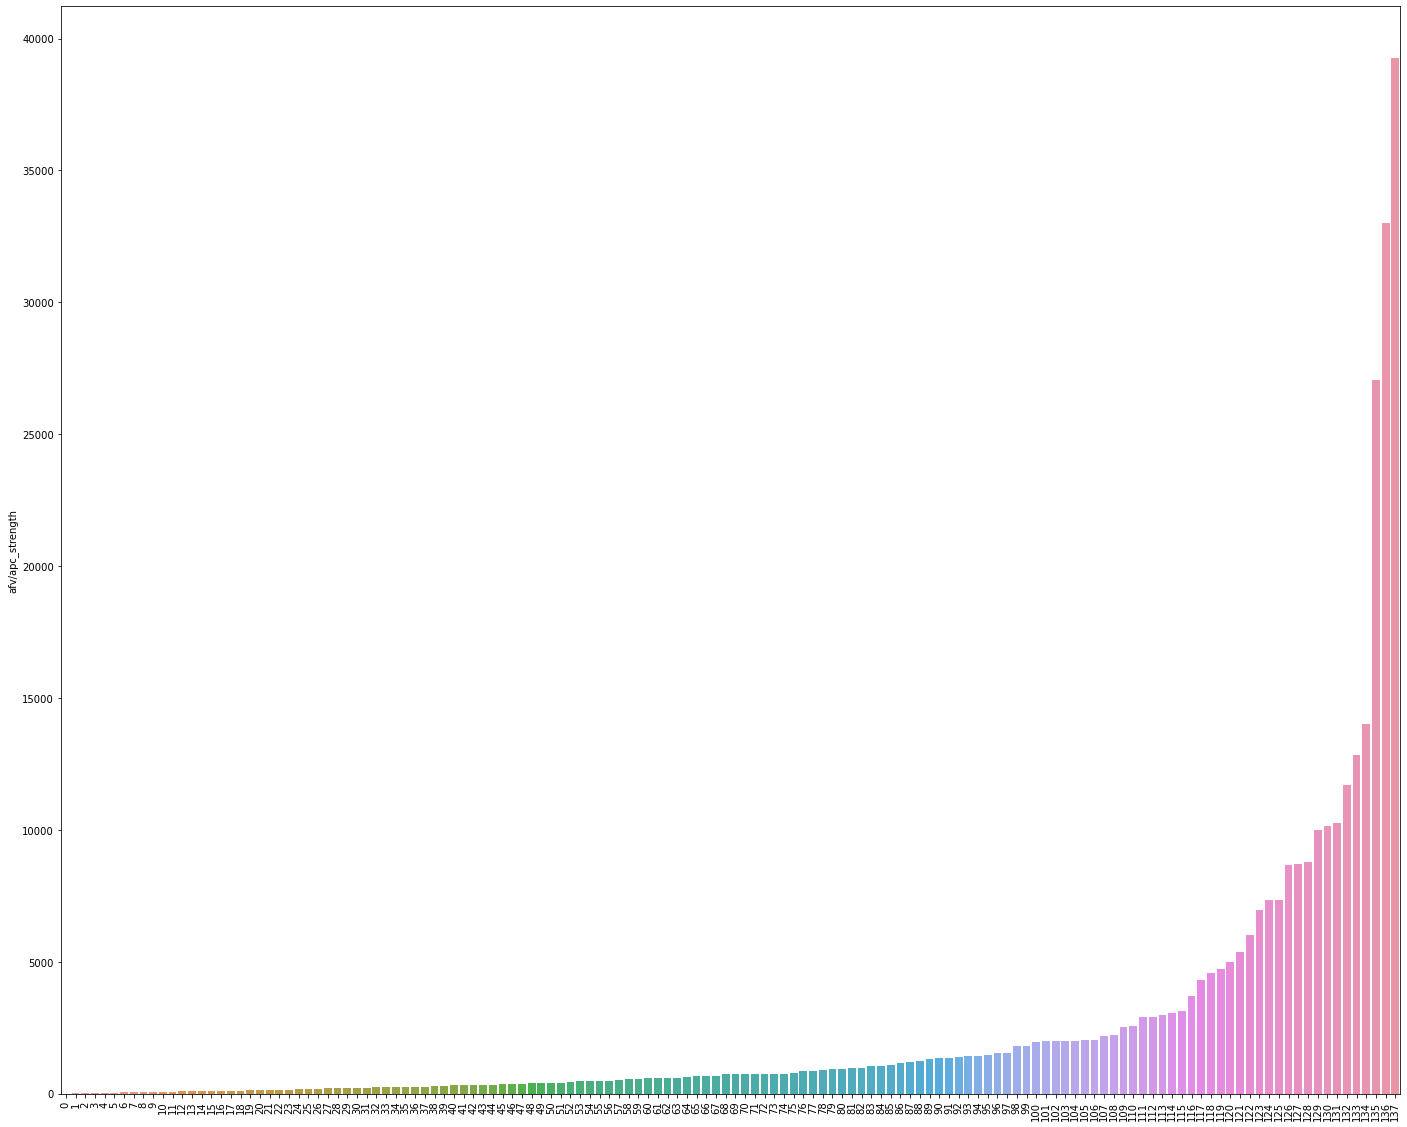

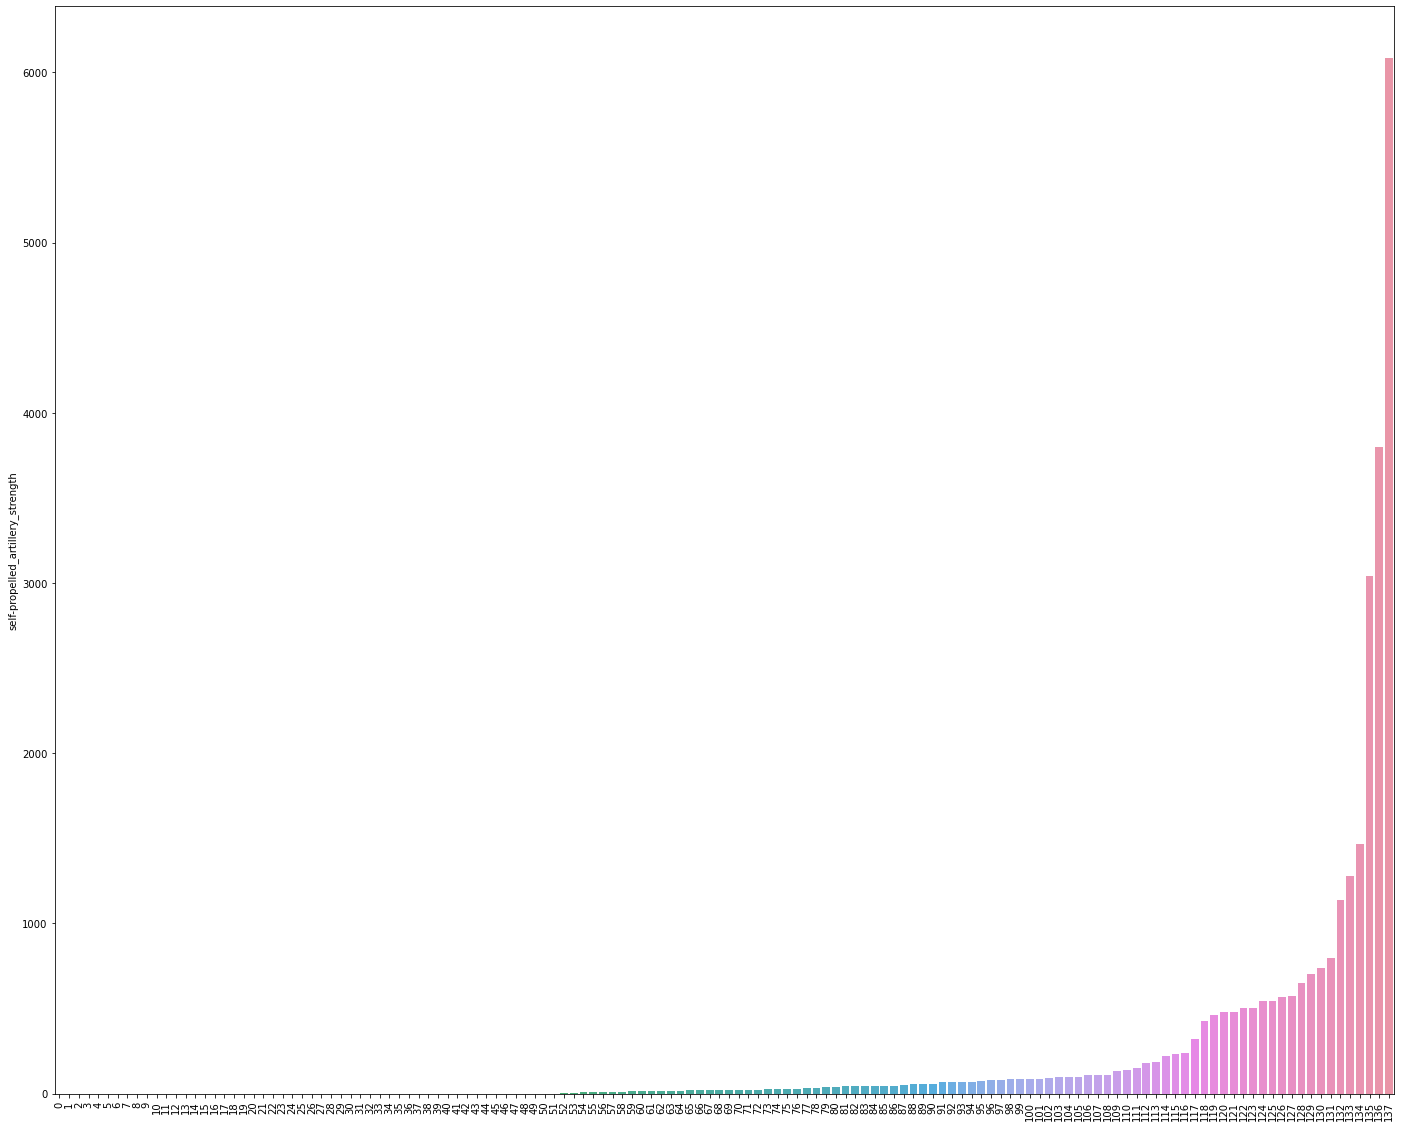

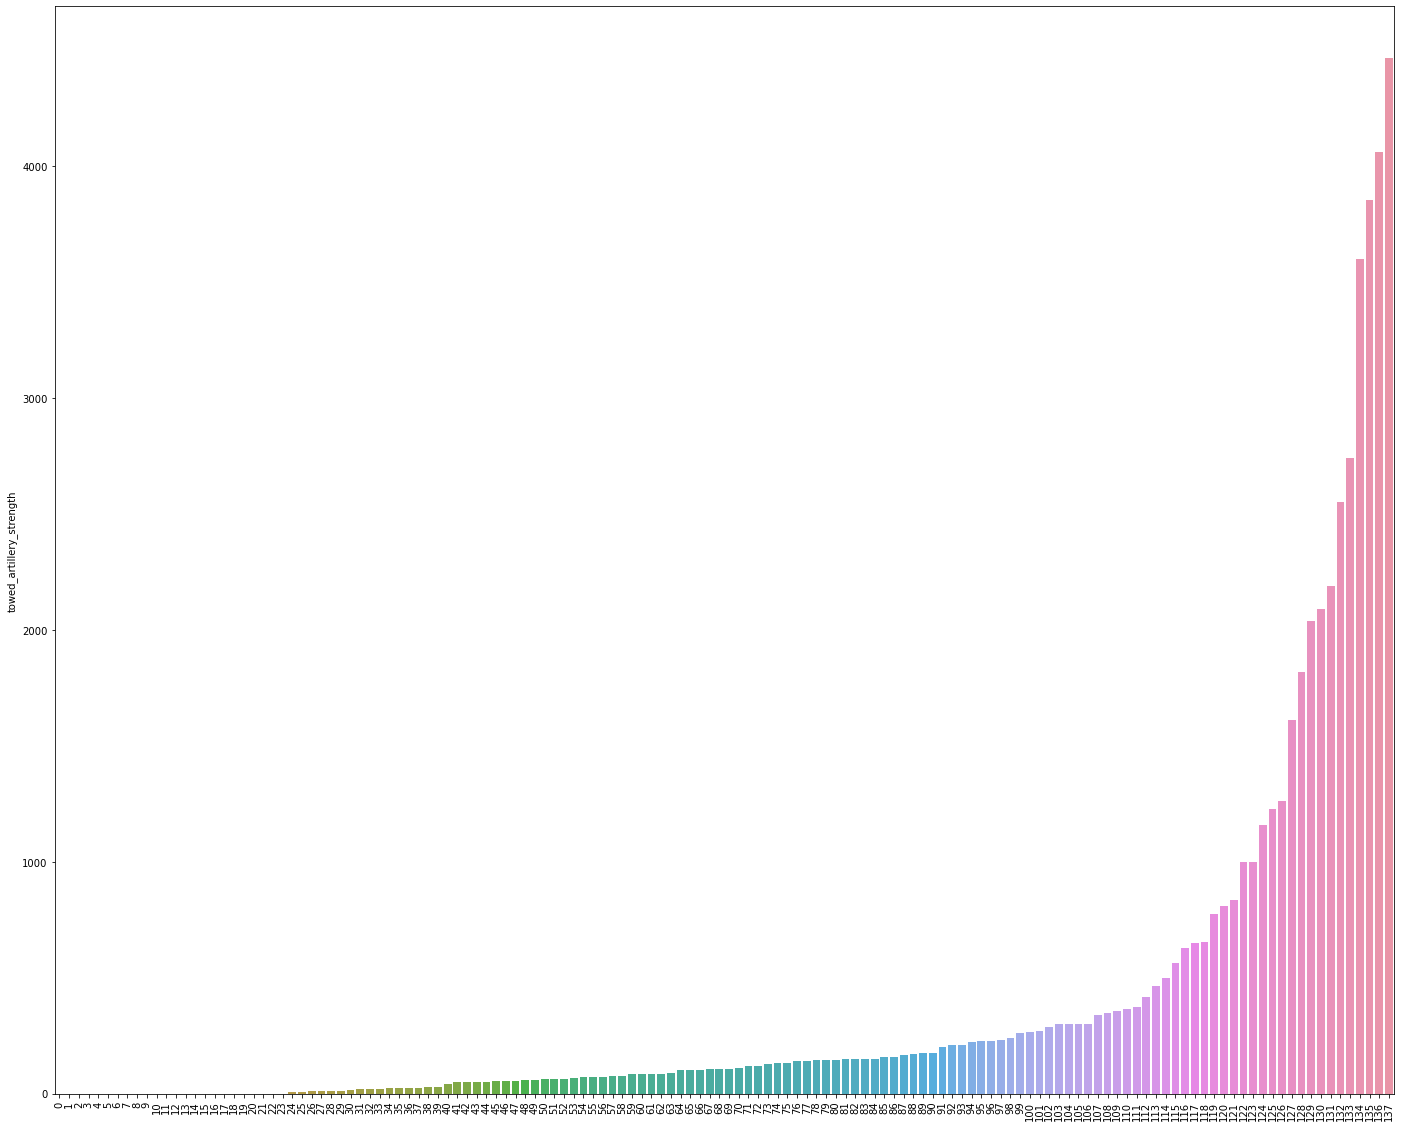

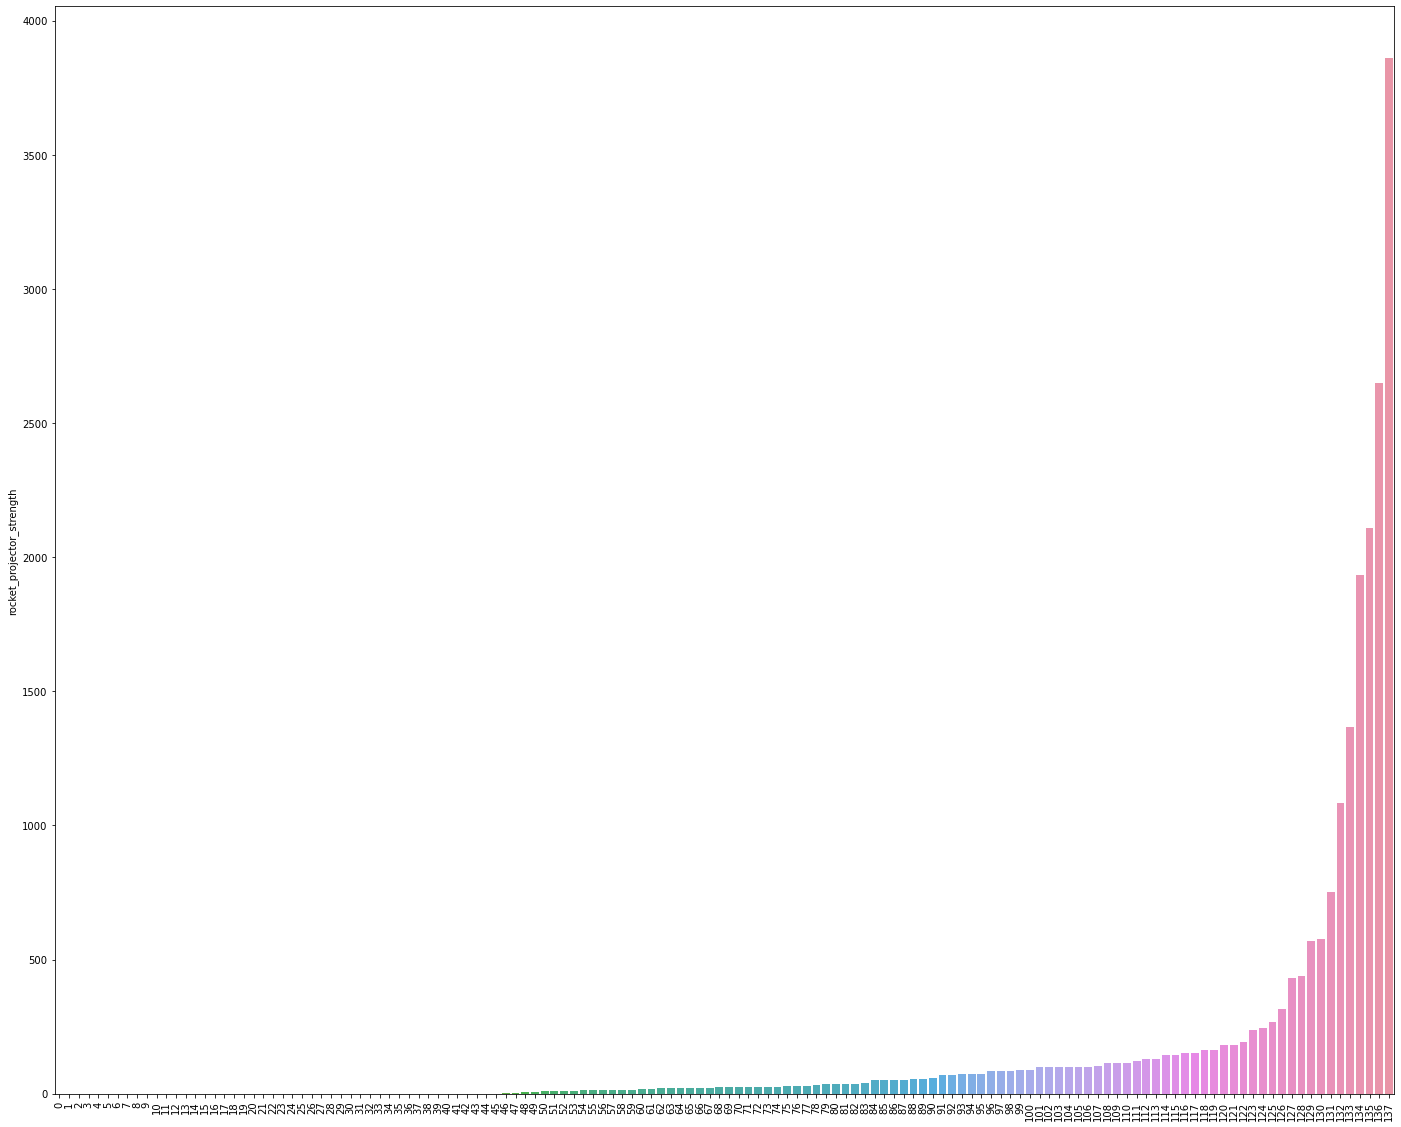

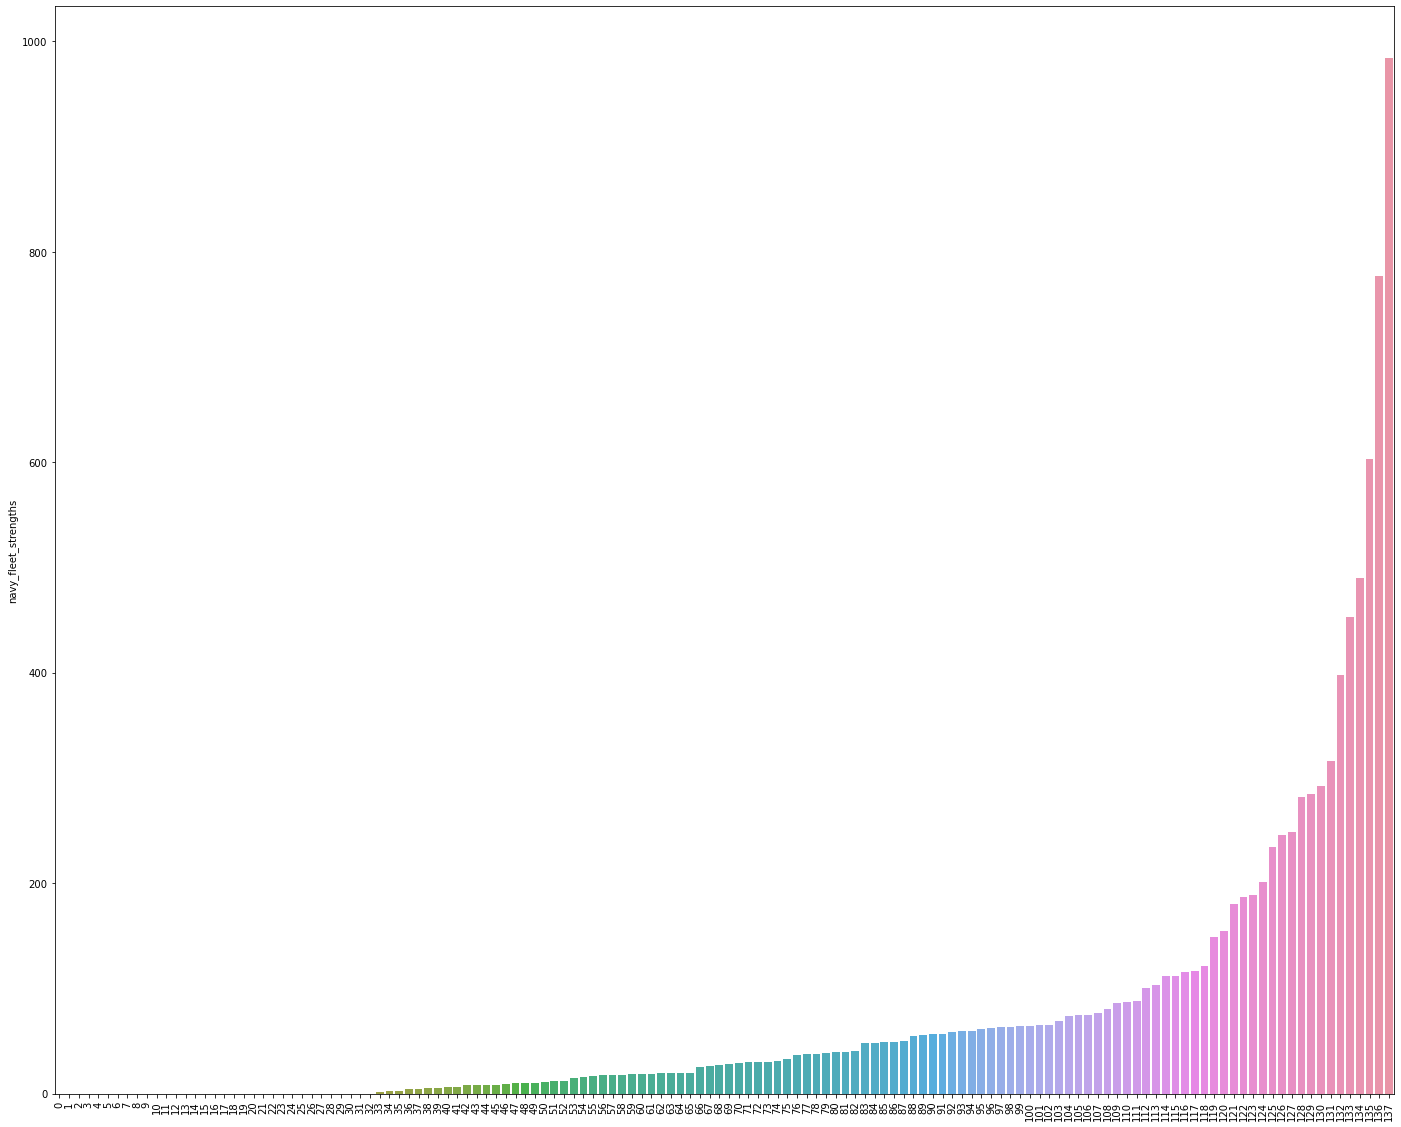

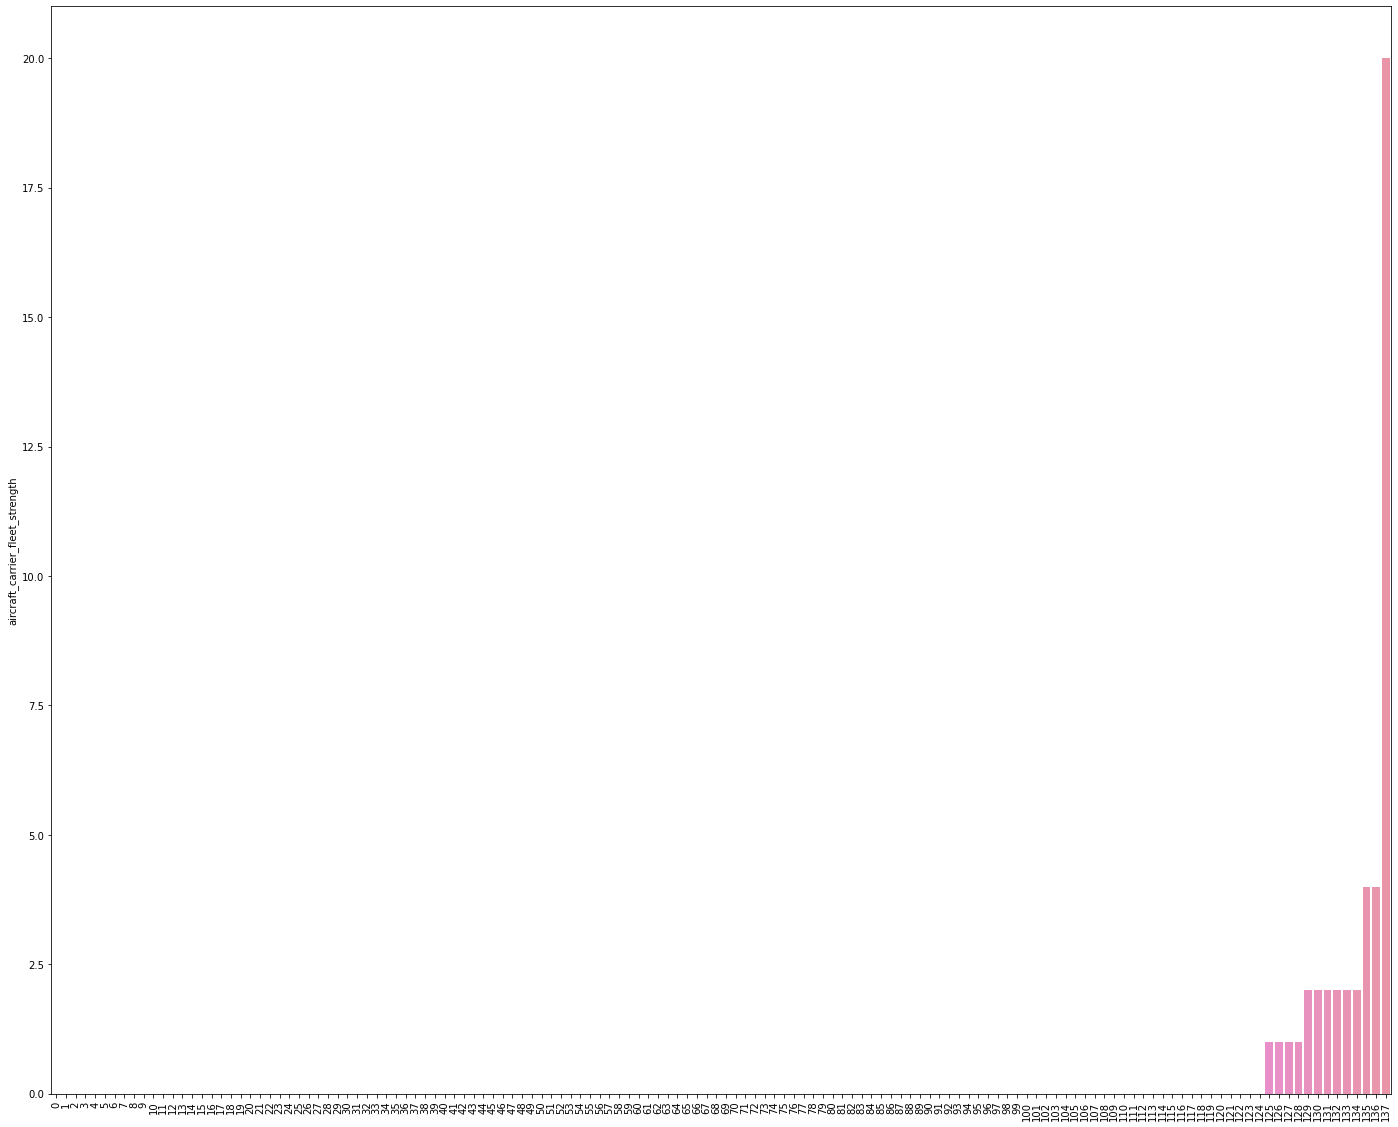

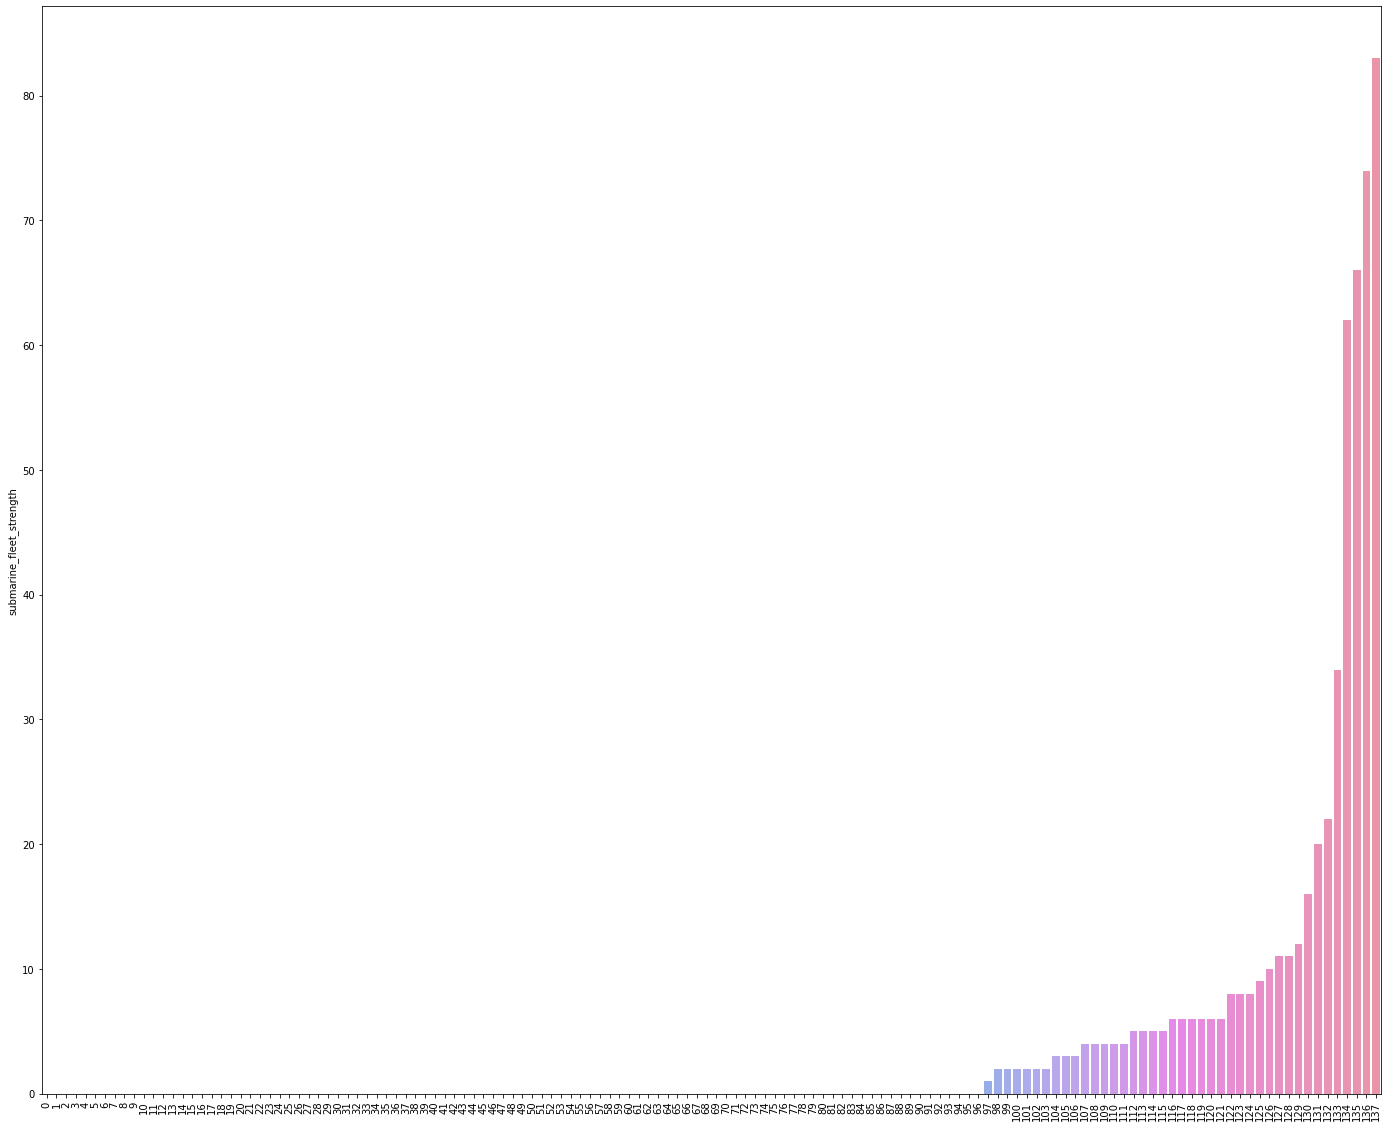

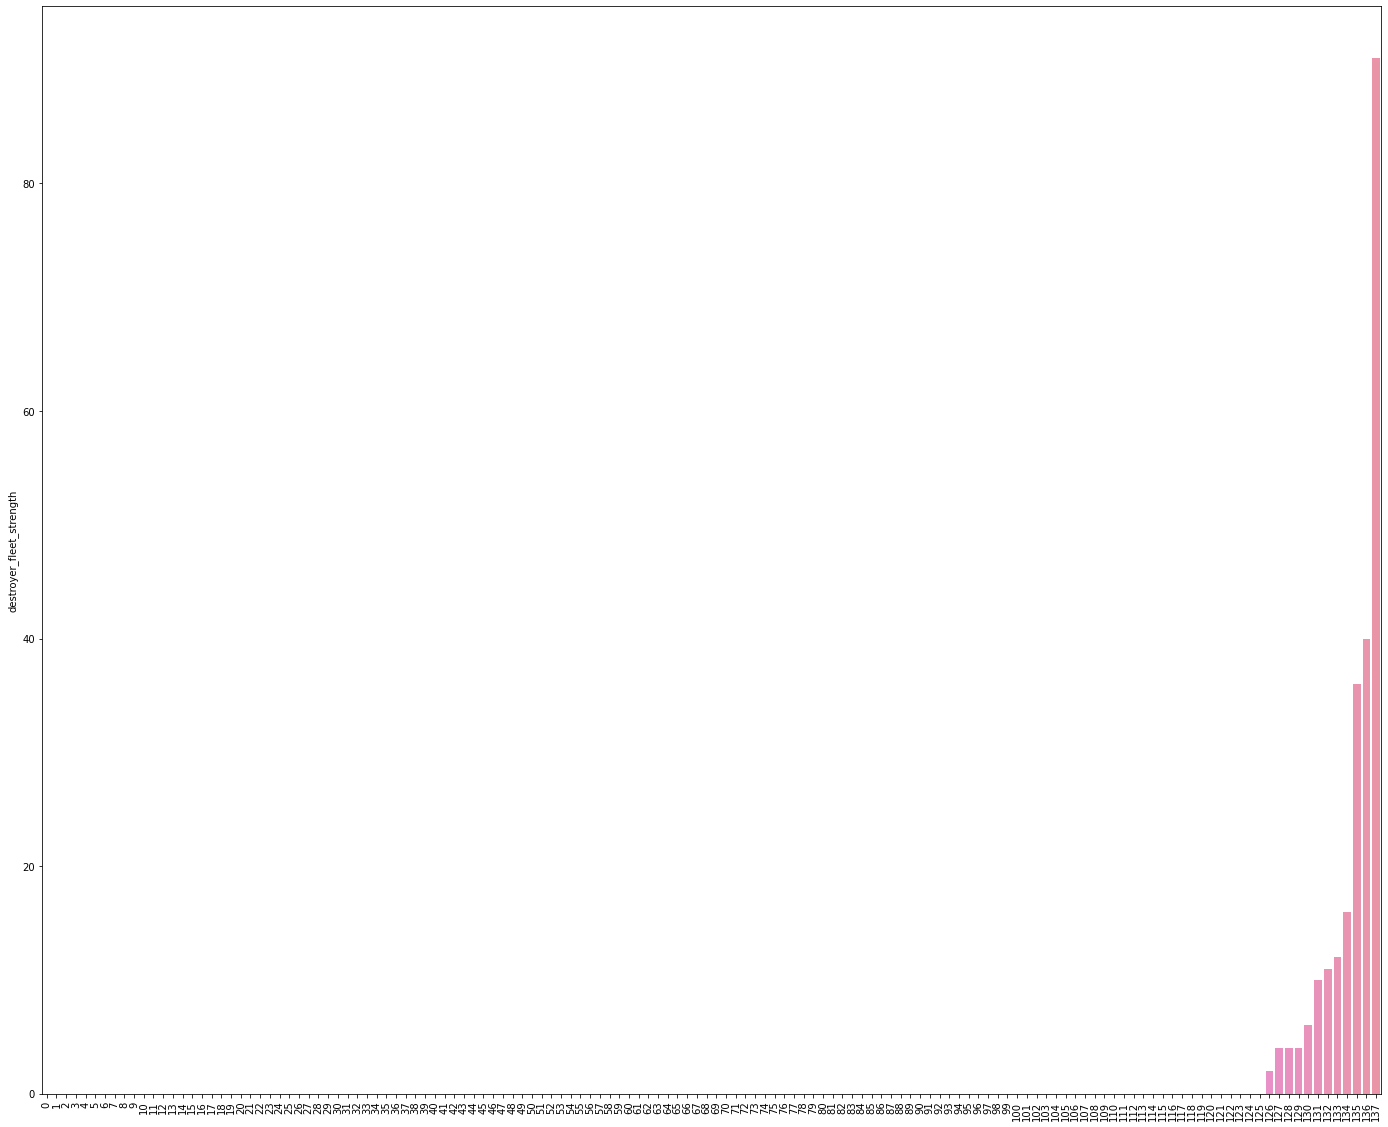

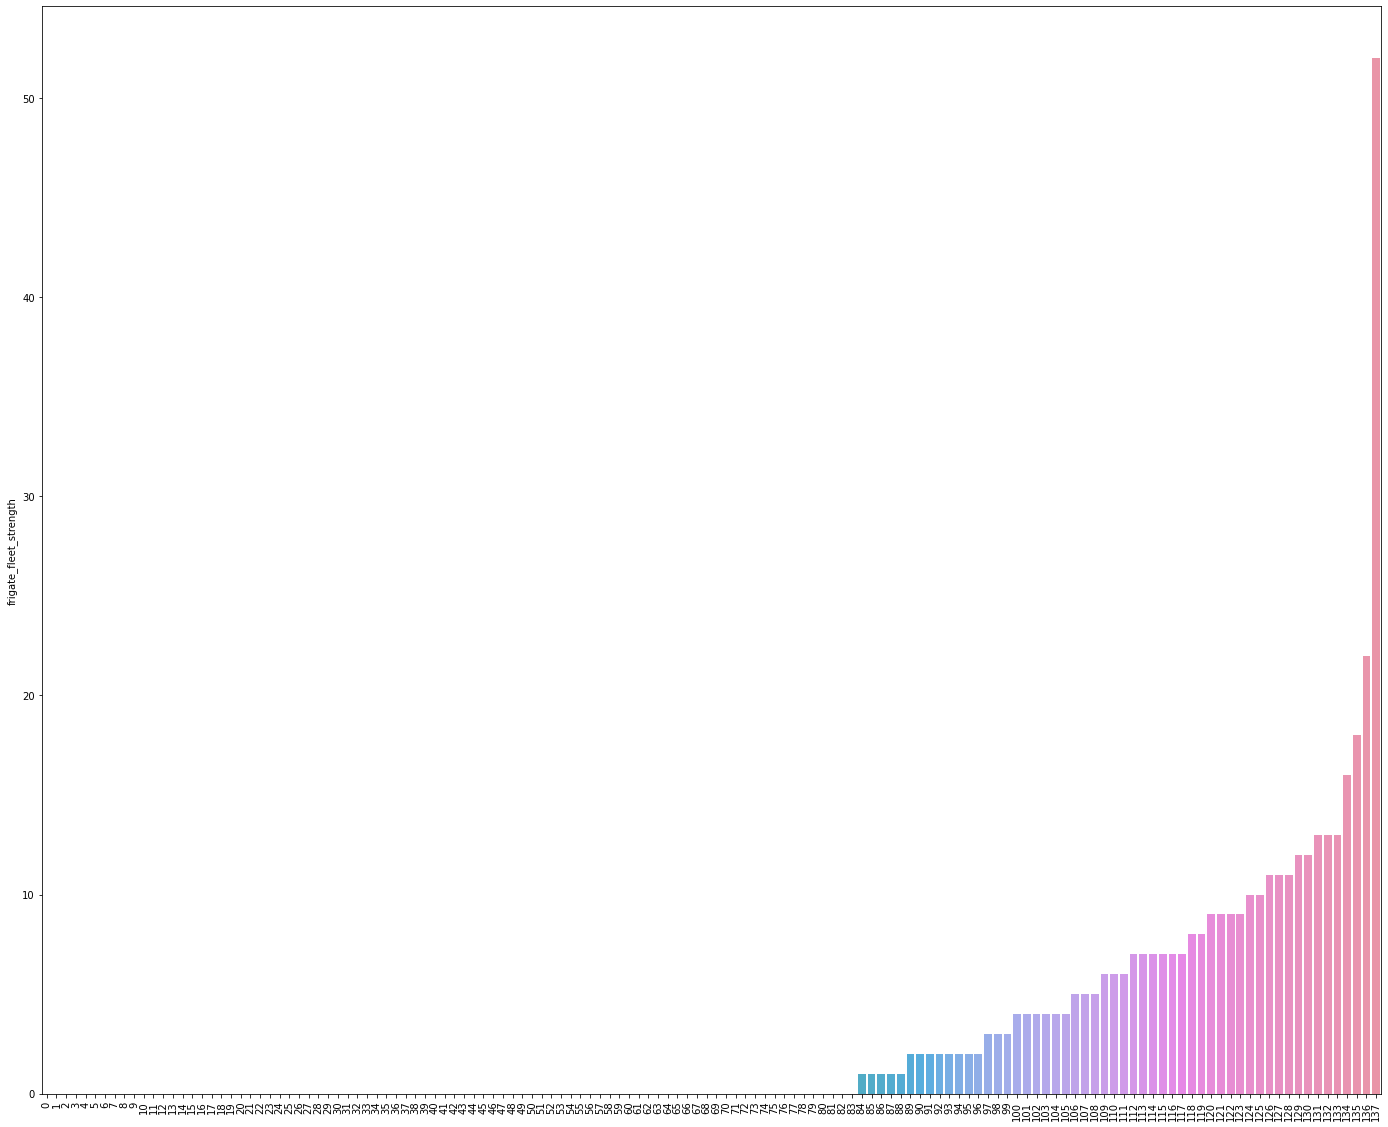

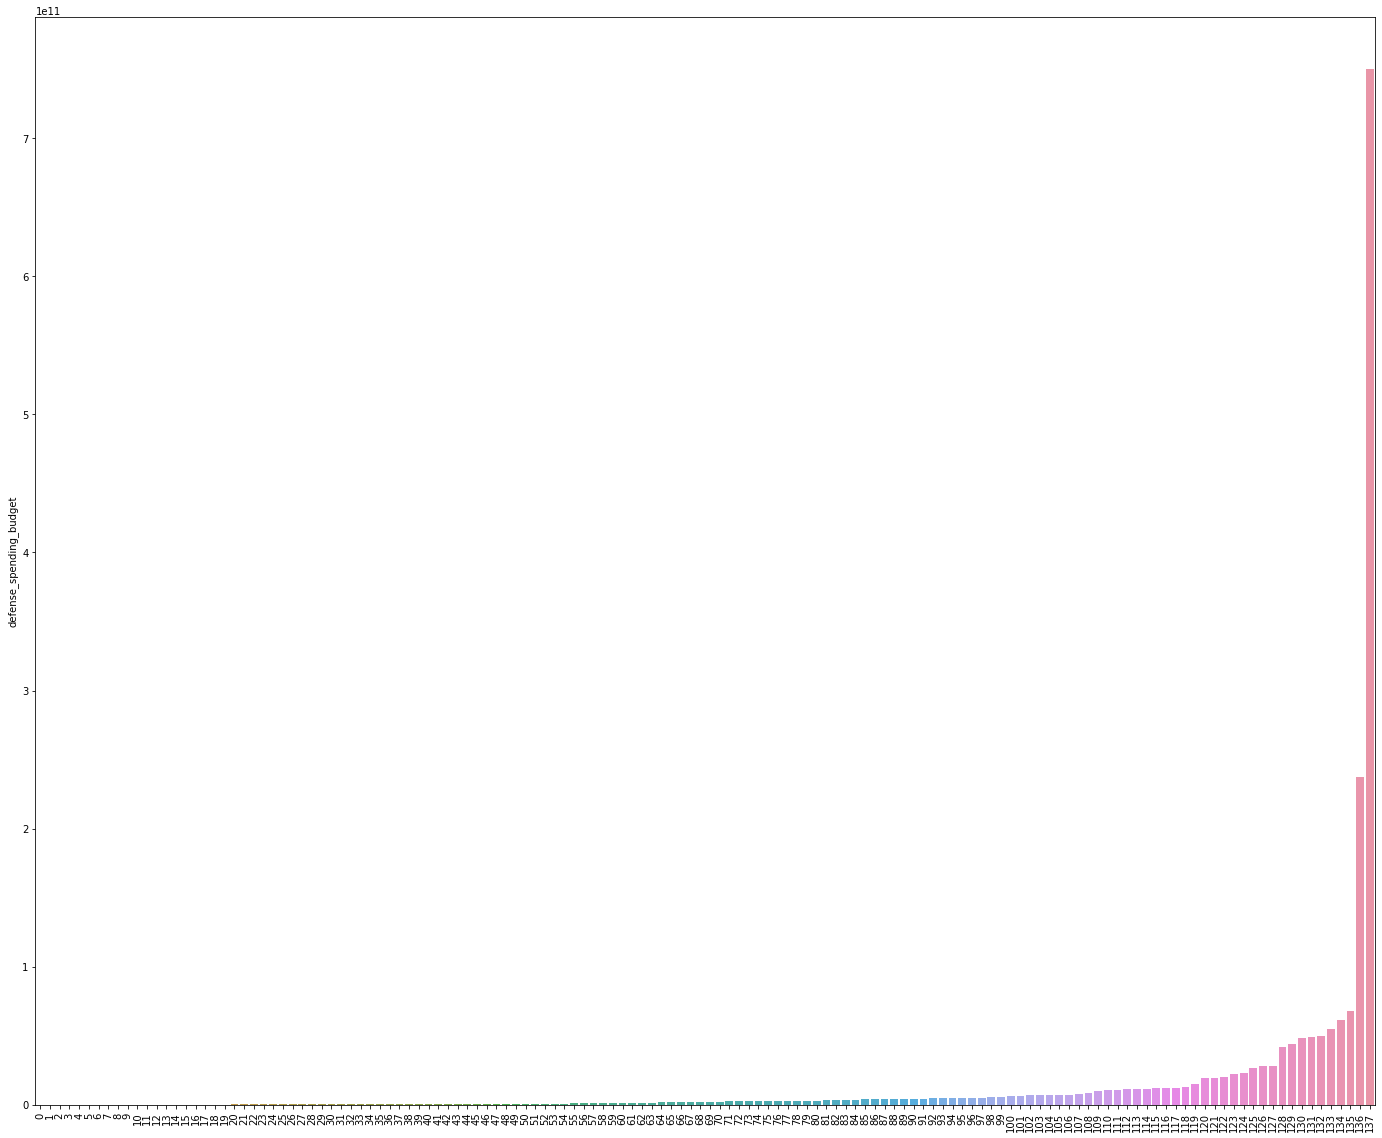

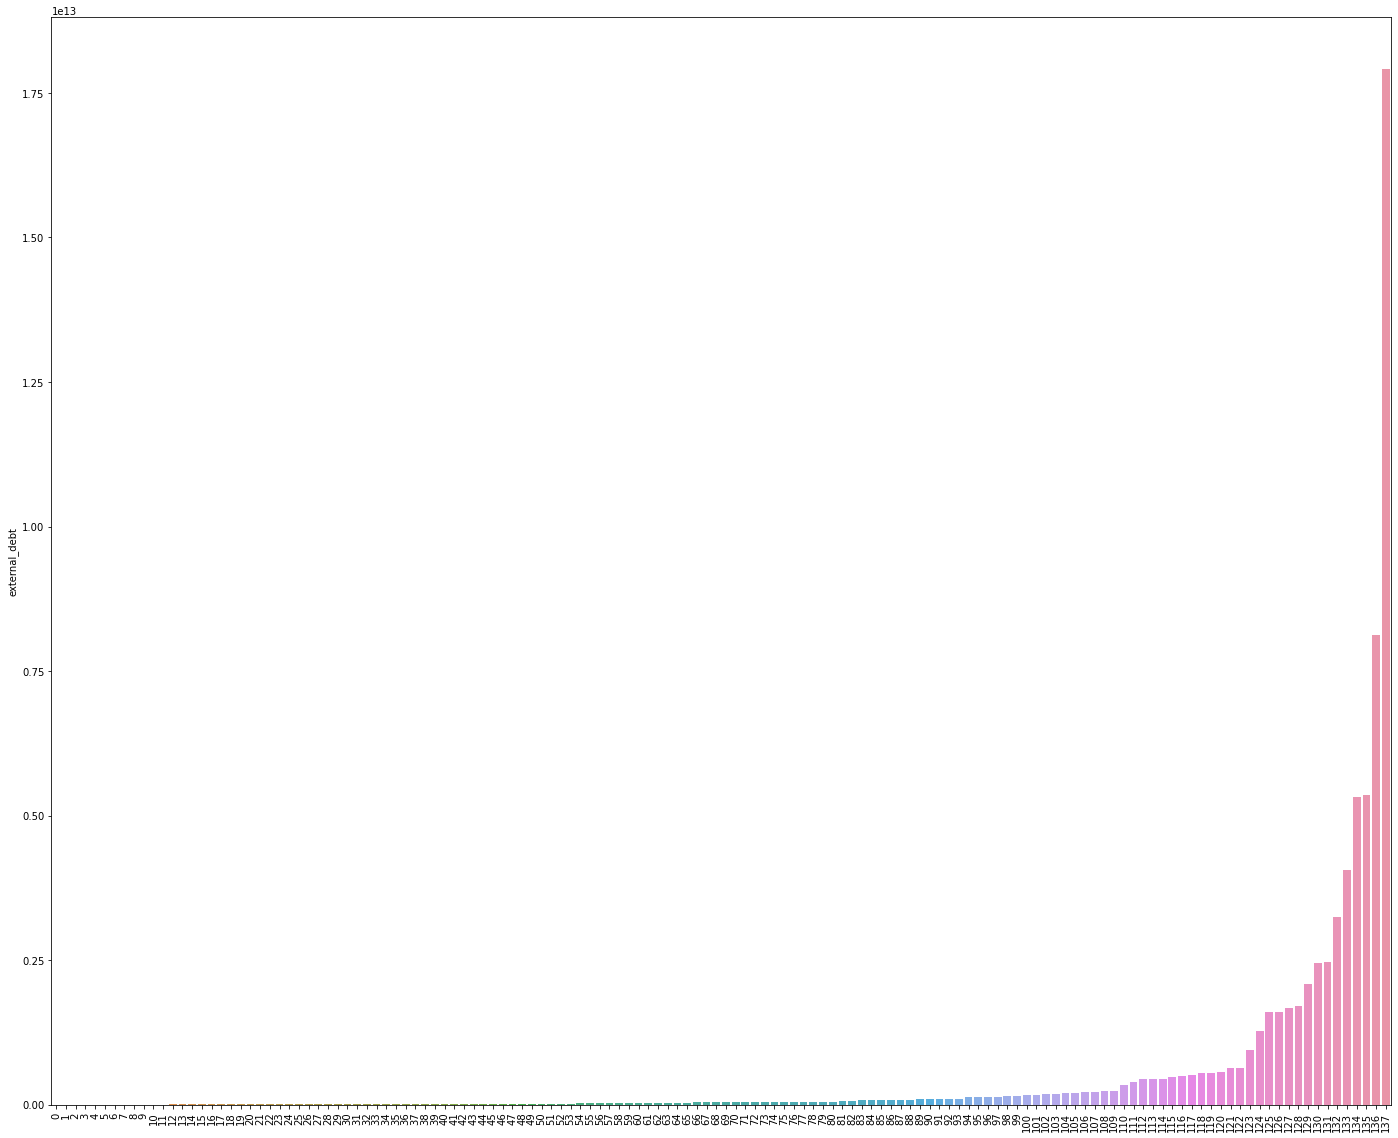

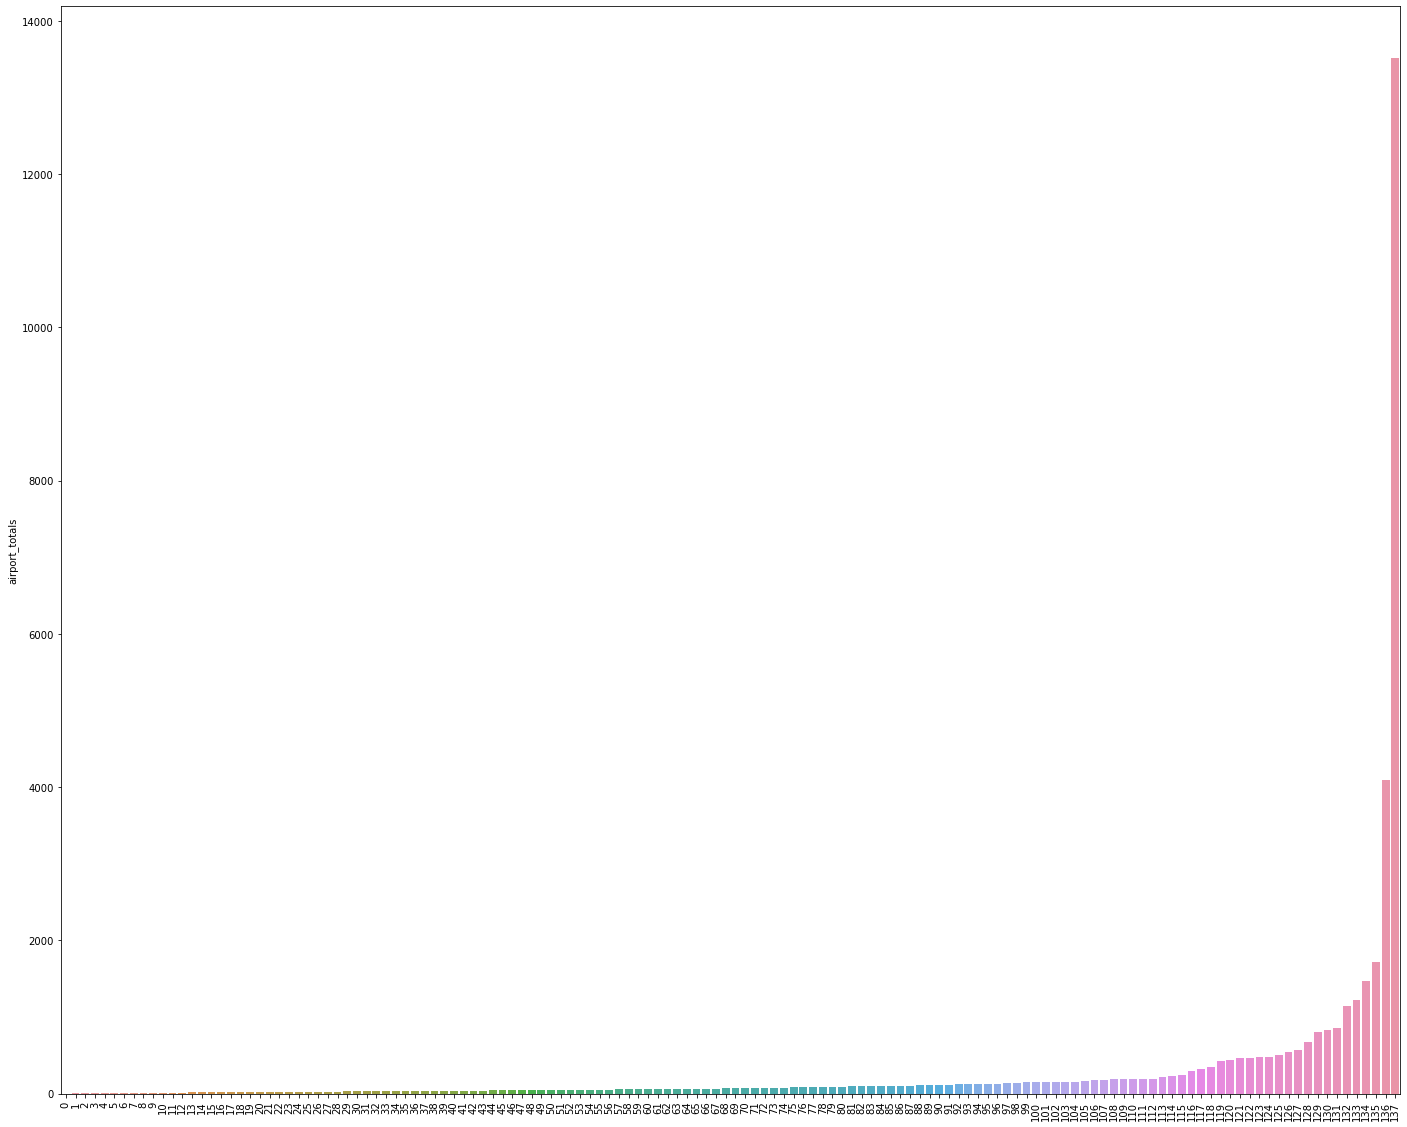

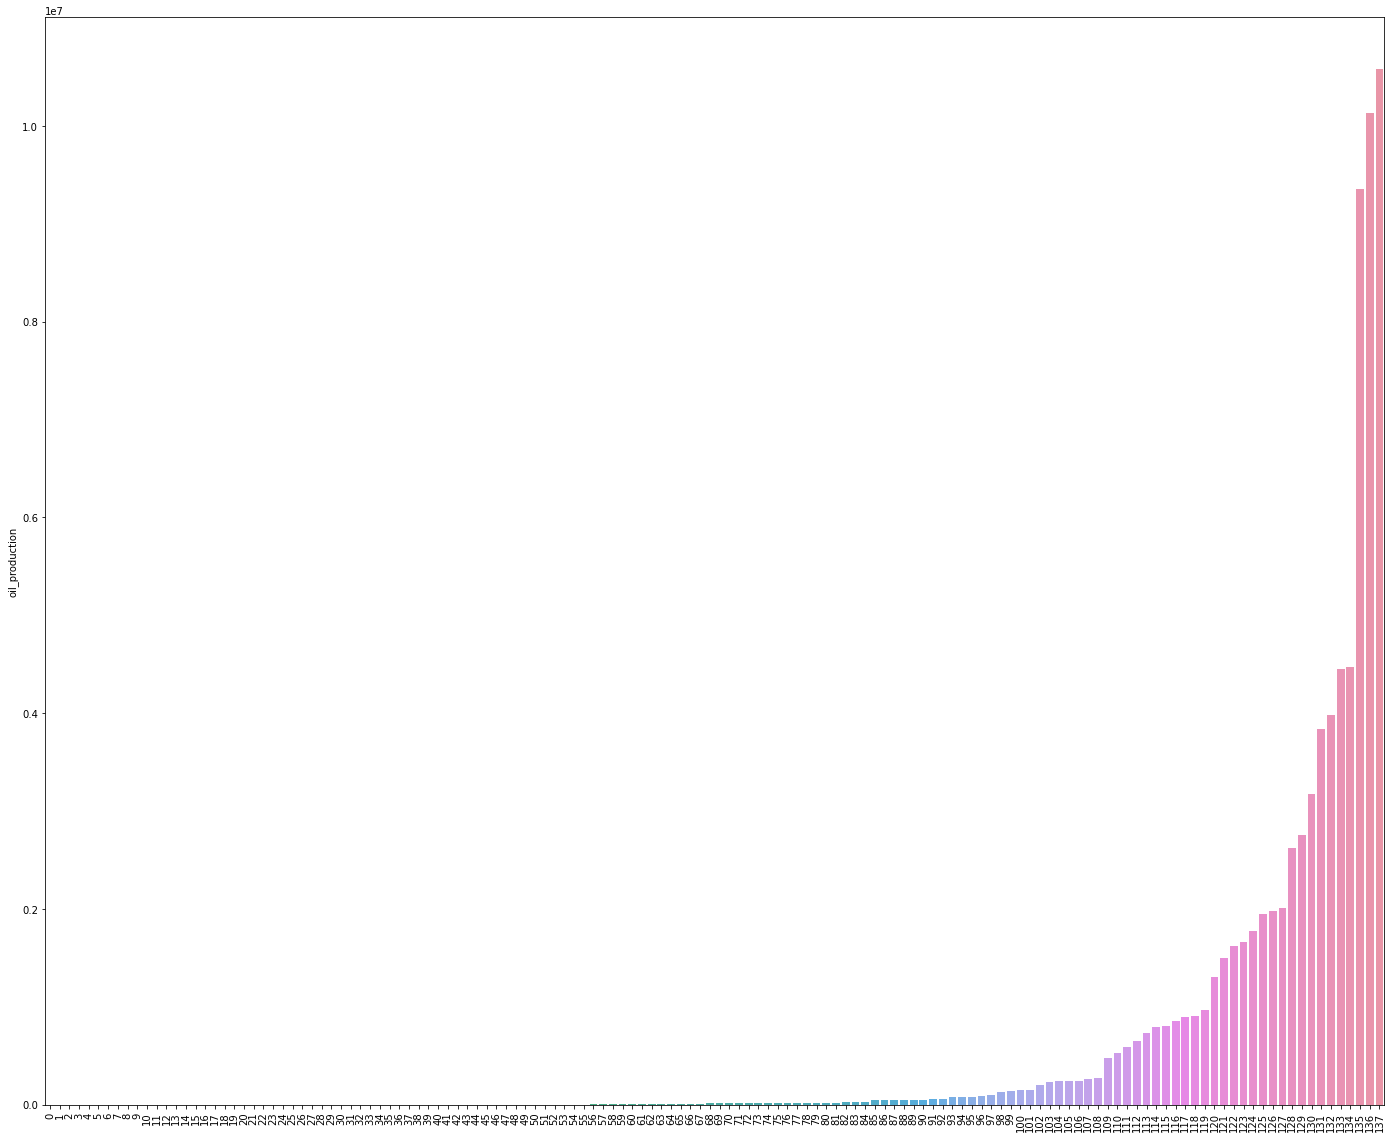

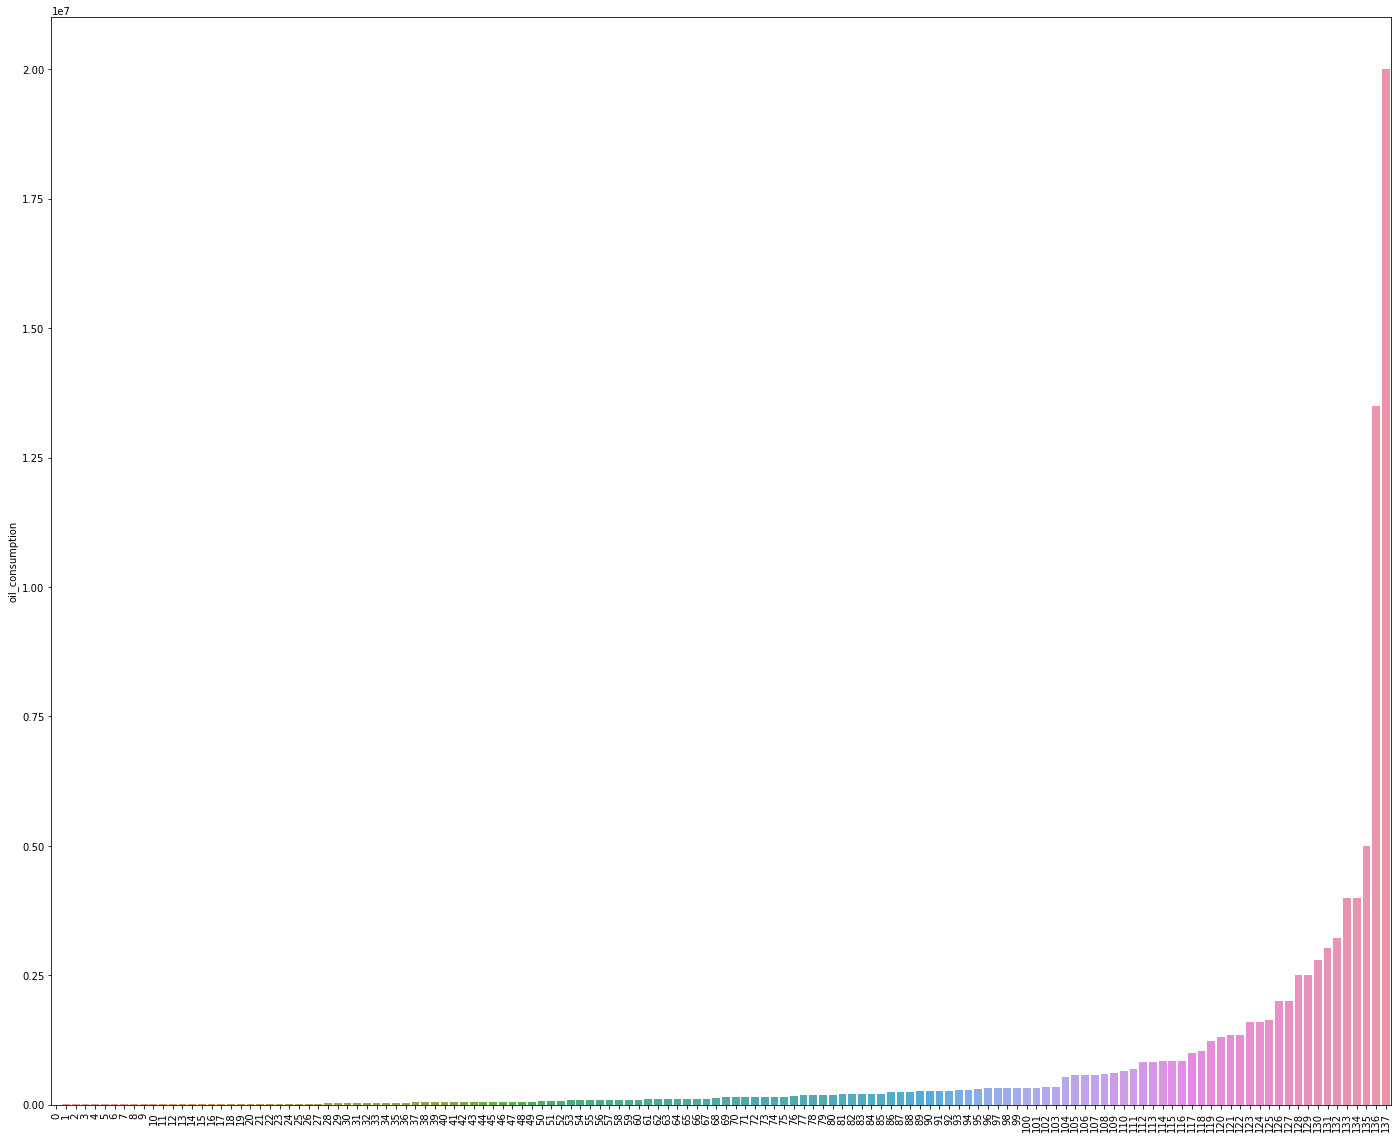

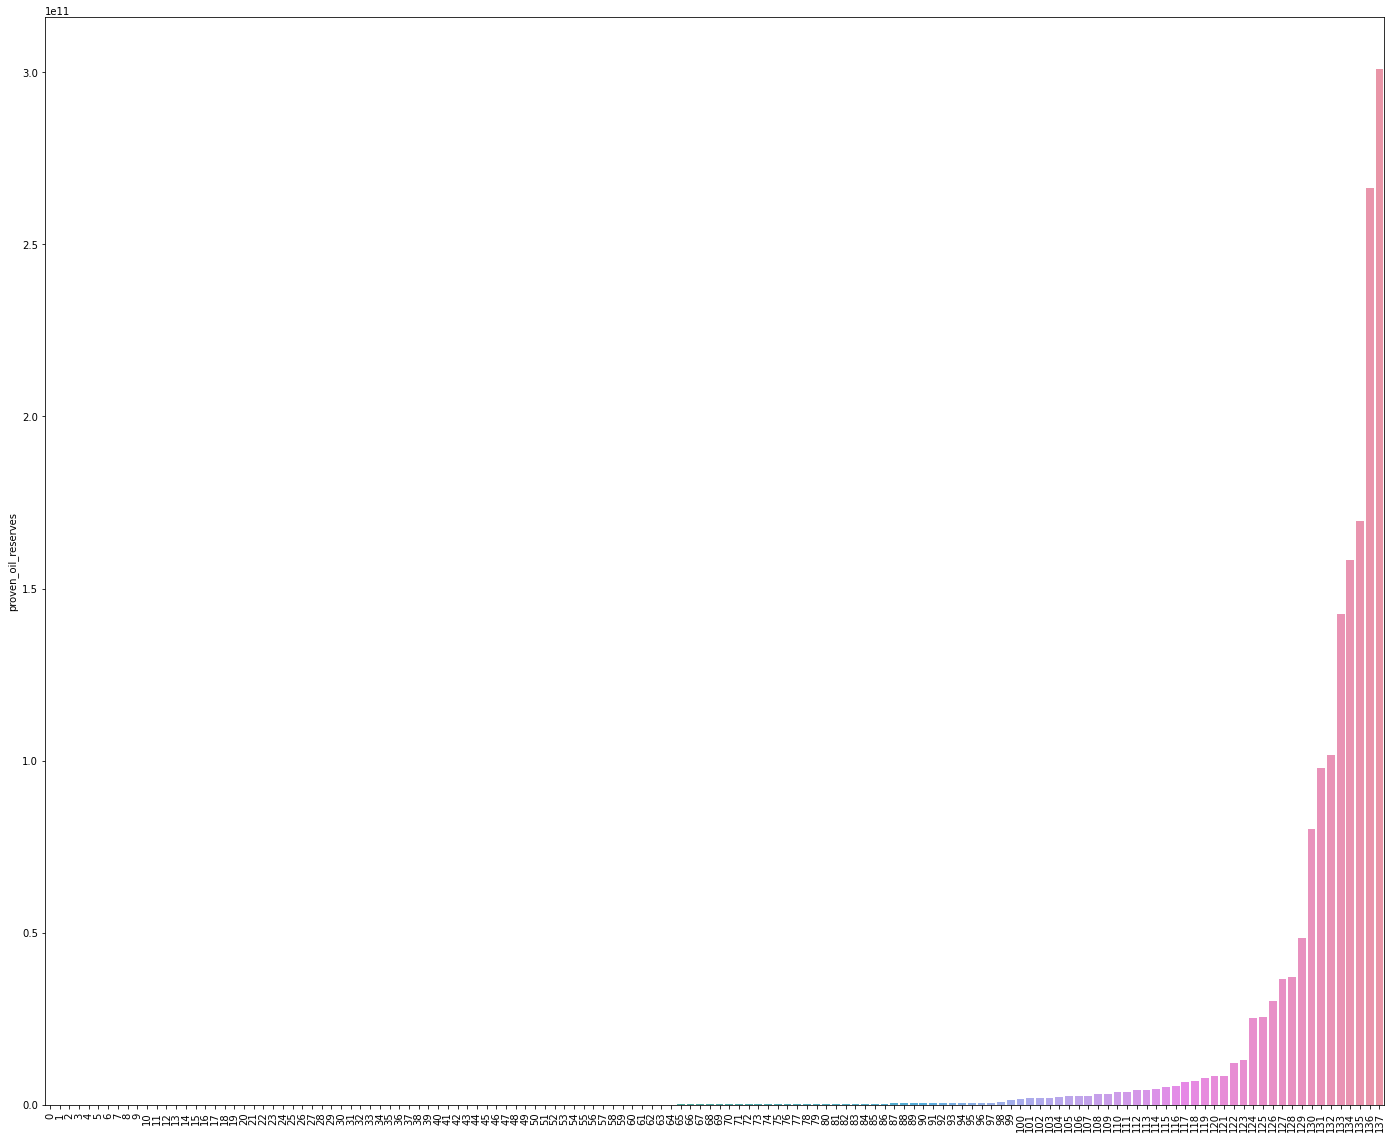

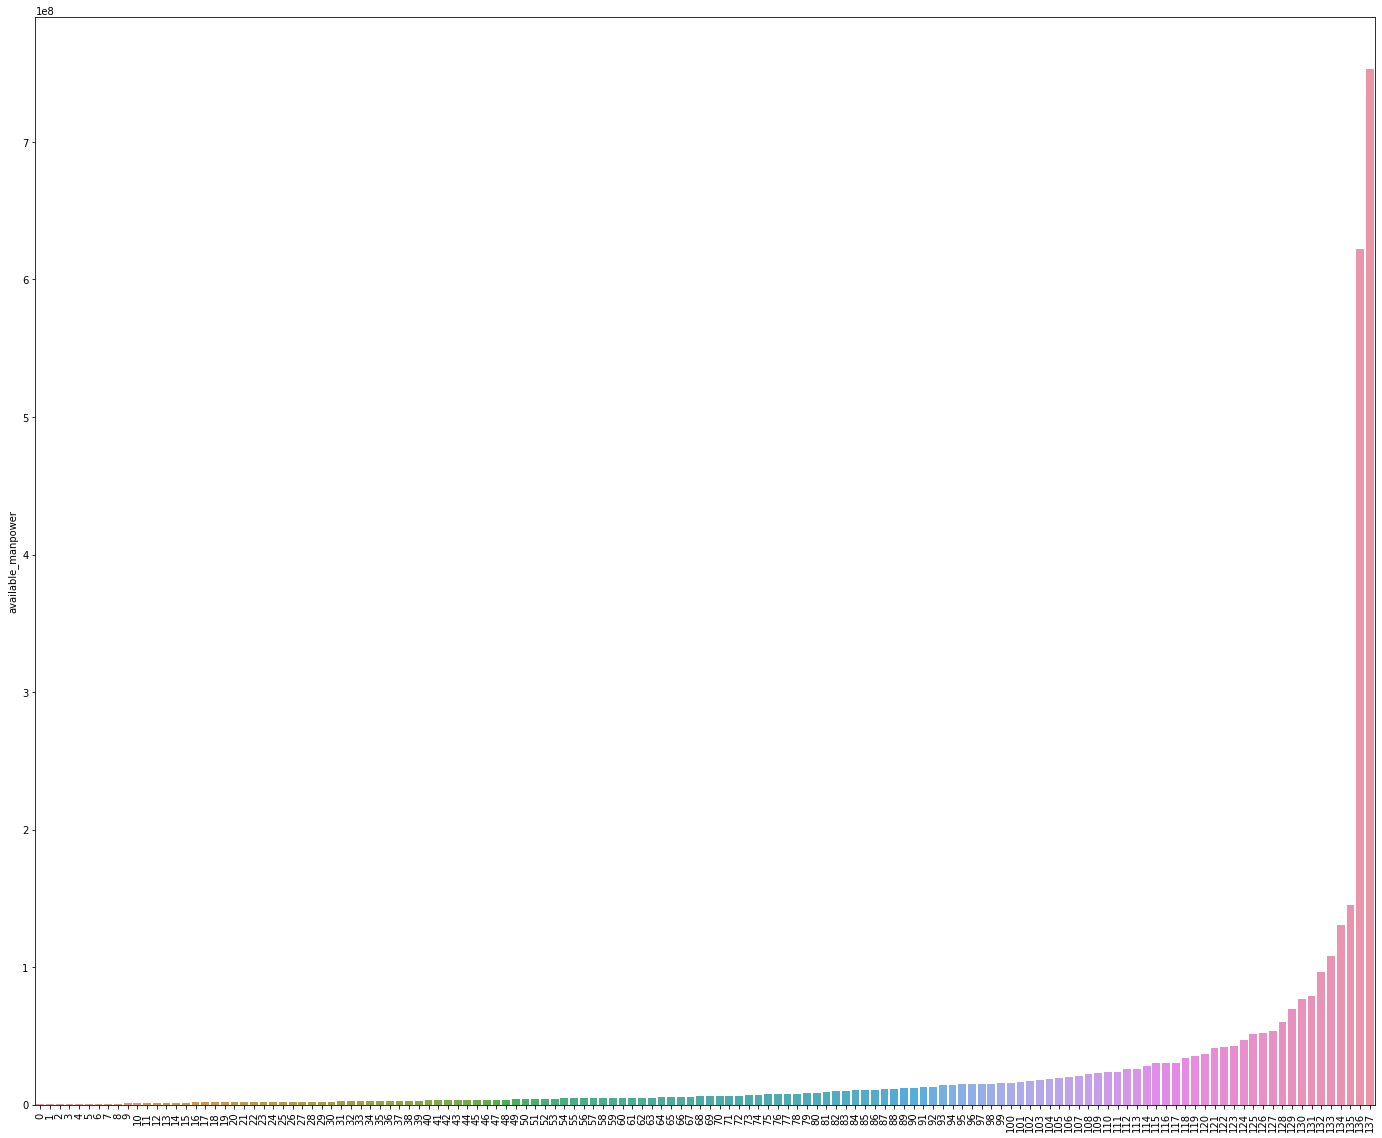

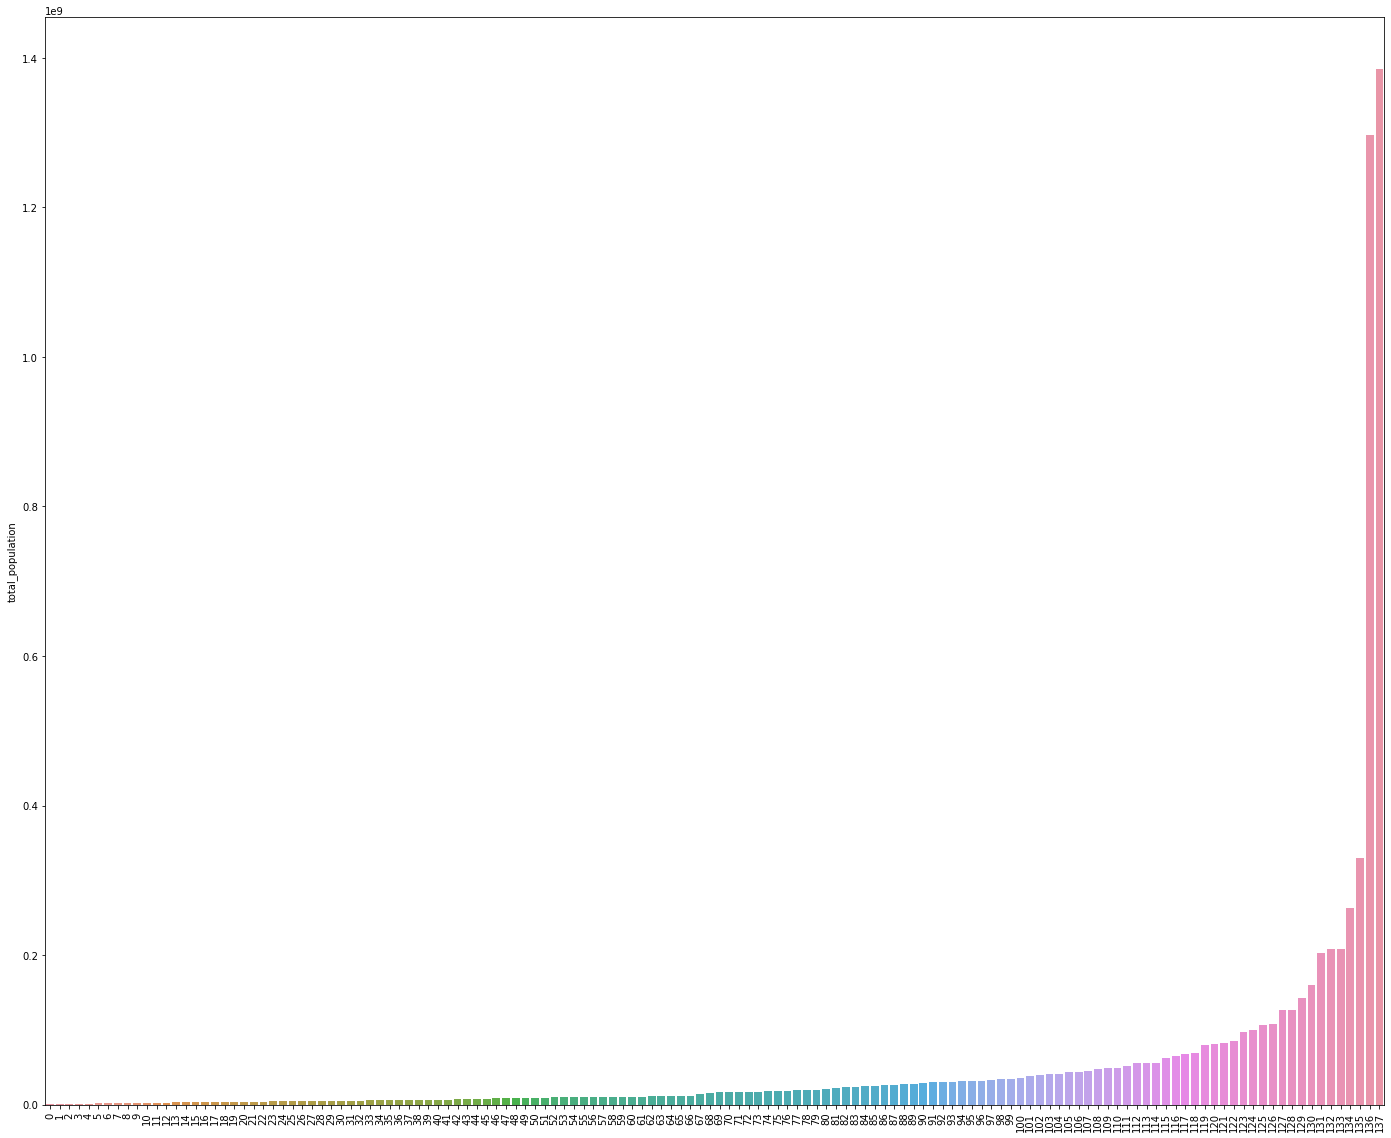

In [47]:
for col in df1.columns:
    plt.figure(figsize = (24,20))
    sns.barplot(y = df1[col], x = df1.index, data = df1, order = df1[col].values.sort())
    plt.xticks(rotation = 90);

Yukarıdaki grafikleri incelediğimde datayı featurelara göre cluster sayısının 3 veya 4 arasında olabileceği gibi bir izlenim ediniyorum. Çoğu feature da bir tanesi ön plana çıkarken, sonrasında 1-2 gözlem, sonrasında ise 2-3 grup gözlemin geldiğini görüyorum. Ancak datayı modele sokarak cluster için uygun olup olmadığını ve kaç tane clustere ayırmam gerektiğini Kmeans ve Hierarchical ile incelemek istiyorum.

## Decriptive statistics

In [52]:
df2 = df1.copy()
df2.head()

country  military_strength_power_index  aircraft_strength  fighter/interceptor_strength  attack_aircraft_strength  transport_aircraft_fleet_strength  trainer_aircraft_fleet  helicopter_fleet_strength  attack_helicopter_fleet_strength  tank_strength  afv/apc_strength  self-propelled_artillery_strength  towed_artillery_strength  rocket_projector_strength  navy_fleet_strengths  aircraft_carrier_fleet_strength  submarine_fleet_strength  destroyer_fleet_strength  frigate_fleet_strength  defense_spending_budget  external_debt  airport_totals  oil_production  oil_consumption  proven_oil_reserves  available_manpower  total_population
0  Afghanistan                         1.3444              260.0                           0.0                      25.0                               30.0                     0.0                      187.0                               0.0            0.0            1062.0                                0.0                     176.0                       50.0                   0.0                              0.0                       0.0                       0.0                     0.0             1.200000e+10   2.840000e+09            43.0             0.0           5500.0         0.000000e+00          14325743.0        34940837.0
1      Albania                         2.3137               19.0                           0.0                       0.0                                0.0                     0.0                       19.0                               0.0            0.0             467.0                                0.0                       0.0                        0.0                  38.0                              0.0                       0.0                       0.0                     0.0             2.500000e+08   9.505000e+09             4.0         16000.0          42500.0         1.683000e+08           1519438.0         3057220.0
2      Algeria                         0.4659              551.0                         103.0                      22.0                               59.0                    87.0                      257.0                              45.0          880.0            7361.0                              320.0                     240.0                      316.0                 201.0                              0.0                       6.0                       0.0                     5.0             1.300000e+10   6.260000e+09           157.0       1306000.0         325000.0         1.220000e+10          20741263.0        41657488.0
3       Angola                         0.8379              295.0                          72.0                      18.0                               30.0                    47.0                      126.0                              15.0          379.0             595.0                               28.0                     357.0                      115.0                  57.0                              0.0                       0.0                       0.0                     0.0             7.000000e+09   4.208000e+10           176.0       1666000.0          82300.0         8.273000e+09           6244205.0        30355880.0
4    Argentina                         0.6521              227.0                          24.0                       7.0                                9.0                    64.0                      100.0                               0.0          370.0             739.0                               83.0                     172.0                       26.0                  49.0                              0.0                       2.0                       4.0                     0.0             4.200000e+09   2.149000e+11          1138.0        479400.0         685000.0         2.185000e+09          20179430.0        44694198.0

In [53]:
df2.describe().round(4).style

# Data Preprocessing

In [97]:
X = df2.drop(["country"], axis=1).copy()
X.head()

military_strength_power_index  aircraft_strength  fighter/interceptor_strength  attack_aircraft_strength  transport_aircraft_fleet_strength  trainer_aircraft_fleet  helicopter_fleet_strength  attack_helicopter_fleet_strength  tank_strength  afv/apc_strength  self-propelled_artillery_strength  towed_artillery_strength  rocket_projector_strength  navy_fleet_strengths  aircraft_carrier_fleet_strength  submarine_fleet_strength  destroyer_fleet_strength  frigate_fleet_strength  defense_spending_budget  external_debt  airport_totals  oil_production  oil_consumption  proven_oil_reserves  available_manpower  total_population
0                         1.3444              260.0                           0.0                      25.0                               30.0                     0.0                      187.0                               0.0            0.0            1062.0                                0.0                     176.0                       50.0                   0.0                              0.0                       0.0                       0.0                     0.0             1.200000e+10   2.840000e+09            43.0             0.0           5500.0         0.000000e+00          14325743.0        34940837.0
1                         2.3137               19.0                           0.0                       0.0                                0.0                     0.0                       19.0                               0.0            0.0             467.0                                0.0                       0.0                        0.0                  38.0                              0.0                       0.0                       0.0                     0.0             2.500000e+08   9.505000e+09             4.0         16000.0          42500.0         1.683000e+08           1519438.0         3057220.0
2                         0.4659              551.0                         103.0                      22.0                               59.0                    87.0                      257.0                              45.0          880.0            7361.0                              320.0                     240.0                      316.0                 201.0                              0.0                       6.0                       0.0                     5.0             1.300000e+10   6.260000e+09           157.0       1306000.0         325000.0         1.220000e+10          20741263.0        41657488.0
3                         0.8379              295.0                          72.0                      18.0                               30.0                    47.0                      126.0                              15.0          379.0             595.0                               28.0                     357.0                      115.0                  57.0                              0.0                       0.0                       0.0                     0.0             7.000000e+09   4.208000e+10           176.0       1666000.0          82300.0         8.273000e+09           6244205.0        30355880.0
4                         0.6521              227.0                          24.0                       7.0                                9.0                    64.0                      100.0                               0.0          370.0             739.0                               83.0                     172.0                       26.0                  49.0                              0.0                       2.0                       4.0                     0.0             4.200000e+09   2.149000e+11          1138.0        479400.0         685000.0         2.185000e+09          20179430.0        44694198.0

In [55]:
X.shape

(138, 26)

# Modelling

## Hopkins Test 
#### Assess the clusterability of a dataset. A score between 0 and 1, a score around 0.5 express no clusterability, a score tending to 1 express an uniform distrubution so clustering can't be useful and  0 express  not an uniform distrubution hence clusterering can be useful.

In [56]:
from pyclustertend import hopkins

In [57]:
hopkins(X, X.shape[0]) 

0.07005145569907069

In [58]:
hopkins(X, 60)

0.02717334298166361

In [59]:
df3 = X.copy()
df4 = X.copy()

In [60]:
hopkins(MinMaxScaler().fit_transform(df3), df3.shape[0])

0.08282874774243922

In [61]:
hopkins(StandardScaler().fit_transform(df4), df4.shape[0])

0.07555516758552727

In [98]:
scaler = StandardScaler()

In [99]:
X_scaled = scaler.fit_transform(X)

In [100]:
X = pd.DataFrame(X_scaled, columns=X.columns)

Hem MinMaxScaler hem de StandardScaler yaparak aldığım hopkins değerleri ile yapmadan aldığım değerler arasında ciddi bir fark olmadığını hatta az bir miktarda olsa kötüleştiğini görüyorum, ancak değerler arasında çok büyük farklılıklar olduğundan dolayı scale işlemi yapma kararı aldım ve score 0-0.5 arasında olmasından dolayı cluster işlemi için uygun olduğunu değerlendirdim. 

## Clustering with K-means

In [65]:
from sklearn.cluster import KMeans

K_means_model = KMeans(n_clusters=8, random_state=42)  # önce default değer olan 8 ile bir cluster yaptım.

In [66]:
K_means_model.fit_predict(X)  

array([1, 1, 4, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1,
       0, 1, 1, 1, 6, 4, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 4, 1, 1, 4,
       1, 4, 1, 1, 1, 5, 4, 0, 0, 1, 4, 4, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 7,
       1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 1, 1, 1, 1, 1, 1, 1,
       4, 1, 4, 1, 1, 1, 1, 1, 4, 4, 1, 1, 4, 1, 4, 1, 1, 4, 0, 4, 3, 1,
       1, 0, 4, 1, 1, 1])

In [67]:
X["Classes"] = K_means_model.labels_
X.head()

military_strength_power_index  aircraft_strength  fighter/interceptor_strength  attack_aircraft_strength  transport_aircraft_fleet_strength  trainer_aircraft_fleet  helicopter_fleet_strength  attack_helicopter_fleet_strength  tank_strength  afv/apc_strength  self-propelled_artillery_strength  towed_artillery_strength  rocket_projector_strength  navy_fleet_strengths  aircraft_carrier_fleet_strength  submarine_fleet_strength  destroyer_fleet_strength  frigate_fleet_strength  defense_spending_budget  external_debt  airport_totals  oil_production  oil_consumption  proven_oil_reserves  available_manpower  total_population  Classes
0                      -0.088171          -0.104660                     -0.355421                 -0.008078                          -0.002521               -0.345240                   0.063544                         -0.264231      -0.428199         -0.264092                          -0.309482                 -0.271503                  -0.221570             -0.529170                        -0.177362                 -0.317815                 -0.187480               -0.486280                -0.029726      -0.280709       -0.204411       -0.352511        -0.322322            -0.280406           -0.132033         -0.110873        1
1                       0.646586          -0.300992                     -0.355421                 -0.273513                          -0.328624               -0.345240                  -0.260595                         -0.264231      -0.428199         -0.374463                          -0.309482                 -0.490720                  -0.325171             -0.258758                        -0.177362                 -0.317815                 -0.187480               -0.486280                -0.204922      -0.277088       -0.236680       -0.342879        -0.305200            -0.276455           -0.284127         -0.304683        1
2                      -0.754099           0.132405                      0.093402                 -0.039931                           0.312713                0.017366                   0.198603                          0.199817       0.154596          0.904357                           0.157309                 -0.191788                   0.329585              0.901167                        -0.177362                  0.158908                 -0.187480                0.342197                -0.014815      -0.278851       -0.110084        0.433720        -0.174470             0.006007           -0.055840         -0.070045        4
3                      -0.472112          -0.076147                     -0.041681                 -0.082400                          -0.002521               -0.149349                  -0.054149                         -0.109548      -0.177200         -0.350719                          -0.268637                 -0.046058                  -0.086889             -0.123552                        -0.177362                 -0.317815                 -0.187480               -0.486280                -0.104277      -0.259389       -0.094363        0.650446        -0.286782            -0.086185           -0.228013         -0.138744        1
4                      -0.612954          -0.131544                     -0.250841                 -0.199191                          -0.230793               -0.078495                  -0.104314                         -0.264231      -0.183160         -0.324008                          -0.188408                 -0.276485                  -0.271298             -0.180481                        -0.177362                 -0.158908                  0.251033               -0.486280                -0.146026      -0.165493        0.701623       -0.063905        -0.007876            -0.229110           -0.062512         -0.051586        1

### Elbow Method 
### We use this method to find optimal k value by looking up to break point of graph. 

In [ ]:
Elbow Metodu ilede en optimal k value değerini bulmaya çalışıyorum.

In [68]:
ssd = []

K = range(2,10)

for k in K:
    model = KMeans(n_clusters =k, random_state=42)
    model.fit(X)
    ssd.append(model.inertia_)

Text(0.5, 1.0, 'elbow method')

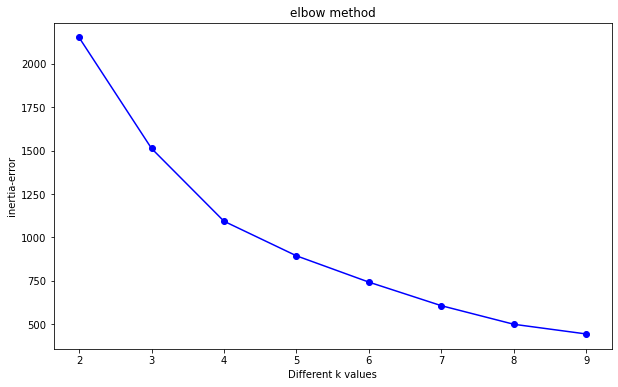

In [69]:
plt.plot(K, ssd, "bo-")
plt.xlabel("Different k values")
plt.ylabel("inertia-error") 
plt.title("elbow method") 

In [158]:
ssd

[2150.6915360050275,
 1512.0018645546554,
 1093.0322532263087,
 894.0156763123443,
 742.5468499120733,
 606.9059606589841,
 499.9597385570438,
 444.23517543153156]

In [70]:
df_diff =pd.DataFrame(-pd.Series(ssd).diff()).rename(index = lambda x : x+1)
df_diff

0
1         NaN
2  638.689671
3  418.969611
4  199.016577
5  151.468826
6  135.640889
7  106.946222
8   55.724563

<AxesSubplot:>

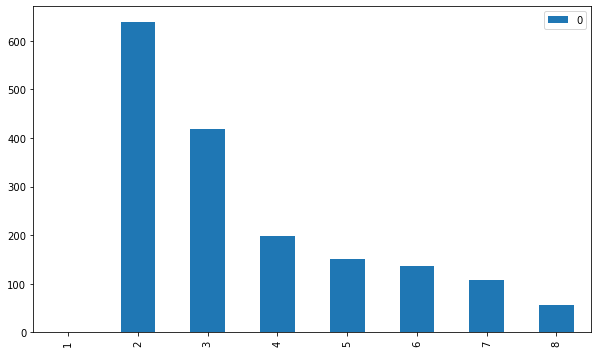

In [71]:
df_diff.plot(kind='bar')

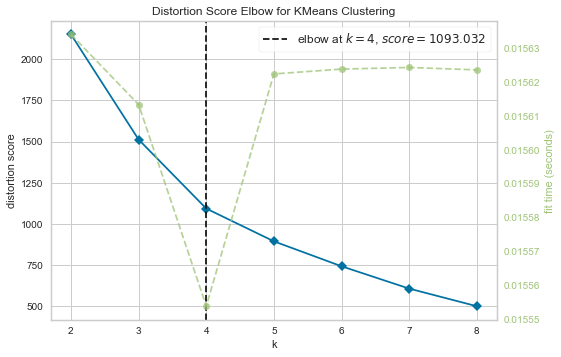

In [72]:
from yellowbrick.cluster import KElbowVisualizer

model_ = KMeans(random_state=42)
visualizer = KElbowVisualizer(model_, k=(2,9))

visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show();

Sonuçlara bakınca 4 te keskin düşüsün yavaşladığı görülüyor. Yellowbrick ise bize optimal k değerini 4 olarak veriyor. Bu durumda ikisininde aynı olmasından hareketle cluster 4 te karar kılıyorum. Yukarıdaki barplot grafiklerimde bana cluster sayısının 3 veya 4 olabileceği konusunda bir insight sağlamıştı. Gerçek hayatta baktığımda da USA tek başına süper güç olduğu, buna rakip olan 2-3 ülkenin bölgesel güç olduğunu, sonrasında ise kalan bir grup ülkeyi askeri yönden zayıf olan bir grup ülkenin takip ettiğini göz önüne aldığımızda cluster sayısının 4 olmasının en uygun seçim olduğunu söyleyebilirim.

In [73]:
from sklearn.metrics import silhouette_score

In [74]:
silhouette_score(X, K_means_model.labels_)  

# silhoutte score 1 e çok yakın olmasada yaptığım cluster işleminin başarılı olduğunu söyleyebilirim.

0.5665242832692856

In [75]:
range_n_clusters = range(2,9)
for num_clusters in range_n_clusters:
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(X)
    cluster_labels = kmeans.labels_
    # silhouette score
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}")

For n_clusters=2, the silhouette score is 0.8534791955849842
For n_clusters=3, the silhouette score is 0.7900759665131807
For n_clusters=4, the silhouette score is 0.5523937300040013
For n_clusters=5, the silhouette score is 0.5475704994495998
For n_clusters=6, the silhouette score is 0.5708924595158773
For n_clusters=7, the silhouette score is 0.5699821058643009
For n_clusters=8, the silhouette score is 0.5665242832692856


en iyi score 2 ve 3 de vermiş gözüküyor ancak 2 nin inertia değeri yüksek. ancak burada 3 silhoutte değerine bakarak 3 ün daha uygun olabileceğini değerlendirdim. Ancak önceki aldığım değer olan 4 ve buradan gelen 3 arasında bir kararsızlık durumu söz konusu oldu. 

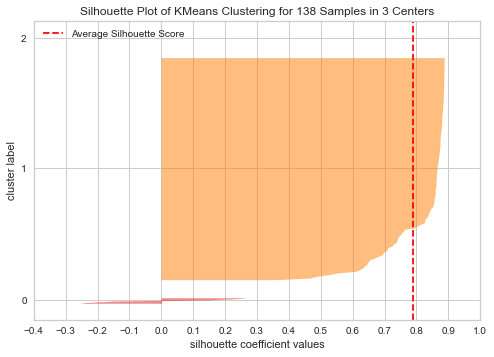

In [77]:
from sklearn.cluster import KMeans

from yellowbrick.cluster import SilhouetteVisualizer

model3 = KMeans(n_clusters=3, random_state=42)
visualizer = SilhouetteVisualizer(model3)

visualizer.fit(X)    # Fit the data to the visualizer
visualizer.poof();

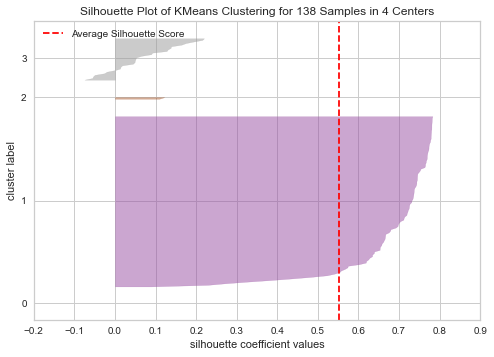

In [76]:
from sklearn.cluster import KMeans

from yellowbrick.cluster import SilhouetteVisualizer

model3 = KMeans(n_clusters=4, random_state=42)
visualizer = SilhouetteVisualizer(model3)

visualizer.fit(X)    # Fit the data to the visualizer
visualizer.poof();

3 ve 4 için silhoutte değerlerinin sağladığı grafiklere bakınca 3 için sağladığı grafik daha tutarlı gibi geldi. 

### Model Building and label visualisation

In [101]:
model = KMeans(n_clusters =4, random_state=42)
model.fit_predict(X)

array([0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0,
       3, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 3, 0, 0, 3,
       0, 3, 0, 0, 0, 3, 3, 3, 3, 0, 3, 3, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 3,
       0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0, 0, 0,
       3, 0, 3, 0, 0, 0, 0, 0, 3, 3, 0, 0, 3, 0, 3, 0, 0, 3, 3, 3, 1, 0,
       0, 3, 3, 0, 0, 0])

In [102]:
clusters = model.labels_

In [103]:
X["predicted_clusters"] = clusters

In [104]:
labels = df["country"]
labels

0                           Afghanistan
1                               Albania
2                               Algeria
3                                Angola
4                             Argentina
5                               Armenia
6                             Australia
7                               Austria
8                            Azerbaijan
9                               Bahrain
10                           Bangladesh
11                              Belarus
12                              Belgium
13                               Bhutan
14                              Bolivia
15               Bosnia and Herzegovina
16                             Botswana
17                               Brazil
18                             Bulgaria
19                         Burkina Faso
20                             Cambodia
21                             Cameroon
22                               Canada
23             Central African Republic
24                                 Chad


In [105]:
X["labels"] = labels

In [106]:
ct = pd.crosstab(X.predicted_clusters, X.labels)  # sola tahminleri sağa ise gerçek değerleri giriyoruz.
ct

labels              Afghanistan  Albania  Algeria  Angola  Argentina  Armenia  Australia  Austria  Azerbaijan  Bahrain  Bangladesh  Belarus  Belgium  Bhutan  Bolivia  Bosnia and Herzegovina  Botswana  Brazil  Bulgaria  Burkina Faso  Cambodia  Cameroon  Canada  Central African Republic  Chad  Chile  China  Colombia  Croatia  Cuba  Czechia  Democratic Republic of the Congo  Denmark  Dominican Republic  Ecuador  Egypt  El Salvador  Estonia  Ethiopia  Finland  France  Gabon  Georgia  Germany  Ghana  Greece  Guatemala  Honduras  Hungary  India  Indonesia  Iran  Iraq  Ireland  Israel  Italy  Ivory Coast  Japan  Jordan  Kazakhstan  Kenya  Kuwait  Kyrgyzstan  Laos  Latvia  Lebanon  Liberia  Libya  Lithuania  Madagascar  Malaysia  Mali  Mauritania  Mexico  Moldova  Mongolia  Montenegro  Morocco  Mozambique  Myanmar  Namibia  Nepal  Netherlands  New Zealand  Nicaragua  Niger  Nigeria  North Korea  North Macedonia  Norway  Oman  Pakistan  Panama  Paraguay  Peru  Philippines  Poland  Portugal  \
predicted_clusters                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    
0                             1        1        0       1          1        1          1        1           1        1           1        1        1       1        1                       1         1       0         1             1         1         1       0                         1     1      1      0         0        1     1        1                                 1        1                   1        1      0            1        1         1        1       0      1        1        0      1       0          1         1        1      0          0     0     0        1       0      0            1      0       1           1      1       1           1     1       1        1        1      1          1           1         1     1           1       0        1         1           1        1           1        0        1      1            1            1          1      1        1            0                1       1     1         0       1         1     1            1       1         1   
1                             0        0        0       0          0        0          0        0           0        0           0        0        0       0        0                       0         0       0         0             0         0         0       0                         0     0      0      0         0        0     0        0                                 0        0                   0        0      0            0        0         0        0       0      0        0        0      0       0          0         0        0      0          0     0     0        0       0      0            0      0       0           0      0       0           0     0       0        0        0      0          0           0         0     0           0       0        0         0           0        0           0        0        0      0            0            0          0      0        0            0                0       0     0         0       0         0     0            0       0         0   
2   

In [96]:
X["predicted_clusters"].value_counts()  # k 3 için yaptığım sonunda elde edilen labelların dağılımı.

0    134
2      3
1      1
Name: predicted_clusters, dtype: int64

In [107]:
X["predicted_clusters"].value_counts() # k 4 için yaptığım sonunda elde edilen labelların dağılımı.

0    104
3     31
2      2
1      1
Name: predicted_clusters, dtype: int64

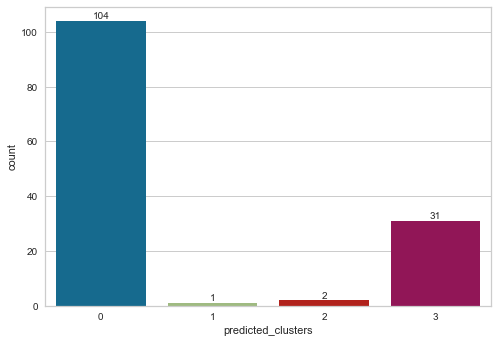

In [108]:
sns.countplot(x=X["predicted_clusters"], data=X)

for index, value in enumerate(X["predicted_clusters"].value_counts().sort_index()):
     plt.text(index, value, f"{value}", ha="center", va="bottom", fontsize = 10)

In [109]:
X[X["predicted_clusters"] == 2][["labels", "military_strength_power_index"]].sort_values(by="military_strength_power_index")

labels  military_strength_power_index
101  Russia                      -1.055642
26    China                      -1.054884

In [111]:
X[X["predicted_clusters"] == 1][["labels", "military_strength_power_index"]].sort_values(by="military_strength_power_index")

labels  military_strength_power_index
130  United States                      -1.061327

görüldüğü gibi dağılımın barplot sonrası yaptığımız değerlendirme doğrultusunda olduğunu, görüyorum. k 3 için aldığımda elde ettiğim dağılımdan daha iyi bir dağılım sonucu elde ettim. bundan dolayı 4 te karar kıldım.

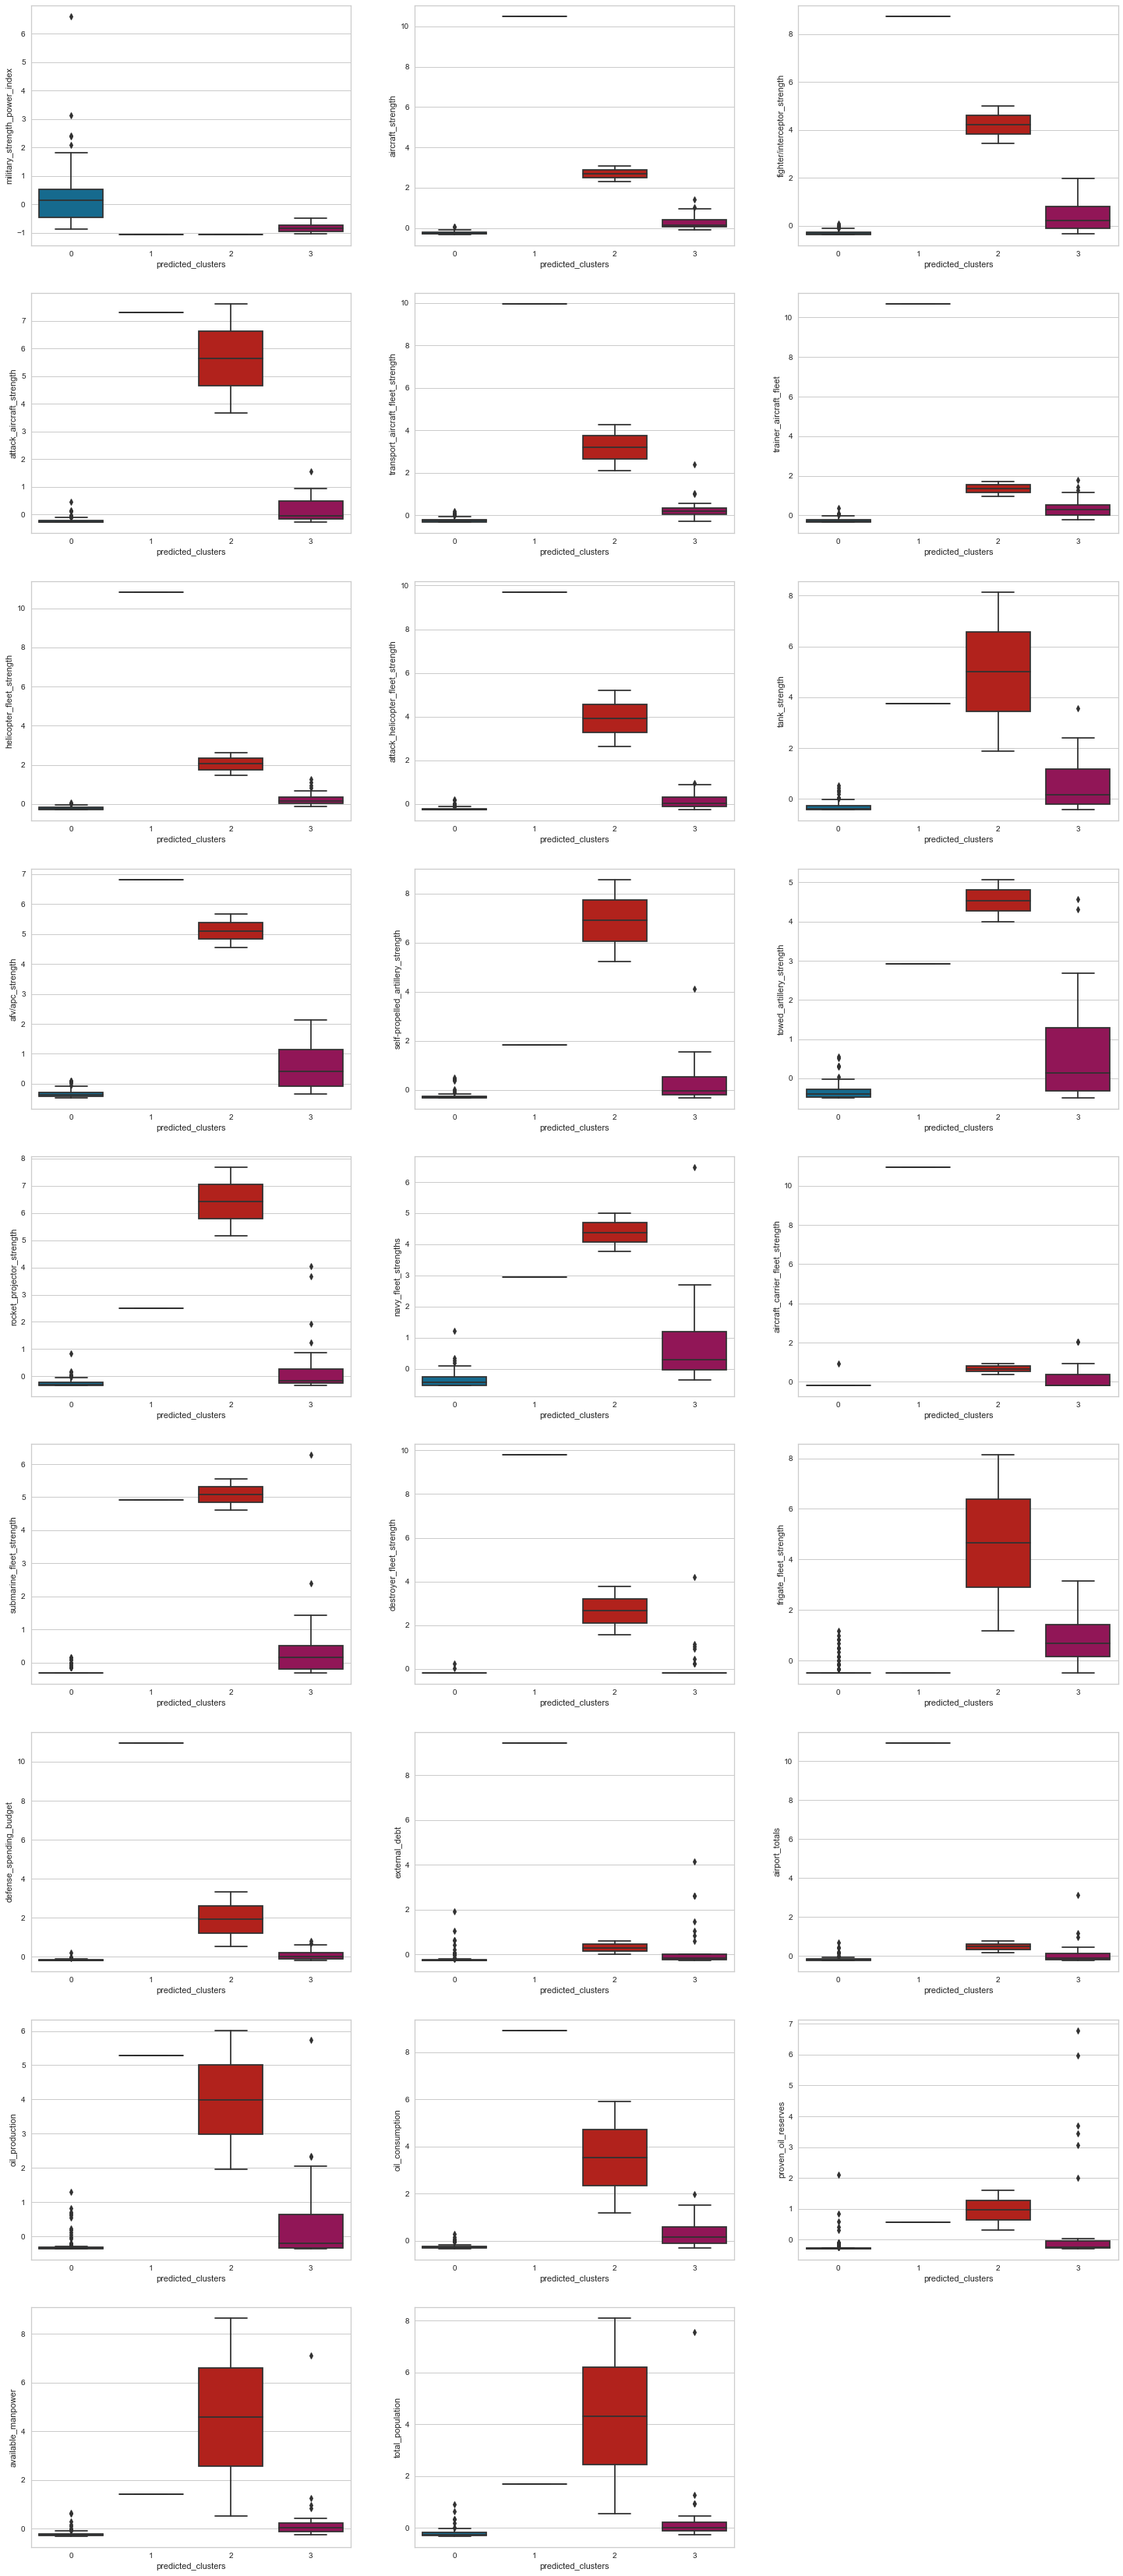

In [112]:
index = 0
plt.figure(figsize=(25, 60))

for feature in X.drop("labels", axis=1):
    if feature != "predicted_clusters":
        index += 1
        plt.subplot(9, 3, index)
        sns.boxplot(x="predicted_clusters", y=feature, data=X)

grafiği incelediğimde;

featurelara göre özellikle 1 ve 2 class iyi bir ayrım olduğunu ancak 0 ve 3 class arasında tam olmasada dataların yoğun olarak toplandığı noktalarda grift yapıların olduğunu görebiliyorum. 

Ama genel olarak bir iki feature dışında dataların yoğun olarak toplandığı noktalarda da clusterların ayrıştığını söyleyebilirim. bu featurelar çıkarılarak yeniden bir model oluşturulup daha iyi bir ayrışmanın olabileceğini değerlendiriyorum.

In [113]:
X

military_strength_power_index  aircraft_strength  fighter/interceptor_strength  attack_aircraft_strength  transport_aircraft_fleet_strength  trainer_aircraft_fleet  helicopter_fleet_strength  attack_helicopter_fleet_strength  tank_strength  afv/apc_strength  self-propelled_artillery_strength  towed_artillery_strength  rocket_projector_strength  navy_fleet_strengths  aircraft_carrier_fleet_strength  submarine_fleet_strength  destroyer_fleet_strength  frigate_fleet_strength  defense_spending_budget  external_debt  airport_totals  oil_production  oil_consumption  proven_oil_reserves  available_manpower  total_population  predicted_clusters                            labels
0                        -0.088171          -0.104660                     -0.355421                 -0.008078                          -0.002521               -0.345240                   0.063544                         -0.264231      -0.428199         -0.264092                          -0.309482                 -0.271503                  -0.221570             -0.529170                        -0.177362                 -0.317815                 -0.187480               -0.486280                -0.029726      -0.280709       -0.204411       -0.352511        -0.322322            -0.280406           -0.132033         -0.110873                   0                       Afghanistan
1                         0.646586          -0.300992                     -0.355421                 -0.273513                          -0.328624               -0.345240                  -0.260595                         -0.264231      -0.428199         -0.374463                          -0.309482                 -0.490720                  -0.325171             -0.258758                        -0.177362                 -0.317815                 -0.187480               -0.486280                -0.204922      -0.277088       -0.236680       -0.342879        -0.305200            -0.276455           -0.284127         -0.304683                   0                           Albania
2                        -0.754099           0.132405                      0.093402                 -0.039931                           0.312713                0.017366                   0.198603                          0.199817       0.154596          0.904357                           0.157309                 -0.191788                   0.329585              0.901167                        -0.177362                  0.158908                 -0.187480                0.342197                -0.014815      -0.278851       -0.110084        0.433720        -0.174470             0.006007           -0.055840         -0.070045                   3                           Algeria
3                        -0.472112          -0.076147                     -0.041681                 -0.082400                          -0.002521               -0.149349                  -0.054149                         -0.109548      -0.177200         -0.350719                          -0.268637                 -0.046058                  -0.086889             -0.123552                        -0.177362                 -0.317815                 -0.187480               -0.486280                -0.104277      -0.259389       -0.094363        0.650446        -0.286782            -0.086185           -0.228013         -0.138744                   0                            Angola
4                        -0.612954          -0.131544                     -0.250841                 -0.199191                          -0.230793               -0.078495                  -0.104314                         -0.264231      -0.183160         -0.324008                          -0.188408                 -0.276485                  -0.271298             -0.180481                        -0.177362                 -0.158908                  0.251033               -0.486280                -0.146026      -0.165493        0.701623       -0.063905        -0.007876            -0.

In [114]:
centers = model.cluster_centers_

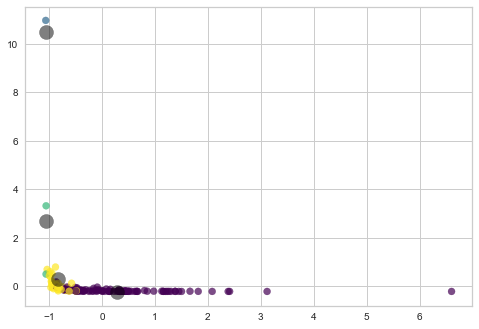

In [116]:
plt.scatter(X["military_strength_power_index"], X["defense_spending_budget"], c = X.predicted_clusters, cmap = "viridis", alpha=0.7)
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

etkili olduğunu değerlendirdiğim iki feature olan "military_strength_power_index" ve "defense_spending_budget" üzerinden scatter ile centroit değerlerine bakınca yukarıdaki gibi yerinden bir dağılım elde ettim.

### Evaluate 

## Hierarchical Clustering

### Dendogram

In [117]:
X

military_strength_power_index  aircraft_strength  fighter/interceptor_strength  attack_aircraft_strength  transport_aircraft_fleet_strength  trainer_aircraft_fleet  helicopter_fleet_strength  attack_helicopter_fleet_strength  tank_strength  afv/apc_strength  self-propelled_artillery_strength  towed_artillery_strength  rocket_projector_strength  navy_fleet_strengths  aircraft_carrier_fleet_strength  submarine_fleet_strength  destroyer_fleet_strength  frigate_fleet_strength  defense_spending_budget  external_debt  airport_totals  oil_production  oil_consumption  proven_oil_reserves  available_manpower  total_population  predicted_clusters                            labels
0                        -0.088171          -0.104660                     -0.355421                 -0.008078                          -0.002521               -0.345240                   0.063544                         -0.264231      -0.428199         -0.264092                          -0.309482                 -0.271503                  -0.221570             -0.529170                        -0.177362                 -0.317815                 -0.187480               -0.486280                -0.029726      -0.280709       -0.204411       -0.352511        -0.322322            -0.280406           -0.132033         -0.110873                   0                       Afghanistan
1                         0.646586          -0.300992                     -0.355421                 -0.273513                          -0.328624               -0.345240                  -0.260595                         -0.264231      -0.428199         -0.374463                          -0.309482                 -0.490720                  -0.325171             -0.258758                        -0.177362                 -0.317815                 -0.187480               -0.486280                -0.204922      -0.277088       -0.236680       -0.342879        -0.305200            -0.276455           -0.284127         -0.304683                   0                           Albania
2                        -0.754099           0.132405                      0.093402                 -0.039931                           0.312713                0.017366                   0.198603                          0.199817       0.154596          0.904357                           0.157309                 -0.191788                   0.329585              0.901167                        -0.177362                  0.158908                 -0.187480                0.342197                -0.014815      -0.278851       -0.110084        0.433720        -0.174470             0.006007           -0.055840         -0.070045                   3                           Algeria
3                        -0.472112          -0.076147                     -0.041681                 -0.082400                          -0.002521               -0.149349                  -0.054149                         -0.109548      -0.177200         -0.350719                          -0.268637                 -0.046058                  -0.086889             -0.123552                        -0.177362                 -0.317815                 -0.187480               -0.486280                -0.104277      -0.259389       -0.094363        0.650446        -0.286782            -0.086185           -0.228013         -0.138744                   0                            Angola
4                        -0.612954          -0.131544                     -0.250841                 -0.199191                          -0.230793               -0.078495                  -0.104314                         -0.264231      -0.183160         -0.324008                          -0.188408                 -0.276485                  -0.271298             -0.180481                        -0.177362                 -0.158908                  0.251033               -0.486280                -0.146026      -0.165493        0.701623       -0.063905        -0.007876            -0.

In [118]:
X.drop(["labels","predicted_clusters"], axis=1 , inplace=True)

In [119]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [120]:
hc_ward = linkage(y = X, method = "ward") 
hc_complete = linkage(X, "complete") 
hc_average = linkage(X, "average")
hc_single = linkage(X, "single")

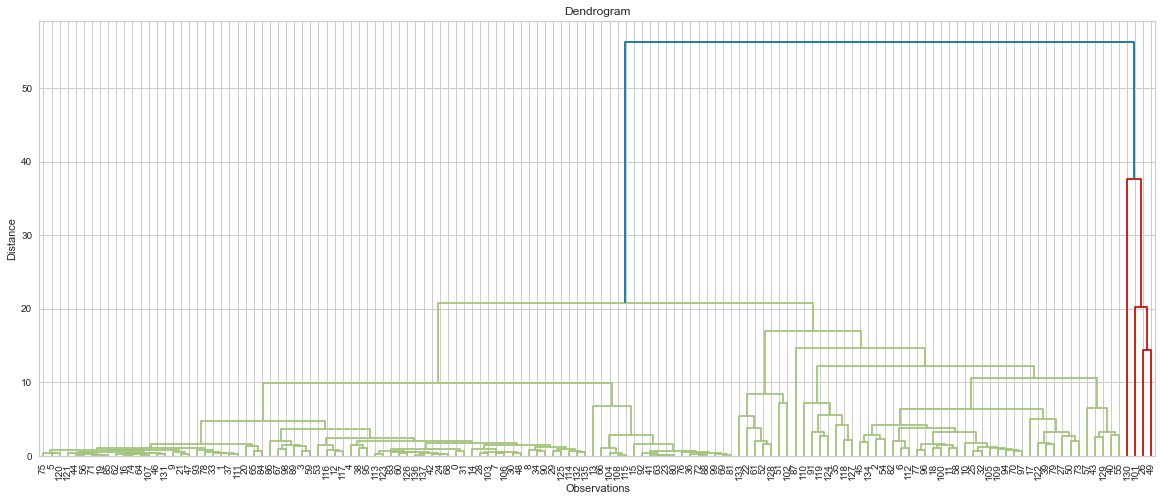

In [121]:
plt.figure(figsize = (20,8))
plt.title("Dendrogram")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_ward, leaf_font_size = 10);

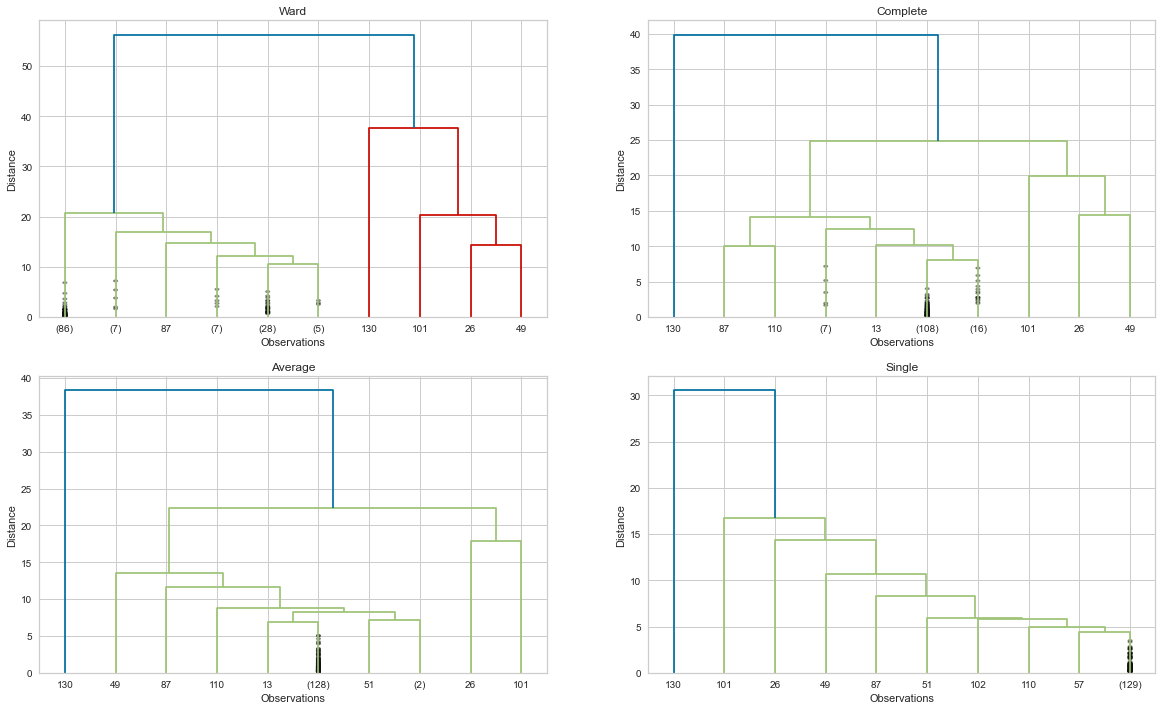

In [122]:
plt.figure(figsize = (20,12))

plt.subplot(221)
plt.title("Ward")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_ward, truncate_mode = "lastp", p = 10, show_contracted = True, leaf_font_size = 10)

plt.subplot(222)
plt.title("Complete")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_complete, truncate_mode = "lastp", p = 10, show_contracted = True, leaf_font_size = 10)

plt.subplot(223)
plt.title("Average")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_average, truncate_mode = "lastp", p = 10, show_contracted = True, leaf_font_size = 10)

plt.subplot(224)
plt.title("Single")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_single, truncate_mode = "lastp", p = 10, show_contracted = True, leaf_font_size = 10);

baktığımızda complete ve average  cluster sayısının 4, ward da ise 3 olduğunu görüyorum. burada çok homojen bir dağılım beklemiyorum. single da ise net bir değerlendirme yapamadım.
ilave olarak warda mesafenin 40, averageda 20, complete 25, single da 20 civarı olduğunu ve bu durumda en uzak mesafenin wardda olduğunu görüyorum.

### Model Building and label visualisation

In [123]:
from sklearn.cluster import AgglomerativeClustering

In [124]:
from sklearn.metrics import silhouette_score

In [125]:
K = range(2,11)

for k in K:
    model = AgglomerativeClustering(n_clusters = k)
    model.fit_predict(X)
    print(f'Silhouette Score for {k} clusters: {silhouette_score(X, model.labels_)}')

Silhouette Score for 2 clusters: 0.846673023083675
Silhouette Score for 3 clusters: 0.8192039889239482
Silhouette Score for 4 clusters: 0.3542955440561766
Silhouette Score for 5 clusters: 0.3541455776228204
Silhouette Score for 6 clusters: 0.3655497514322912
Silhouette Score for 7 clusters: 0.36340623987212933
Silhouette Score for 8 clusters: 0.36285256999762183
Silhouette Score for 9 clusters: 0.3462724680598943
Silhouette Score for 10 clusters: 0.32201665537742175


Burada dendongrom bana öncelikle 2 ve sonrasında 3 cluster olabileceğini söylüyor. Ancak önceki değerlendirmelerim ve kmeansden aldığım scorelar 4 olmasını gerektiğini ifade ediyor.

In [126]:
model1 = AgglomerativeClustering(n_clusters=3, affinity = "euclidean", linkage = "ward")
model1.fit_predict(X)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0,
       0, 0, 0, 0, 0, 0], dtype=int64)

In [127]:
model2 = AgglomerativeClustering(n_clusters=4, affinity = "euclidean", linkage = "ward")
model2.fit_predict(X)

array([3, 3, 1, 3, 3, 3, 1, 3, 3, 3, 1, 1, 3, 3, 3, 3, 3, 1, 1, 3, 3, 3,
       1, 3, 3, 1, 0, 1, 3, 3, 3, 3, 1, 3, 3, 1, 3, 3, 3, 1, 1, 3, 3, 1,
       3, 1, 3, 3, 3, 0, 1, 1, 1, 3, 1, 1, 3, 1, 1, 3, 3, 1, 3, 3, 3, 3,
       3, 3, 3, 3, 1, 3, 3, 1, 3, 3, 3, 1, 3, 1, 3, 3, 1, 3, 3, 3, 3, 1,
       3, 3, 3, 1, 3, 3, 1, 3, 1, 1, 3, 3, 1, 0, 1, 3, 3, 1, 3, 3, 3, 1,
       1, 3, 1, 3, 3, 3, 3, 3, 1, 1, 3, 3, 1, 3, 1, 3, 3, 1, 1, 1, 2, 3,
       3, 1, 1, 3, 3, 3], dtype=int64)

In [128]:
model1.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0,
       0, 0, 0, 0, 0, 0], dtype=int64)

In [129]:
model2.labels_

array([3, 3, 1, 3, 3, 3, 1, 3, 3, 3, 1, 1, 3, 3, 3, 3, 3, 1, 1, 3, 3, 3,
       1, 3, 3, 1, 0, 1, 3, 3, 3, 3, 1, 3, 3, 1, 3, 3, 3, 1, 1, 3, 3, 1,
       3, 1, 3, 3, 3, 0, 1, 1, 1, 3, 1, 1, 3, 1, 1, 3, 3, 1, 3, 3, 3, 3,
       3, 3, 3, 3, 1, 3, 3, 1, 3, 3, 3, 1, 3, 1, 3, 3, 1, 3, 3, 3, 3, 1,
       3, 3, 3, 1, 3, 3, 1, 3, 1, 1, 3, 3, 1, 0, 1, 3, 3, 1, 3, 3, 3, 1,
       1, 3, 1, 3, 3, 3, 3, 3, 1, 1, 3, 3, 1, 3, 1, 3, 3, 1, 1, 1, 2, 3,
       3, 1, 1, 3, 3, 3], dtype=int64)

In [130]:
clusters1 = model1.labels_

In [131]:
clusters2 = model2.labels_

In [132]:
X1 = X.copy()

In [133]:
X["predicted_clusters"] = clusters1

In [134]:
X1["predicted_clusters"] = clusters2

In [135]:
labels = df["country"]
labels

0                           Afghanistan
1                               Albania
2                               Algeria
3                                Angola
4                             Argentina
5                               Armenia
6                             Australia
7                               Austria
8                            Azerbaijan
9                               Bahrain
10                           Bangladesh
11                              Belarus
12                              Belgium
13                               Bhutan
14                              Bolivia
15               Bosnia and Herzegovina
16                             Botswana
17                               Brazil
18                             Bulgaria
19                         Burkina Faso
20                             Cambodia
21                             Cameroon
22                               Canada
23             Central African Republic
24                                 Chad


In [136]:
X["labels"] = labels

In [137]:
X1["labels"] = labels

In [138]:
ct = pd.crosstab(X["predicted_clusters"], X["labels"])
ct

labels              Afghanistan  Albania  Algeria  Angola  Argentina  Armenia  Australia  Austria  Azerbaijan  Bahrain  Bangladesh  Belarus  Belgium  Bhutan  Bolivia  Bosnia and Herzegovina  Botswana  Brazil  Bulgaria  Burkina Faso  Cambodia  Cameroon  Canada  Central African Republic  Chad  Chile  China  Colombia  Croatia  Cuba  Czechia  Democratic Republic of the Congo  Denmark  Dominican Republic  Ecuador  Egypt  El Salvador  Estonia  Ethiopia  Finland  France  Gabon  Georgia  Germany  Ghana  Greece  Guatemala  Honduras  Hungary  India  Indonesia  Iran  Iraq  Ireland  Israel  Italy  Ivory Coast  Japan  Jordan  Kazakhstan  Kenya  Kuwait  Kyrgyzstan  Laos  Latvia  Lebanon  Liberia  Libya  Lithuania  Madagascar  Malaysia  Mali  Mauritania  Mexico  Moldova  Mongolia  Montenegro  Morocco  Mozambique  Myanmar  Namibia  Nepal  Netherlands  New Zealand  Nicaragua  Niger  Nigeria  North Korea  North Macedonia  Norway  Oman  Pakistan  Panama  Paraguay  Peru  Philippines  Poland  Portugal  \
predicted_clusters                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    
0                             1        1        1       1          1        1          1        1           1        1           1        1        1       1        1                       1         1       1         1             1         1         1       1                         1     1      1      0         1        1     1        1                                 1        1                   1        1      1            1        1         1        1       1      1        1        1      1       1          1         1        1      0          1     1     1        1       1      1            1      1       1           1      1       1           1     1       1        1        1      1          1           1         1     1           1       1        1         1           1        1           1        1        1      1            1            1          1      1        1            1                1       1     1         1       1         1     1            1       1         1   
1                             0        0        0       0          0        0          0        0           0        0           0        0        0       0        0                       0         0       0         0             0         0         0       0                         0     0      0      1         0        0     0        0                                 0        0                   0        0      0            0        0         0        0       0      0        0        0      0       0          0         0        0      1          0     0     0        0       0      0            0      0       0           0      0       0           0     0       0        0        0      0          0           0         0     0           0       0        0         0           0        0           0        0        0      0            0            0          0      0        0            0                0       0     0         0       0         0     0            0       0         0   
2   

In [139]:
ct = pd.crosstab(X1["predicted_clusters"], X["labels"])
ct

labels              Afghanistan  Albania  Algeria  Angola  Argentina  Armenia  Australia  Austria  Azerbaijan  Bahrain  Bangladesh  Belarus  Belgium  Bhutan  Bolivia  Bosnia and Herzegovina  Botswana  Brazil  Bulgaria  Burkina Faso  Cambodia  Cameroon  Canada  Central African Republic  Chad  Chile  China  Colombia  Croatia  Cuba  Czechia  Democratic Republic of the Congo  Denmark  Dominican Republic  Ecuador  Egypt  El Salvador  Estonia  Ethiopia  Finland  France  Gabon  Georgia  Germany  Ghana  Greece  Guatemala  Honduras  Hungary  India  Indonesia  Iran  Iraq  Ireland  Israel  Italy  Ivory Coast  Japan  Jordan  Kazakhstan  Kenya  Kuwait  Kyrgyzstan  Laos  Latvia  Lebanon  Liberia  Libya  Lithuania  Madagascar  Malaysia  Mali  Mauritania  Mexico  Moldova  Mongolia  Montenegro  Morocco  Mozambique  Myanmar  Namibia  Nepal  Netherlands  New Zealand  Nicaragua  Niger  Nigeria  North Korea  North Macedonia  Norway  Oman  Pakistan  Panama  Paraguay  Peru  Philippines  Poland  Portugal  \
predicted_clusters                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    
0                             0        0        0       0          0        0          0        0           0        0           0        0        0       0        0                       0         0       0         0             0         0         0       0                         0     0      0      1         0        0     0        0                                 0        0                   0        0      0            0        0         0        0       0      0        0        0      0       0          0         0        0      1          0     0     0        0       0      0            0      0       0           0      0       0           0     0       0        0        0      0          0           0         0     0           0       0        0         0           0        0           0        0        0      0            0            0          0      0        0            0                0       0     0         0       0         0     0            0       0         0   
1                             0        0        1       0          0        0          1        0           0        0           1        1        0       0        0                       0         0       1         1             0         0         0       1                         0     0      1      0         1        0     0        0                                 0        1                   0        0      1            0        0         0        1       1      0        0        1      0       1          0         0        0      0          1     1     1        0       1      1            0      1       1           0      0       1           0     0       0        0        0      0          0           0         1     0           0       1        0         0           0        1           0        1        0      0            1            0          0      0        0            1                0       0     0         1       0         0     1            0       1         1   
2   

cluster 3 e göre 4 için yaptığım değerlendirmenin daha iyi tahminler yaptığını görüyorum. cluster 3 te USA bir sınıf, CHINA ve RUSSIA yı bir sınıf yaptıktan sonra diğer kalan ülkeleri bir sınıf olarak değerlendiriyor ve bunun gerçekci olmadığı değerlendirerek 4 olmasını gerektiğinden karar kılıyorum.

In [140]:
clus_pred = X.groupby("predicted_clusters").mean().T
clus_pred

predicted_clusters                        0         1          2
military_strength_power_index      0.031395 -1.048517  -1.061327
aircraft_strength                 -0.128923  2.262191  10.489144
fighter/interceptor_strength      -0.143139  3.483547   8.729991
attack_aircraft_strength          -0.150304  4.274269   7.317921
transport_aircraft_fleet_strength -0.139695  2.925165   9.943640
trainer_aircraft_fleet            -0.108293  1.280236  10.670489
helicopter_fleet_strength         -0.119605  1.731833  10.831533
attack_helicopter_fleet_strength  -0.130788  2.605989   9.707636
tank_strength                     -0.120813  4.150721   3.736804
afv/apc_strength                  -0.135710  3.788287   6.820244
self-propelled_artillery_strength -0.116854  4.610301   1.827546
towed_artillery_strength          -0.123524  4.543386   2.922092
rocket_projector_strength         -0.116191  4.354813   2.505197
navy_fleet_strengths              -0.098646  3.420269   2.957722
aircraft_carrier_fleet_strength   -0.094336  0.564333  10.948053
submarine_fleet_strength          -0.119774  3.707842   4.926133
destroyer_fleet_strength          -0.119576  2.078173   9.788704
frigate_fleet_strength            -0.078224  3.656105  -0.486280
defense_spending_budget           -0.115725  1.511009  10.974103
external_debt                     -0.074893  0.195722   9.448554
airport_totals                    -0.089065  0.331211  10.941042
oil_production                    -0.099565  2.688047   5.277535
oil_consumption                   -0.134398  3.026301   8.930373
proven_oil_reserves               -0.017342  0.582286   0.576956
available_manpower                -0.131889  5.418223   1.418403
total_population                  -0.133376  5.398070   1.678174

In [141]:
clus_pred1 = X1.groupby("predicted_clusters").mean().T
clus_pred1

predicted_clusters                        0         1          2         3
military_strength_power_index     -1.048517 -0.711592  -1.061327  0.446085
aircraft_strength                  2.262191  0.106319  10.489144 -0.260221
fighter/interceptor_strength       3.483547  0.147145   8.729991 -0.305158
attack_aircraft_strength           4.274269 -0.010290   7.317921 -0.228451
transport_aircraft_fleet_strength  2.925165  0.066550   9.943640 -0.254809
trainer_aircraft_fleet             1.280236  0.205008  10.670489 -0.283158
helicopter_fleet_strength          1.731833  0.091199  10.831533 -0.237263
attack_helicopter_fleet_strength   2.605989  0.039334   9.707636 -0.225740
tank_strength                      4.150721  0.256544   3.736804 -0.331431
afv/apc_strength                   3.788287  0.290596   6.820244 -0.373648
self-propelled_artillery_strength  4.610301  0.168615   1.827546 -0.276185
towed_artillery_strength           4.543386  0.285907   2.922092 -0.352044
rocket_projector_strength          4.354813  0.121693   2.505197 -0.248964
navy_fleet_strengths               3.420269  0.460710   2.957722 -0.410844
aircraft_carrier_fleet_strength    0.564333  0.054418  10.948053 -0.177362
submarine_fleet_strength           3.707842  0.203600   4.926133 -0.300261
destroyer_fleet_strength           2.078173 -0.007050   9.788704 -0.182381
frigate_fleet_strength             3.656105  0.583836  -0.486280 -0.447746
defense_spending_budget            1.511009  0.009826  10.974103 -0.185800
external_debt                      0.195722  0.182820   9.448554 -0.218734
airport_totals                     0.331211  0.030924  10.941042 -0.156035
oil_production                     2.688047  0.178275   5.277535 -0.254638
oil_consumption                    3.026301  0.126982   8.930373 -0.280284
proven_oil_reserves                0.582286  0.355193   0.576956 -0.225268
available_manpower                 5.418223  0.017705   1.418403 -0.215383
total_population                   5.398070  0.012680   1.678174 -0.214896

<AxesSubplot:>

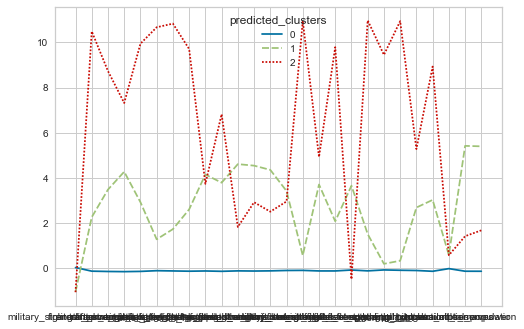

In [142]:
sns.lineplot(data = clus_pred)

<AxesSubplot:>

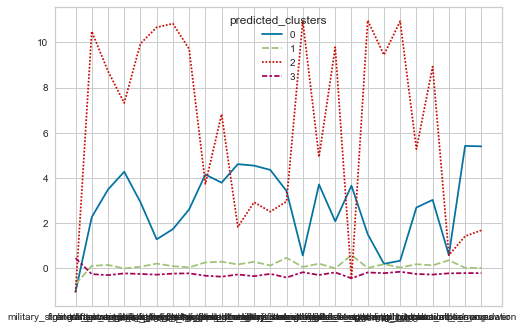

In [143]:
sns.lineplot(data = clus_pred1)

Bazı featurelarda göre iyi bir ayrım söz konusu iken bazılarında bir griftlik söz konusu diyebiliriz. Bu featureları düşürek daha iyi bir ayrım söz konusu olabilir. Ancak özetle dünya gerçekleri ile 4 üzerinden yapılan ayrımın daha doğru sonuçlar verdiğini söyleyebilirim. 

Yukarıdaki değerlendirmelerimde de ifade ettiğim gibi USA her türlü imkanları ile bir süper güç olarak diğer ülkelerden ayrılırken, sonrasında gelen Russia ve China ise bölgesel güç olarak USA yi takip etmekte ve onun kadar büyüklüğe sahip olmadıklarından ayrı bir sınıf olarak ayrılmaları daha doğru olabilir. Bundan sonra UK, Italy, France gibi ülkelerinde olduğu üçünçü bir grup ve son olarak da ekonomik ve askeri yönden zayıf ülkeler olan Mali,Gabon, Sri Lanka gibi ülkelerin ise bir grup olarak gruplandırılmasının uygun bir değerlendirme olabileceğini düşünüyorum.

### Evaluate 